In [ ]:
# Model for Credit card Fraud detection 

In [1]:
#import libraries for accessing google drive in google colab

from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [3]:
!pwd
# to know the present working directory


/content


In [4]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 101 kB 5.1 MB/s 


In [6]:
#To read csv File from locally stored file
df_credit = pd.read_csv('/content/gdrive/MyDrive/CC_Fraud_ML/creditcard.csv')
df_credit.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [8]:
# Examining the dataset imported:
df_credit.shape

(284807, 31)

In [9]:
df_credit.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [10]:
#Examining the data frame for the shape, datatypes, NUlls etc
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#Check the fraud/Non_Fraud related records
df_credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
#find % values of class
(df_credit.groupby('Class')['Class'].count()/df_credit['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [14]:
#observe the different feature type present in the data
#lets check data types of the features
df_credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df_credit.corr()
cor

Time            V1            V2  ...           V28    Amount     Class
Time    1.000000  1.173963e-01 -1.059333e-02  ... -9.412688e-03 -0.010596 -0.012323
V1      0.117396  1.000000e+00  4.697350e-17  ...  9.820892e-16 -0.227709 -0.101347
V2     -0.010593  4.697350e-17  1.000000e+00  ... -3.676415e-16 -0.531409  0.091289
V3     -0.419618 -1.424390e-15  2.512175e-16  ...  7.726948e-16 -0.210880 -0.192961
V4     -0.105260  1.755316e-17 -1.126388e-16  ... -5.863664e-17  0.098732  0.133447
V5      0.173072  6.391162e-17 -2.039868e-16  ... -3.299167e-16 -0.386356 -0.094974
V6     -0.063016  2.398071e-16  5.024680e-16  ...  4.813155e-16  0.215981 -0.043643
V7      0.084714  1.991550e-15  3.966486e-16  ... -6.836764e-17  0.397311 -0.187257
V8     -0.036949 -9.490675e-17 -4.413984e-17  ... -4.484325e-16 -0.103079  0.019875
V9     -0.008660  2.169581e-16 -5.728718e-17  ...  9.146779e-16 -0.044246 -0.097733
V10     0.030617  7.433820e-17 -4.782388e-16  ... -1.515934e-16 -0.101502 -0.216883
V11    -0.247689  2.438580e-16  9.468995e-16  ... -3.091914e-16  0.000104  0.154876
V12     0.124348  2.422086e-16 -6.588252e-16  ...  7.327446e-16 -0.009542 -0.260593
V13    -0.065902 -2.115458e-16  3.854521e-16  ...  1.049541e-15  0.005293 -0.004570
V14    -0.098757  9.352582e-16 -2.541036e-16  ...  2.503271e-15  0.033751 -0.302544
V15    -0.183453 -3.252451e-16  2.831060e-16  ... -1.063286e-15 -0.002986 -0.004223
V16     0.011903  6.308789e-16  4.934097e-17  ...  8.637186e-16 -0.003910 -0.196539
V17    -0.073297 -5.011524e-16 -9.883008e-16  ... -2.182692e-16  0.007309 -0.326481
V18     0.090438  2.870125e-16  2.636654e-16  ...  8.844995e-16  0.035650 -0.111485
V19     0.028975  1.818128e-16  9.528280e-17  ... -1.375843e-15 -0.056151  0.034783
V20    -0.050866  1.036959e-16 -9.309954e-16  ... -1.133579e-16  0.339403  0.020090
V21     0.044736 -1.755072e-16  8.444409e-17  ...  5.132234e-16  0.105999  0.040413
V22     0.144059  7.477367e-17  2.500830e-16  ... -3.021376e-16 -0.064801  0.000805
V23     0.051142  9.808705e-16  1.059562e-16  ...  9.029821e-16 -0.112633 -0.002685
V24    -0.016182  7.354269e-17 -8.142354e-18  ... -2.259275e-16  0.005146 -0.007221
V25    -0.233083 -9.805358e-16 -4.261894e-17  ...  3.399375e-16 -0.047837  0.003308
V26    -0.041407 -8.621897e-17  2.601622e-16  ... -3.751403e-16 -0.003208  0.004455
V27    -0.005135  3.208233e-17 -4.478472e-16  ... -3.770124e-16  0.028825  0.017580
V28    -0.009413  9.820892e-16 -3.676415e-16  ...  1.000000e+00  0.010258  0.009536
Amount -0.010596 -2.277087e-01 -5.314089e-01  ...  1.025822e-02  1.000000  0.005632
Class  -0.012323 -1.013473e-01  9.128865e-02  ...  9.536041e-03  0.005632  1.000000

[31 rows x 31 columns]

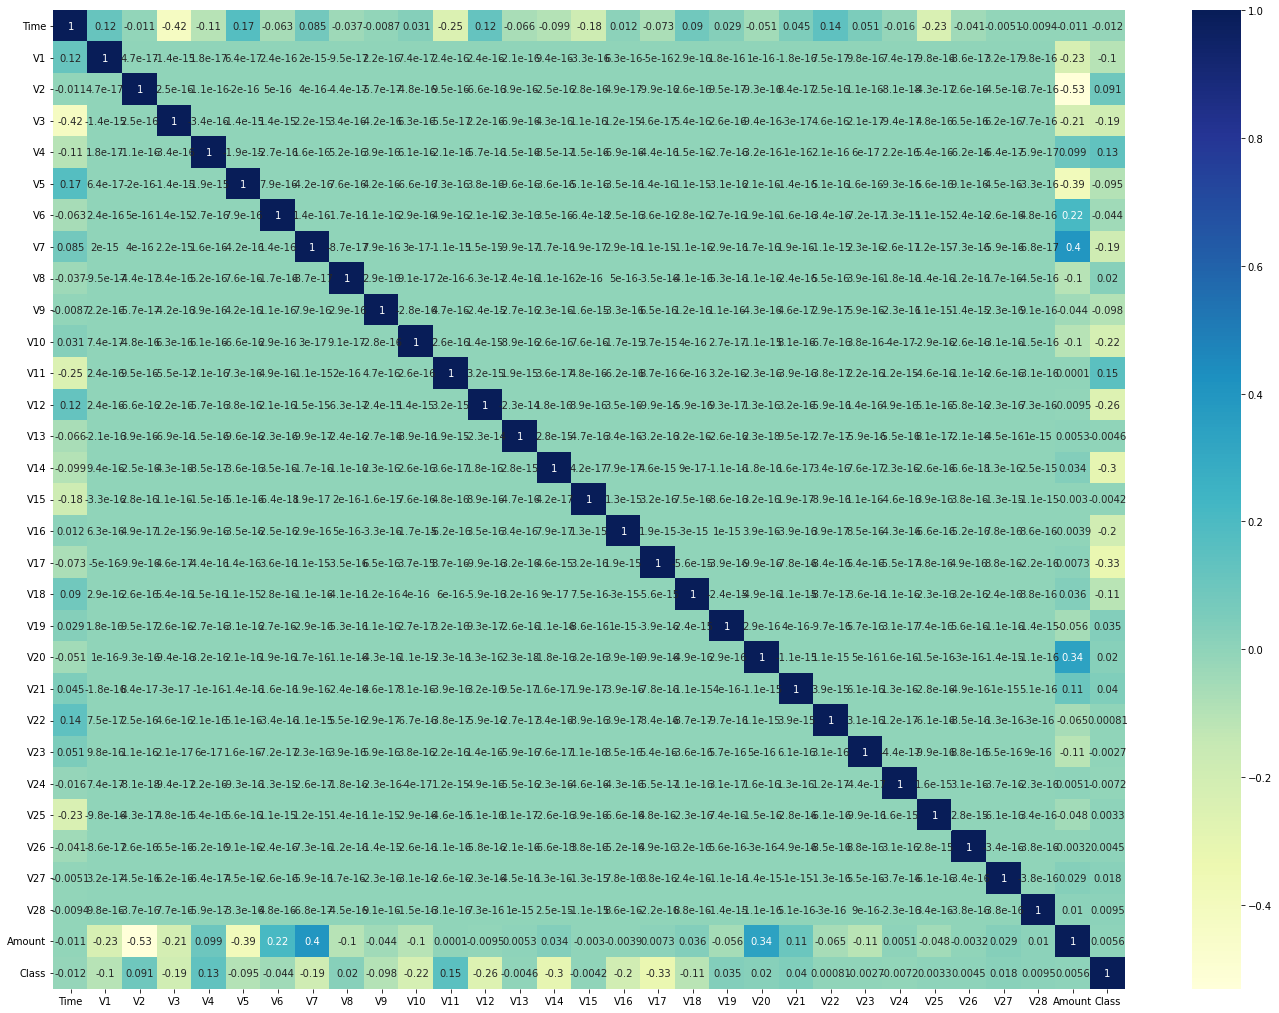

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [17]:
#Here we will observe the distribution of our classes

classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100

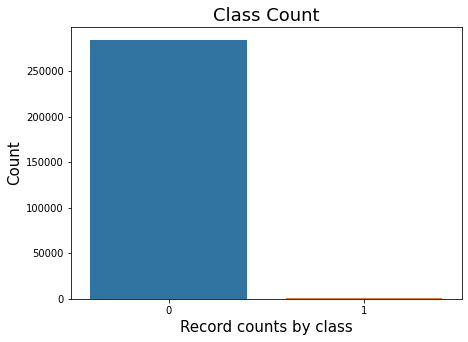

In [18]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

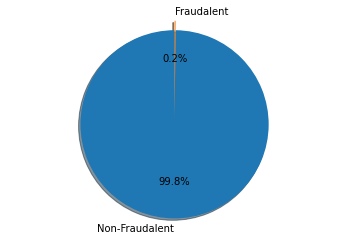

In [19]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
print('The percentage without churn prediction is ', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df_credit['Class'].value_counts()[1]/df_credit['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [21]:
# Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc


# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df_credit['Time'], unit='s')
#Create derived columns Mins and hours
df_credit['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df_credit['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df_credit['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)



Text(0.5, 1.05, 'Time vs Class Distribution')

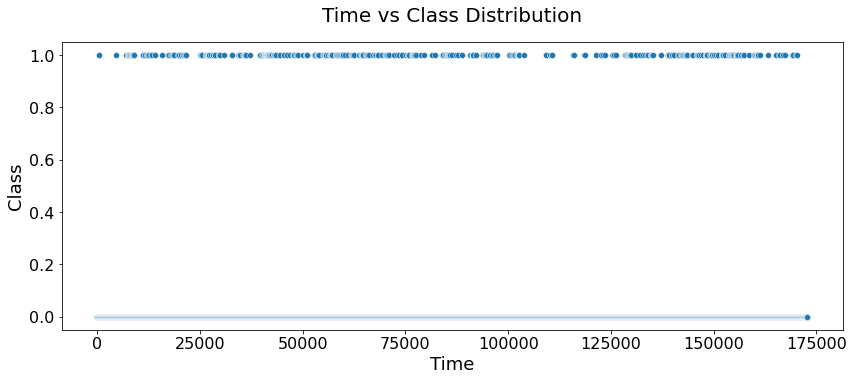

In [22]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['Time'], y='Class', palette=cmap, data=df_credit)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

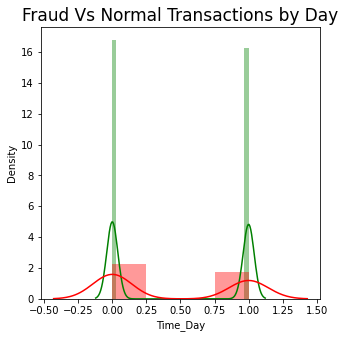

In [23]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

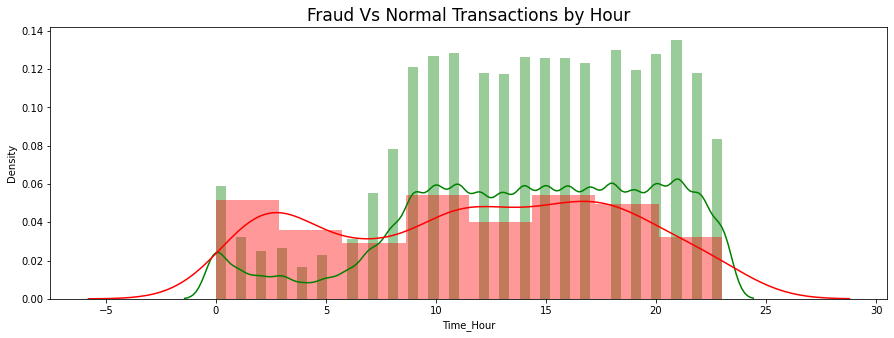

In [24]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

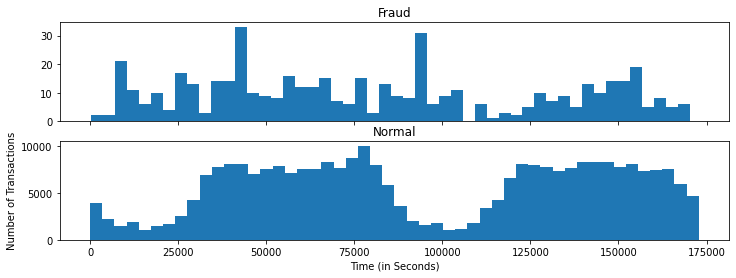

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df_credit.Time[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Time[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [26]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df_credit[df_credit['Class'] == 1]
df_Regular = df_credit[df_credit['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [27]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

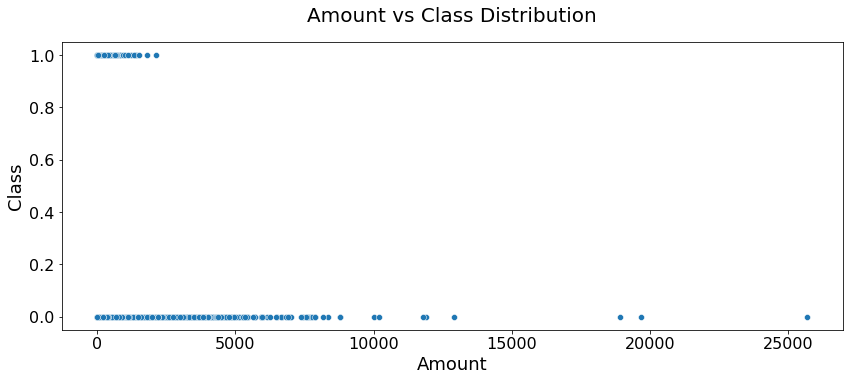

In [29]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['Amount'], y='Class', palette=cmap, data=df_credit)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


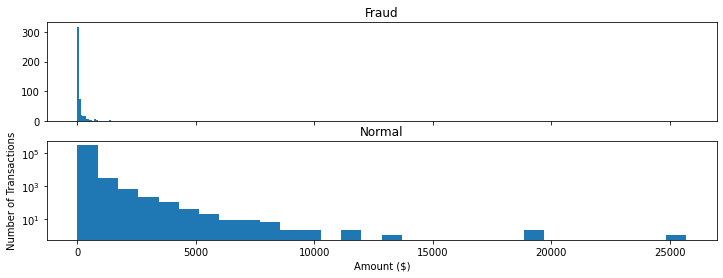

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df_credit.Amount[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Amount[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [31]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df_credit.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

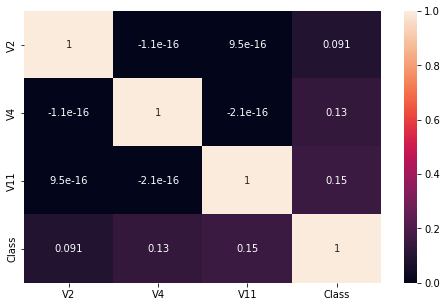

In [32]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_credit[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

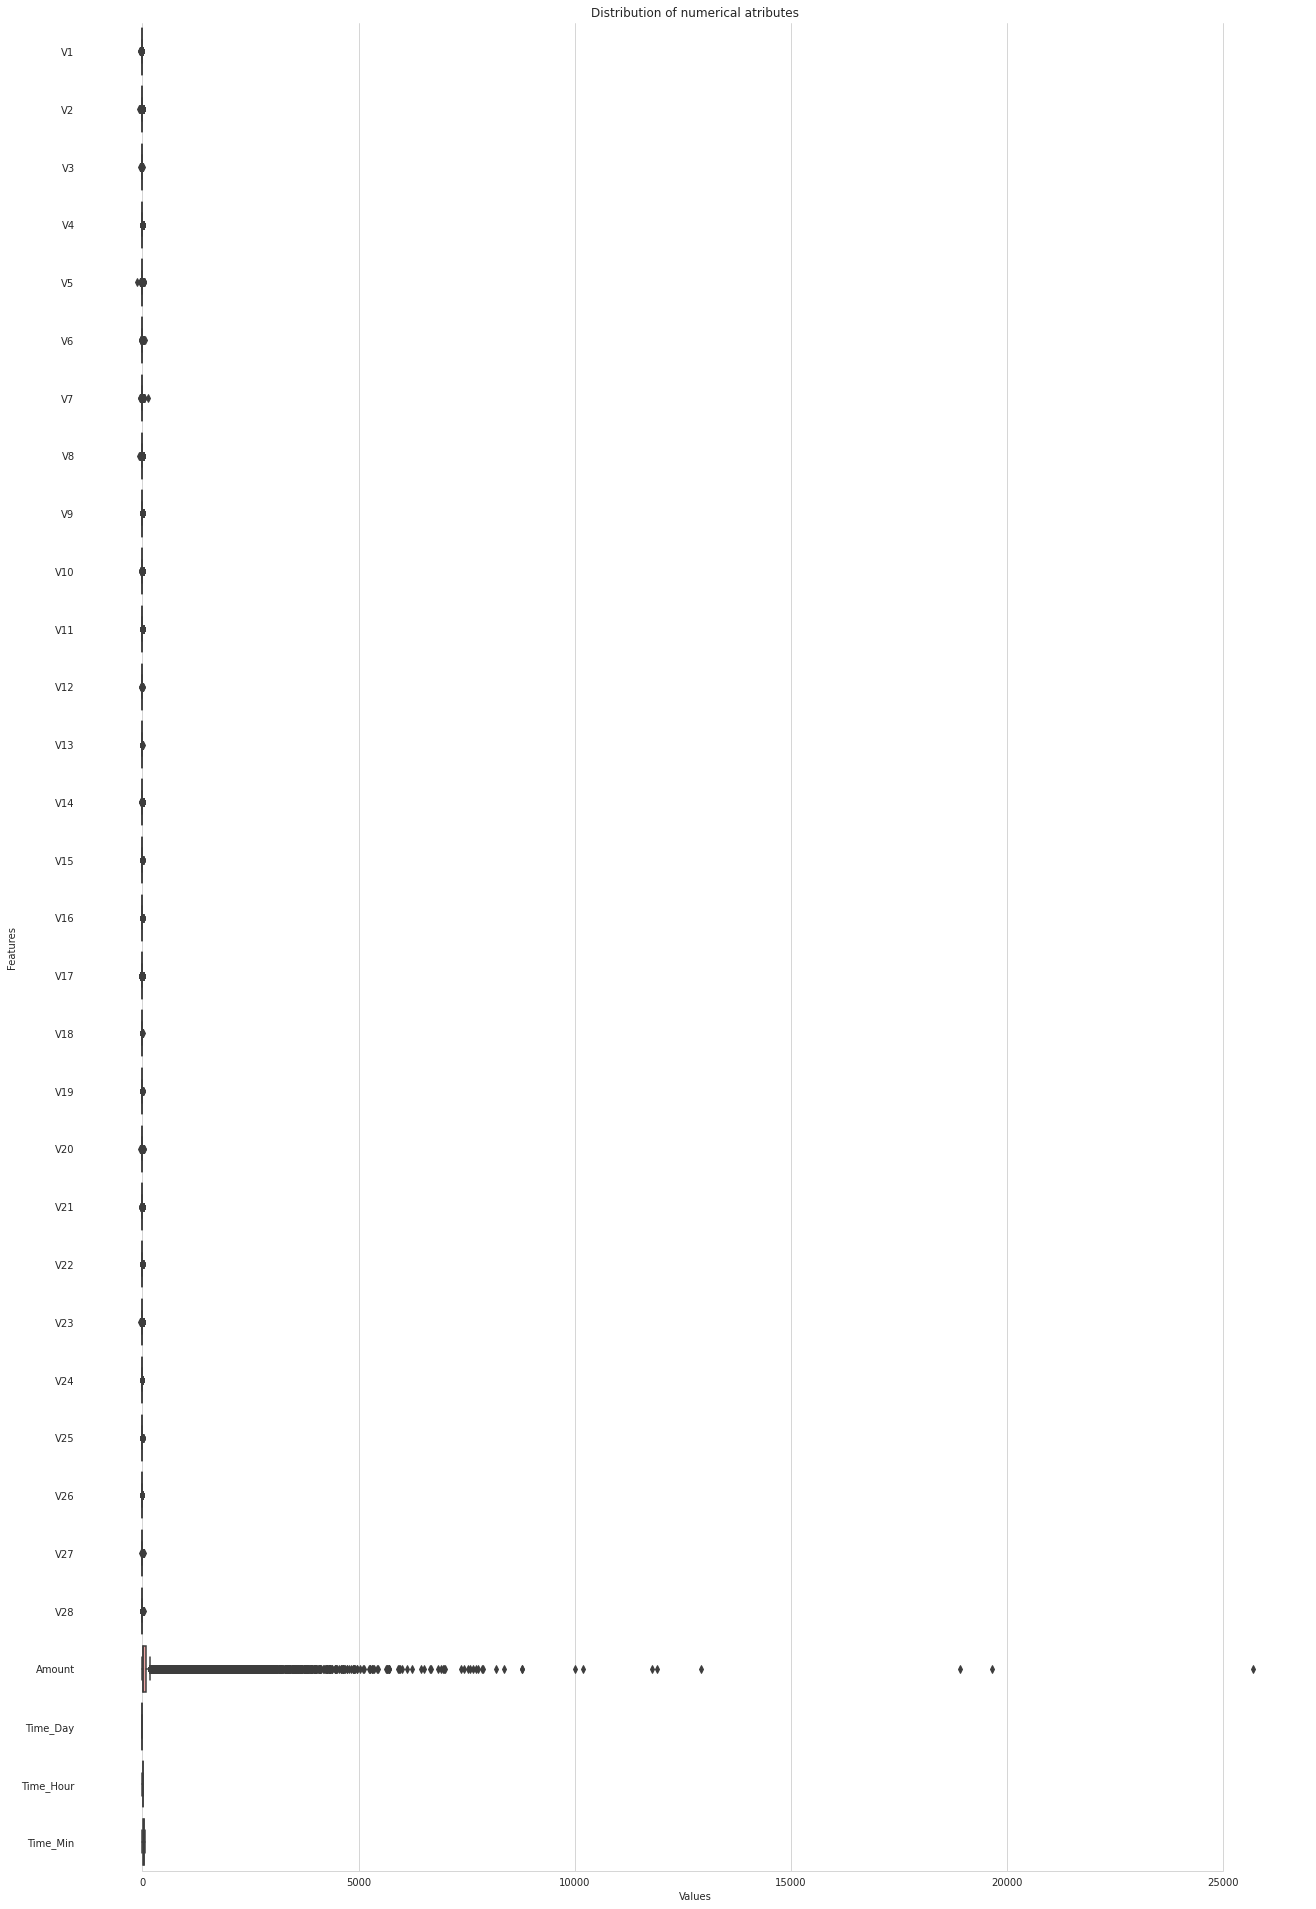

In [33]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df_credit.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
ax = sns.boxplot(data=df_credit[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [34]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df_credit.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df_credit.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

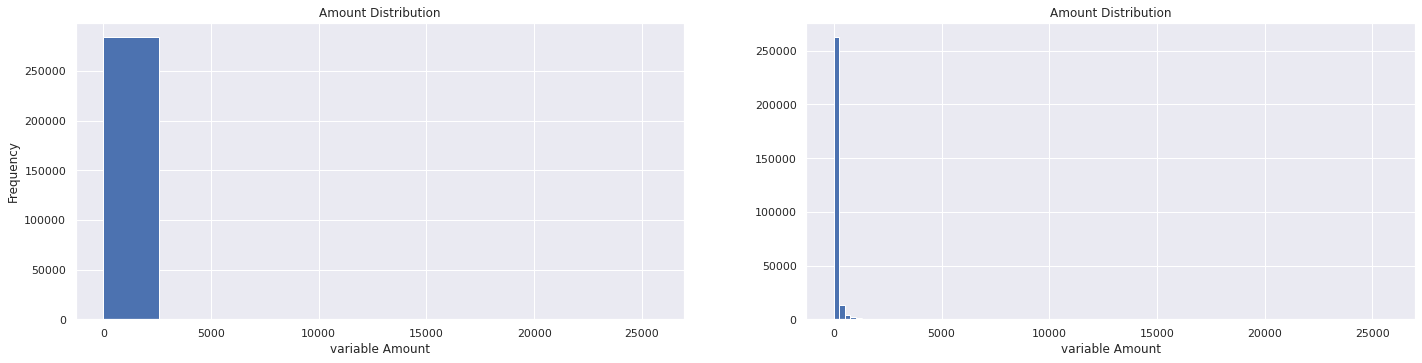

In [37]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_credit['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df_credit['Amount'],bins=100)
plt.show()

In [38]:
#Create X and y dataset for independent and dependent data
y= df_credit['Class']
X = df_credit.drop(['Class'], axis=1)

In [39]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [40]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [41]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

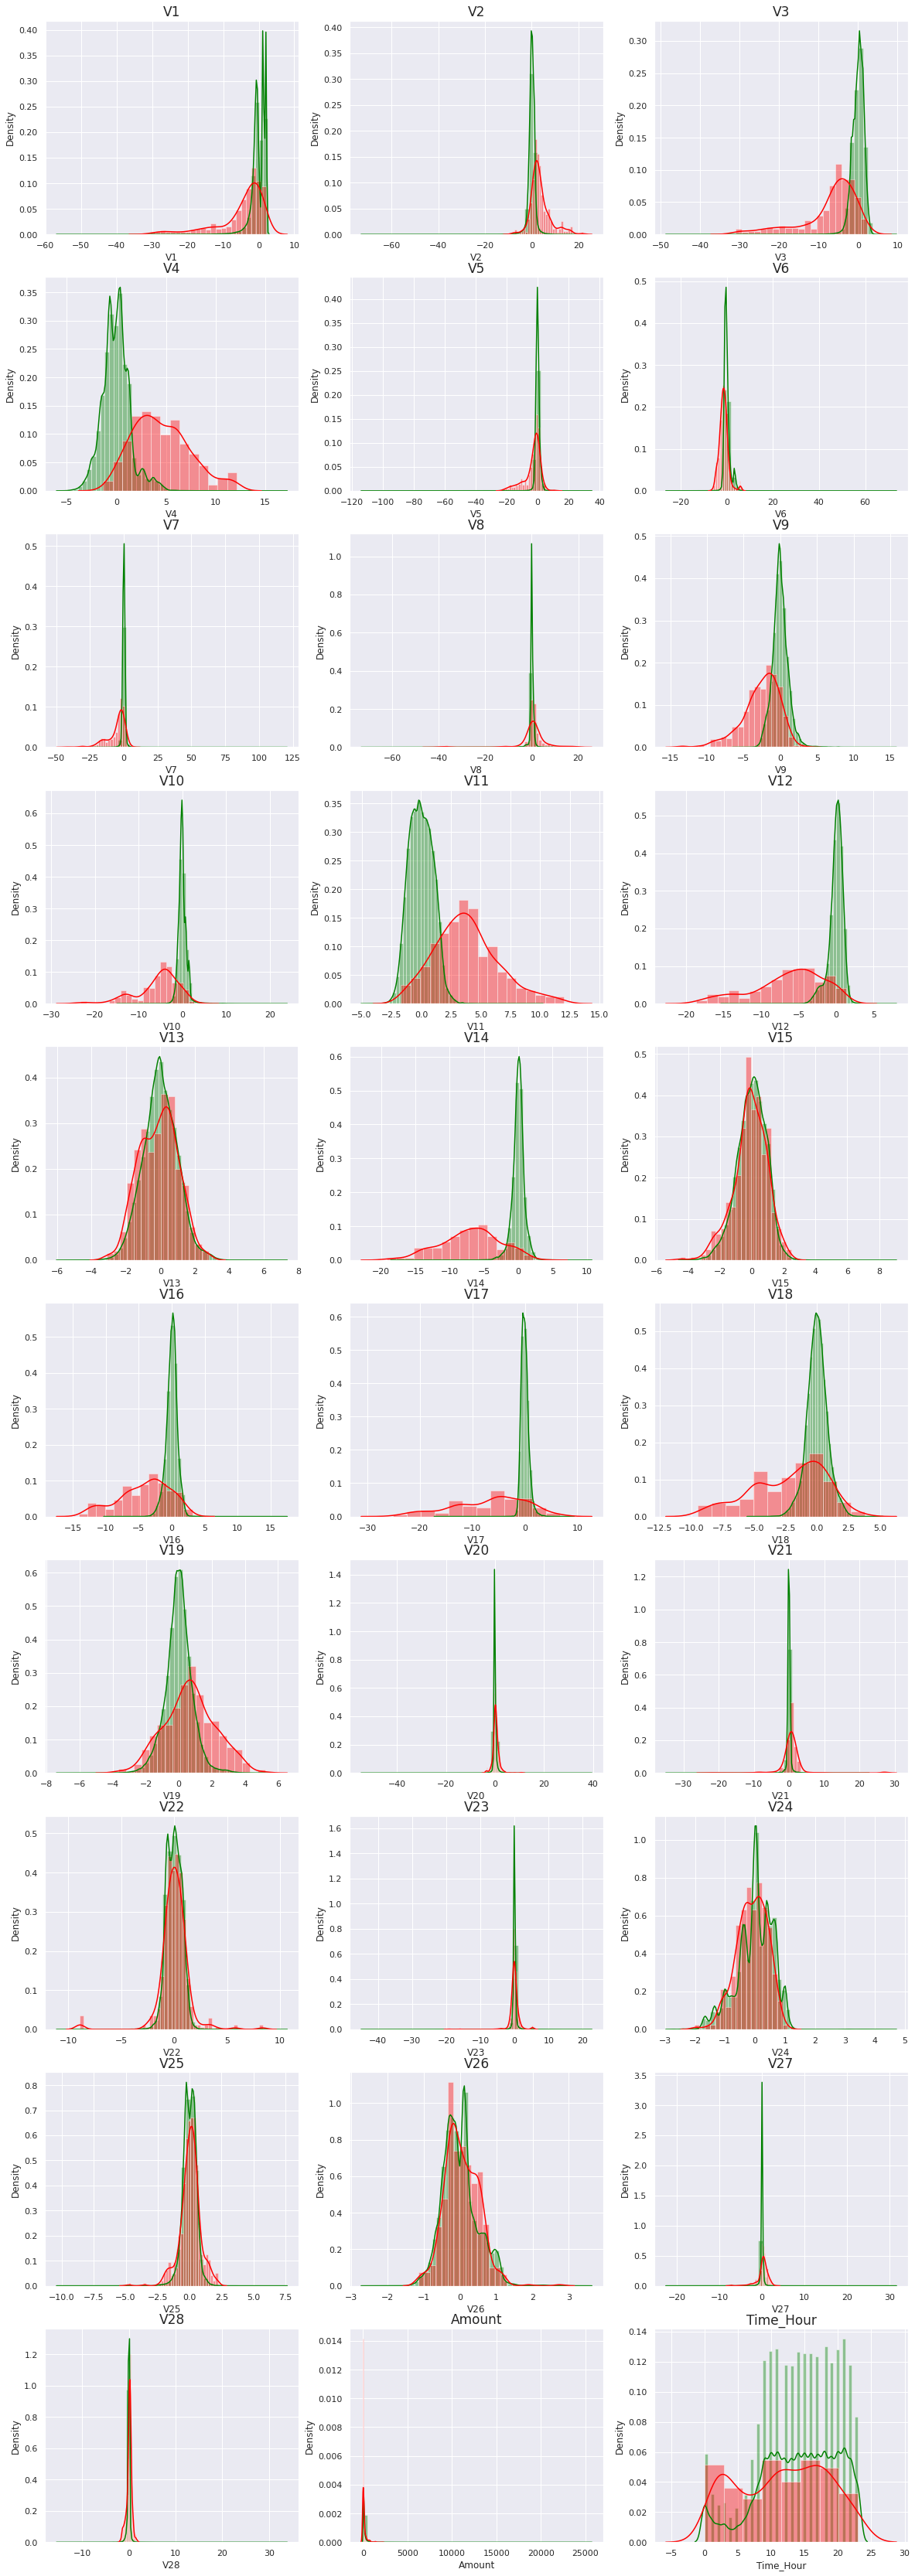

In [42]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df_credit.Class == 0
fraud_records = df_credit.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()



In [43]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [44]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [45]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [46]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results



In [47]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [48]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
      

In [49]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [50]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
  

In [51]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [52]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

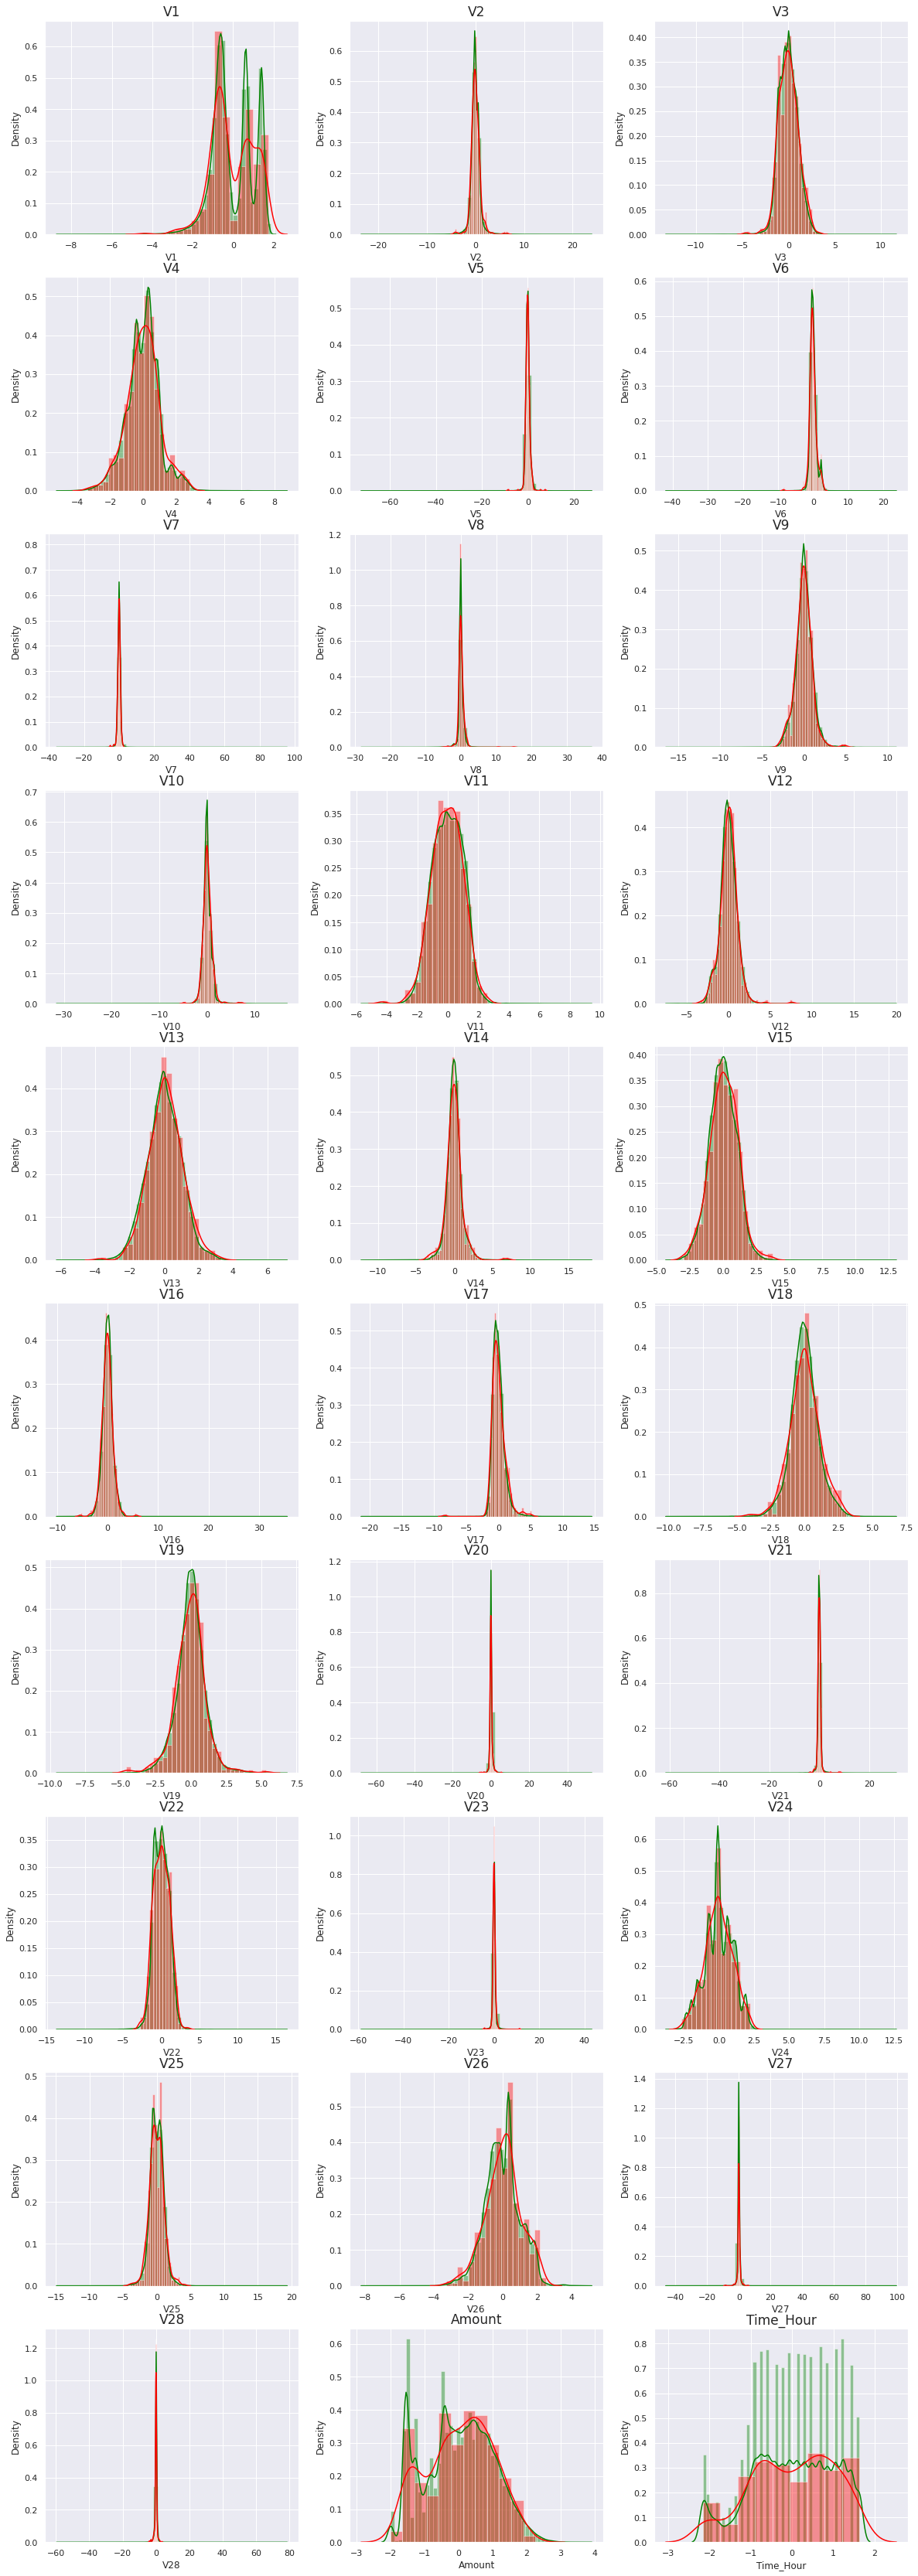

In [53]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

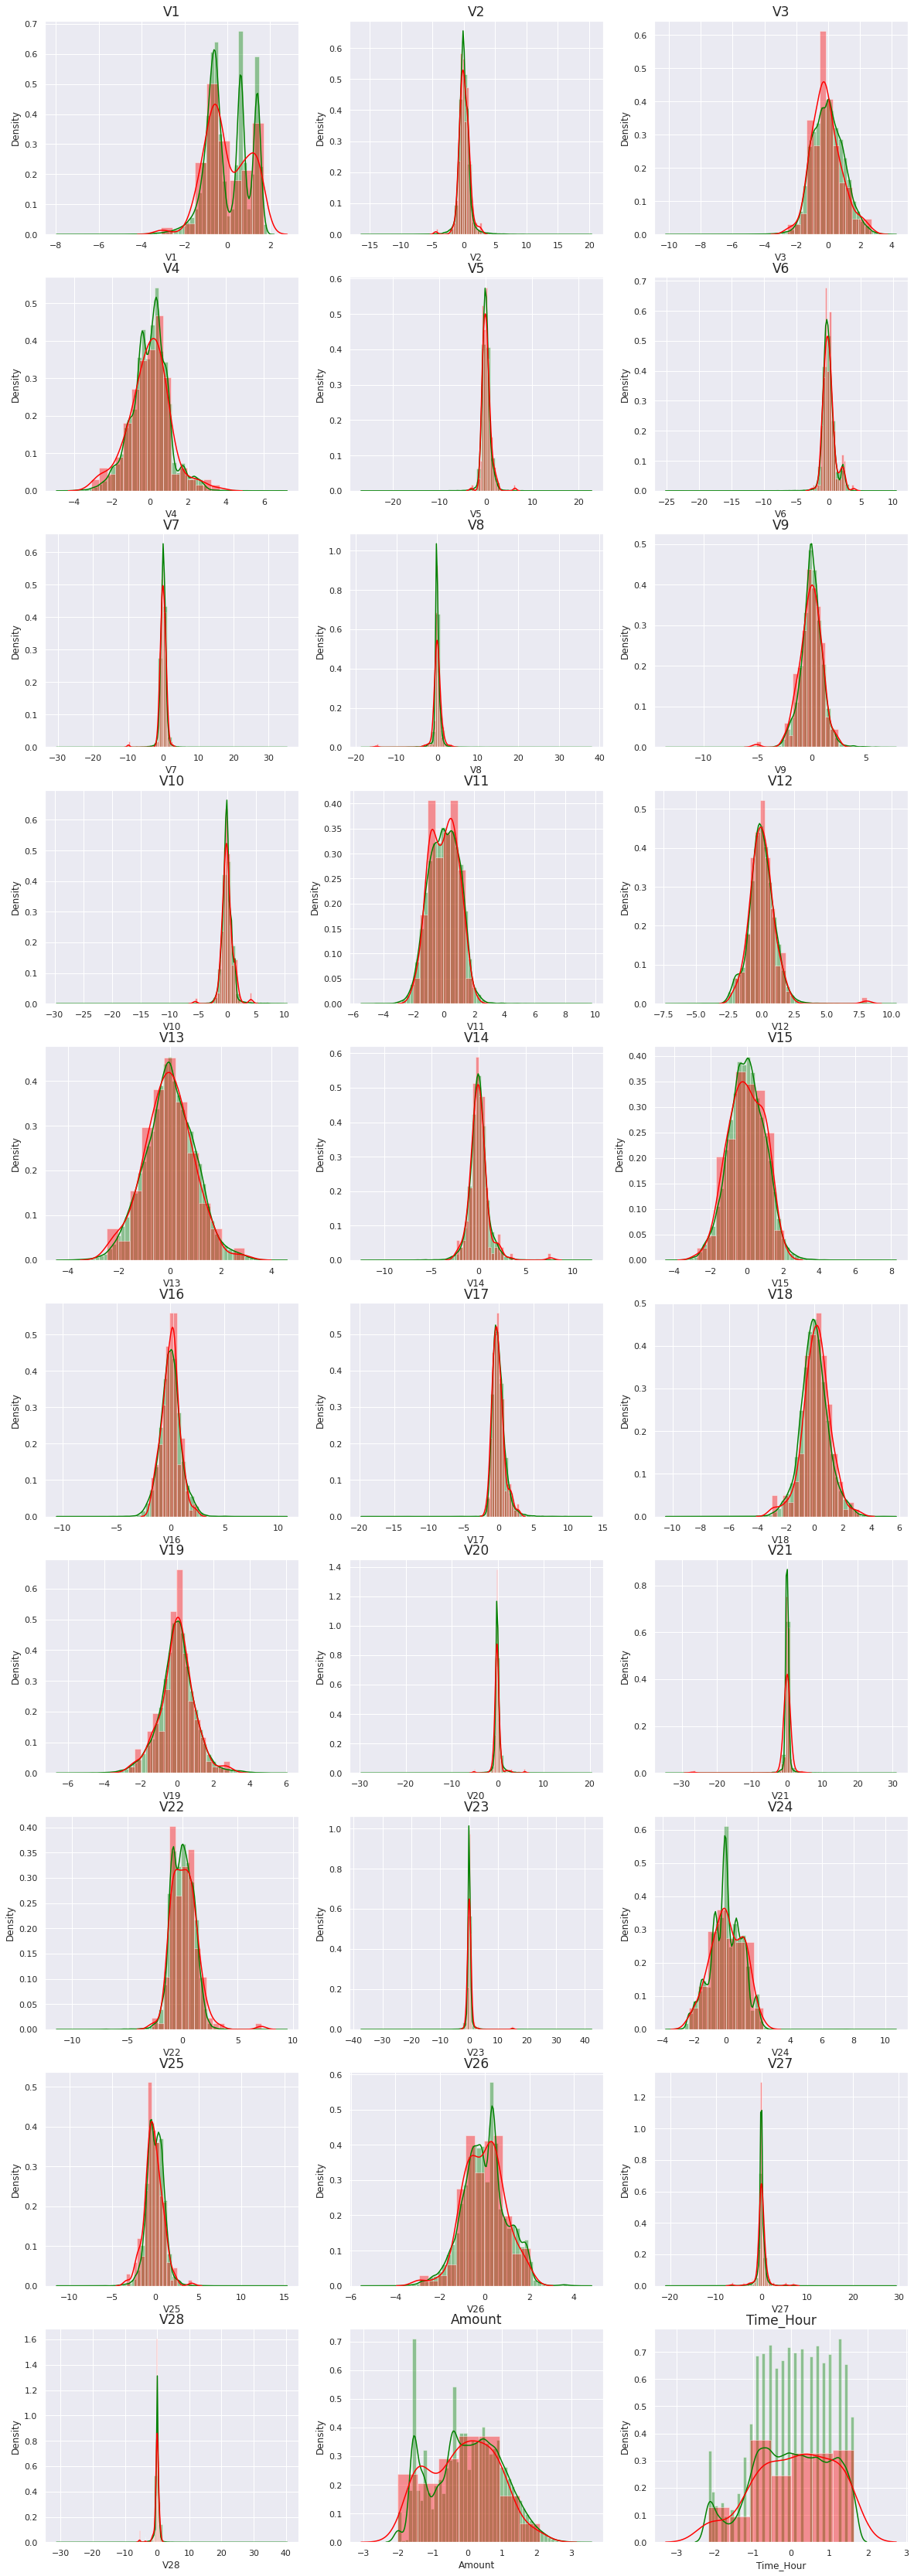

In [54]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.9854770239257755
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699968 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.978562

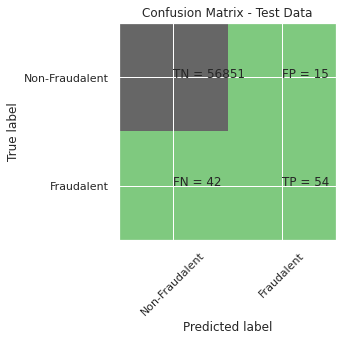

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9989466661985184
Confusion Matrix


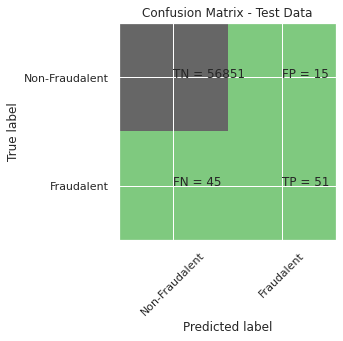

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.53      0.63        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.81     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785844336885
ROC for the test dataset 96.7%


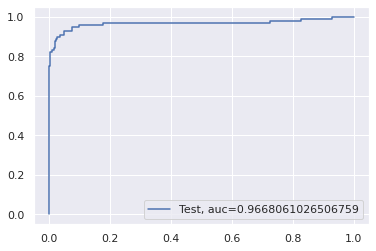

l1 roc_value: 0.9702463906376395
l1 threshold: 0.002675928800502849
ROC for the test dataset 97.0%


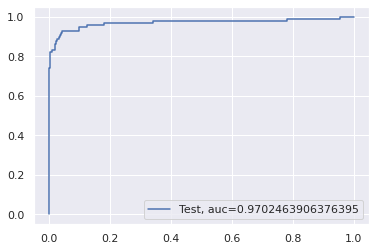

Time Taken by Model: --- 158.44139075279236 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


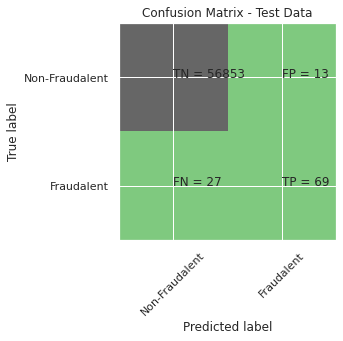

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


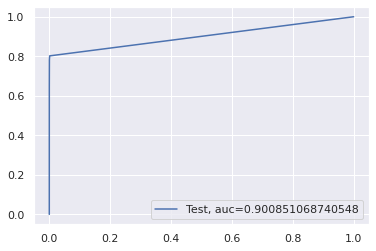

Time Taken by Model: --- 1467.845695257187 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


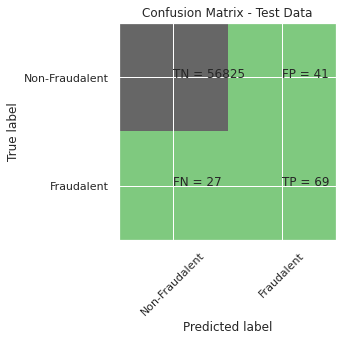

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


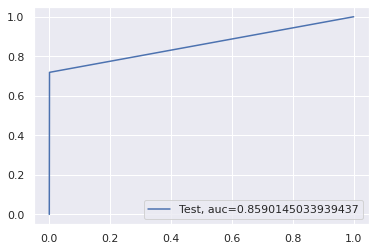

entropy score: 0.9990519995786665
Confusion Matrix


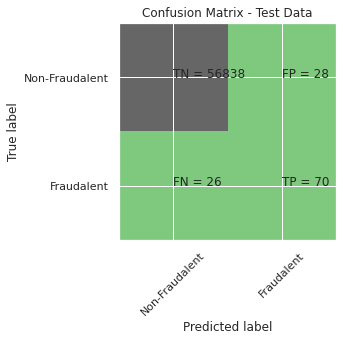

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


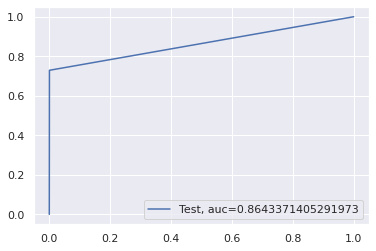

Time Taken by Model: --- 38.406612396240234 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


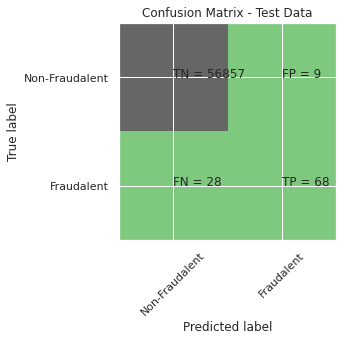

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


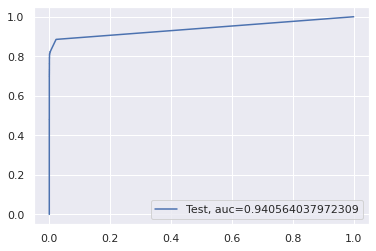

Time Taken by Model: --- 252.4334466457367 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993153330290369
Confusion Matrix


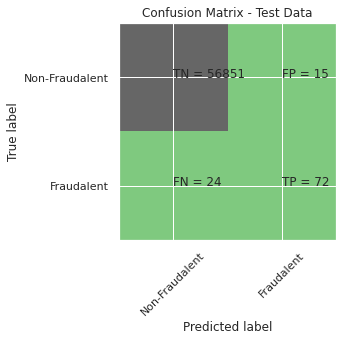

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.83      0.75      0.79        96

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9750367091056167
XGBoost threshold: 0.0007558927754871547
ROC for the test dataset 97.5%


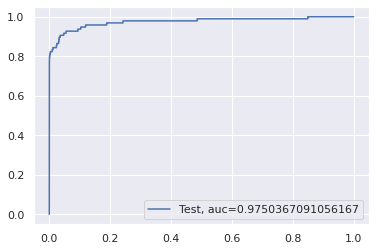

Time Taken by Model: --- 55.0765335559845 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


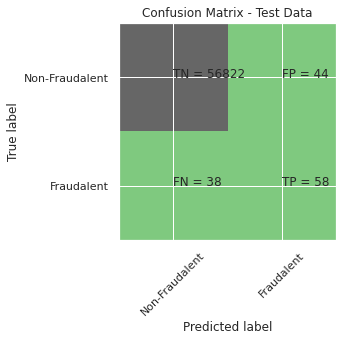

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913403146578507
SVM threshold: 0.0014118753636623265
ROC for the test dataset 89.1%


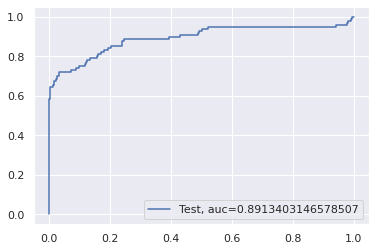

Time Taken by Model: --- 99.48272490501404 seconds ---


In [55]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [56]:
df_Results.head()

Data_Imbalance_Handiling  ... threshold
0        Power Transformer  ...  0.001289
1        Power Transformer  ...  0.002676
2        Power Transformer  ...  0.200000
3        Power Transformer  ...  1.000000
4        Power Transformer  ...  1.000000

[5 rows x 5 columns]

In [58]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4      9 ... 284776 284786 284803]
TRAIN: [     2      3      4 ... 284804 284805 284806] TEST: [     0      1      6 ... 284793 284798 284801]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5     16 ... 284788 284792 284799]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     7      8     11 ... 284796 284800 284804]
TRAIN: [     0      1      2 ... 284801 284803 284804] TEST: [    13     15     24 ... 284802 284805 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5     13     25 ... 284788 284796 284800]
TRAIN: [     0      2      3 ... 284801 284804 284806] TEST: [     1      6      8 ... 284802 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    19     24     29 ... 284798 284799 284801]
TRAIN: [     0      1      3 ... 284802 284803 284805] TEST: [     2      7     11 ... 284797 284804 284806]
TRAIN: [     1     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9800239874551557
Max auc_roc for l1: 0.9517595346499214
Parameters for l2 regularisations
[[ 6.08260909e-03  4.01017402e-02 -9.28576366e-02  2.41647361e-01
   8.77987121e-02 -4.80371221e-02 -2.43621733e-02 -1.15939807e-01
  -8.72744428e-02 -1.67463263e-01  1.36059610e-01 -1.90495409e-01
  -5.23460989e-02 -3.72071589e-01 -4.74500015e-03 -9.87929795e-02
  -8.84190096e-02 -5.81478680e-03  1.07875129e-02 -2.61112347e-02
   3.16449610e-02  3.38244425e-02 -1.37916774e-02 -1.16956428e-02
  -1.28450047e-02  1.37669055e-03 -3.18841568e-03 -5.19737898e-03
   3.38323411e-04  4.37577972e-04]]
[-7.38195641]
{1: array([[0.6476929 , 0.64942625, 0.66699165, 0.78689053, 0.93379094,
        0.96870081, 0.97762036, 0.98056496, 0.98032205, 0.98174324,
        0.98174324, 0.98174324, 0.98174324, 0.98174324, 0.98174324,
        0.98174324, 0.98174324, 0.98174324, 0.98174324, 0.98174324],
       [0.56079028, 0.56225104, 0.57331721, 0.673

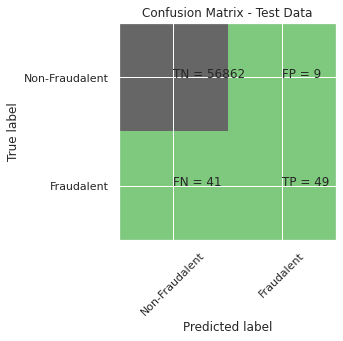

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.84      0.54      0.66        90

    accuracy                           1.00     56961
   macro avg       0.92      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991046505503766
Confusion Matrix


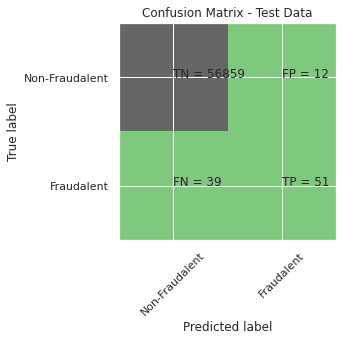

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.81      0.57      0.67        90

    accuracy                           1.00     56961
   macro avg       0.90      0.78      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9898989721377229
l2 threshold: 0.002034255198333378
ROC for the test dataset 99.0%


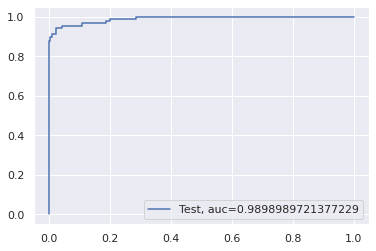

l1 roc_value: 0.9528468913076183
l1 threshold: 0.021678987250086972
ROC for the test dataset 95.3%


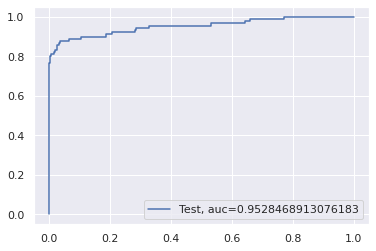

Time Taken by Model: --- 374.33915853500366 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.999350432752234
Confusion Matrix


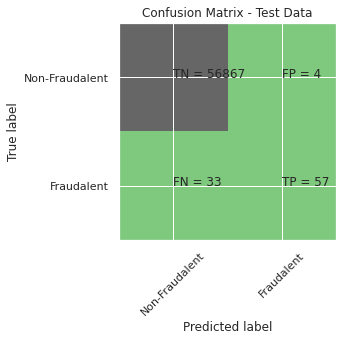

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.93      0.63      0.75        90

    accuracy                           1.00     56961
   macro avg       0.97      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8997972018544894
KNN threshold: 0.2
ROC for the test dataset 90.0%


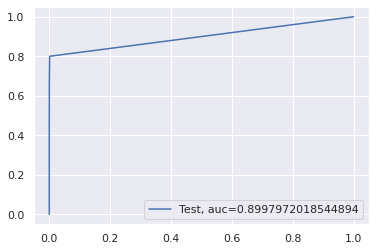

Time Taken by Model: --- 150.88351702690125 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992275416513052
Confusion Matrix


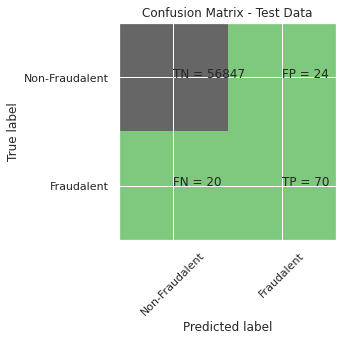

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.74      0.78      0.76        90

    accuracy                           1.00     56961
   macro avg       0.87      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8886778850380685
Tree threshold: 1.0
ROC for the test dataset 88.9%


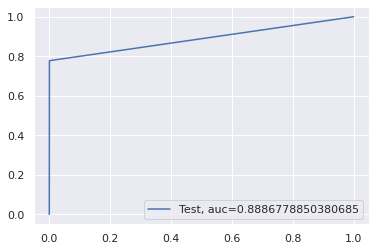

entropy score: 0.9992099857797441
Confusion Matrix


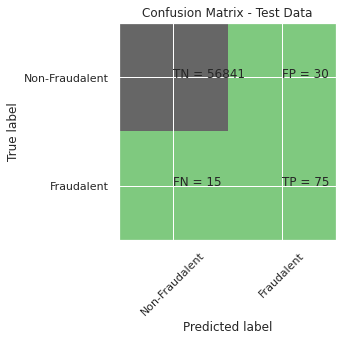

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.71      0.83      0.77        90

    accuracy                           1.00     56961
   macro avg       0.86      0.92      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9164029118531414
Tree threshold: 1.0
ROC for the test dataset 91.6%


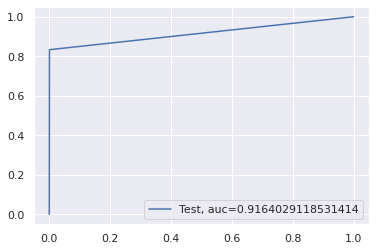

Time Taken by Model: --- 36.61784243583679 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996664384403364
Confusion Matrix


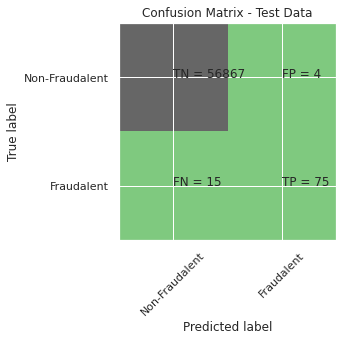

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.95      0.83      0.89        90

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9657107019980893
Random Forest threshold: 0.02
ROC for the test dataset 96.6%


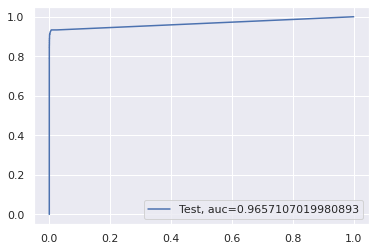

Time Taken by Model: --- 243.31183528900146 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


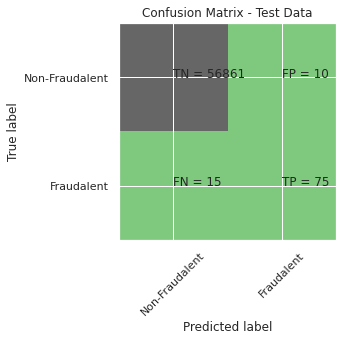

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.88      0.83      0.86        90

    accuracy                           1.00     56961
   macro avg       0.94      0.92      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9883894154216463
XGBoost threshold: 0.002282689092680812
ROC for the test dataset 98.8%


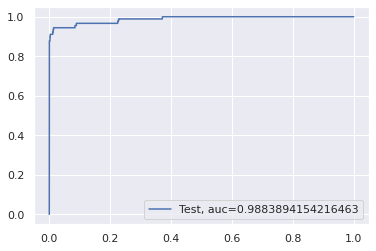

Time Taken by Model: --- 55.75874876976013 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9984375274310493
Confusion Matrix


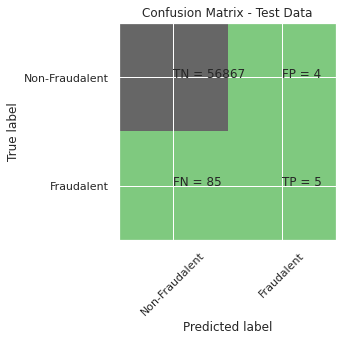

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56871
           1       0.56      0.06      0.10        90

    accuracy                           1.00     56961
   macro avg       0.78      0.53      0.55     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4556147538581468
SVM threshold: 0.002846319453108003
ROC for the test dataset 45.6%


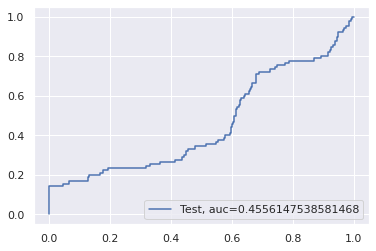

Time Taken by Model: --- 271.8639495372772 seconds ---


In [59]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [60]:

df_Results

Data_Imbalance_Handiling  ... threshold
0                Power Transformer  ...  0.001289
1                Power Transformer  ...  0.002676
2                Power Transformer  ...  0.200000
3                Power Transformer  ...  1.000000
4                Power Transformer  ...  1.000000
5                Power Transformer  ...  0.010000
6                Power Transformer  ...  0.000756
7                Power Transformer  ...  0.001412
8   RepeatedKFold Cross Validation  ...  0.002034
9   RepeatedKFold Cross Validation  ...  0.021679
10  RepeatedKFold Cross Validation  ...  0.200000
11  RepeatedKFold Cross Validation  ...  1.000000
12  RepeatedKFold Cross Validation  ...  1.000000
13  RepeatedKFold Cross Validation  ...  0.020000
14  RepeatedKFold Cross Validation  ...  0.002283
15  RepeatedKFold Cross Validation  ...  0.002846

[16 rows x 5 columns]

In [61]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


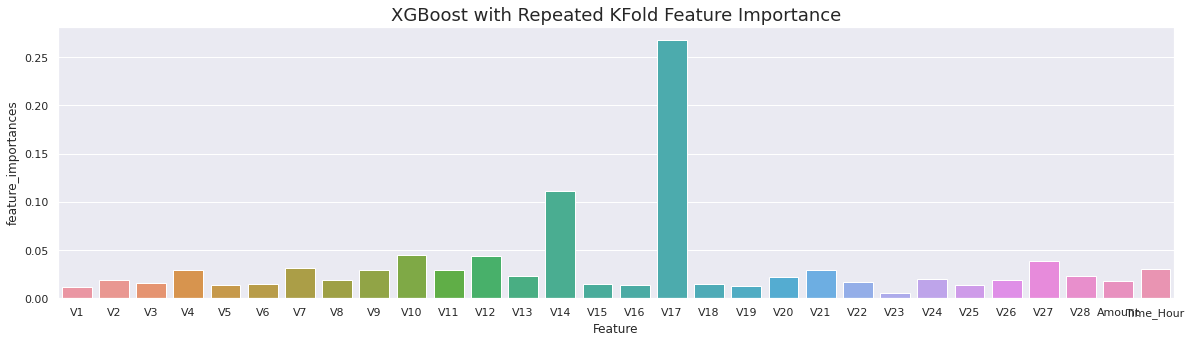

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

In [63]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9825816914072499
Max auc_roc for l1: 0.9532044417995286
Parameters for l2 regularisations
[[ 0.00682134  0.0618205  -0.06725686  0.21872209  0.05424776 -0.03201207
  -0.0228637  -0.11503239 -0.06925662 -0.16370854  0.1281004  -0.19235052
  -0.03678146 -0.3605884   0.00342775 -0.08795297 -0.07264108 -0.00066922
   0.003916   -0.02820589  0.0381985   0.02340004 -0.01160941 -0.00998611
  -0.00655734  0.00630861 -0.01015028 -0.00168492  0.00040041  0.00055454]]
[-7.43130826]
{1: array([[0.69244522, 0.69421053, 0.71448798, 0.83769702, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99128841, 0.9909615 ,
        0.9909615 , 0.9909615 , 0.9909615 , 0.9909615 , 0.9909615 ,
        0.9909615 , 0.9909615 , 0.9909615 , 0.9909615 , 0.9909615 ],
       [0.60700056, 0.60865306, 0.62914364, 0.76883856, 0.9090004 ,
        0.94879881, 0.96041026, 0.98264504, 0.98536614, 0.98263849,
        0.98263849, 0.97925583, 0.97925

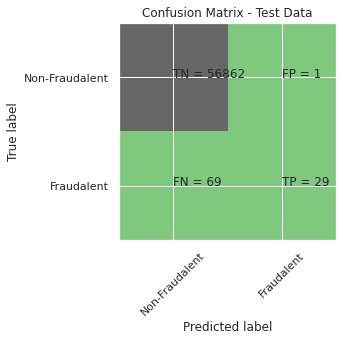

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.998630642018223
Confusion Matrix


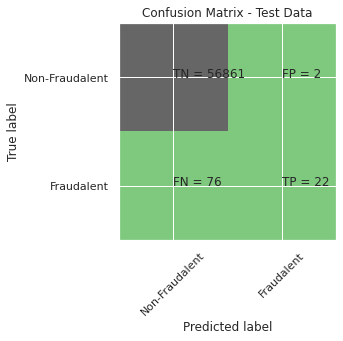

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.22      0.36        98

    accuracy                           1.00     56961
   macro avg       0.96      0.61      0.68     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833290683981945
l2 threshold: 0.0015722938315703933
ROC for the test dataset 98.3%


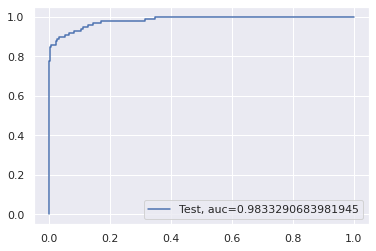

l1 roc_value: 0.9234125917394727
l1 threshold: 0.004244430667996755
ROC for the test dataset 92.3%


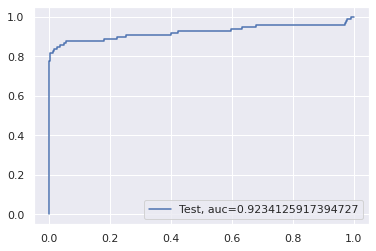

Time Taken by Model: --- 367.0703363418579 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


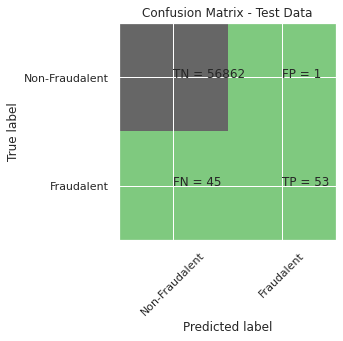

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


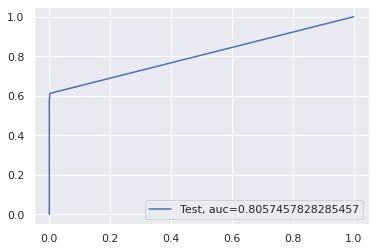

Time Taken by Model: --- 158.54994535446167 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


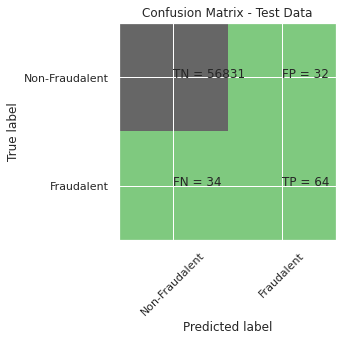

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


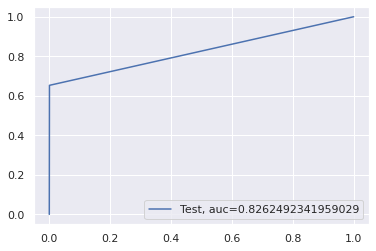

entropy score: 0.9990168711925703
Confusion Matrix


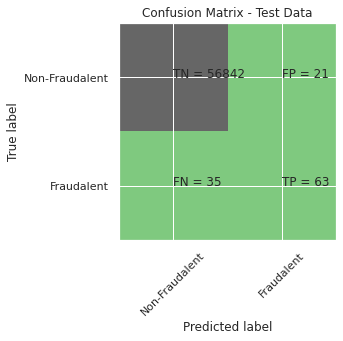

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


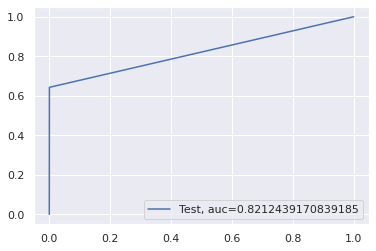

Time Taken by Model: --- 38.48877143859863 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


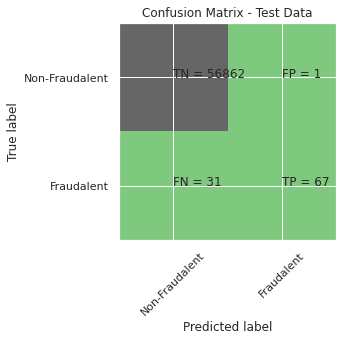

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


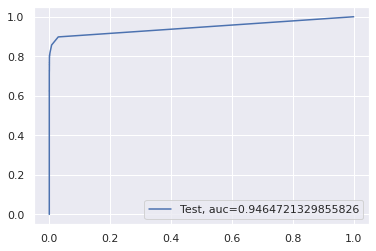

Time Taken by Model: --- 237.49438858032227 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


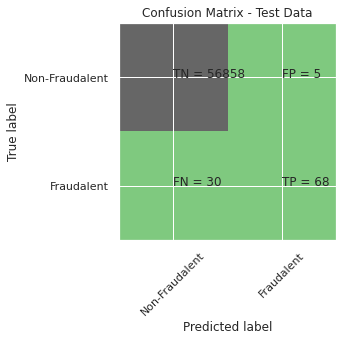

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.69      0.80        98

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9781480694558744
XGBoost threshold: 0.002443221863359213
ROC for the test dataset 97.8%


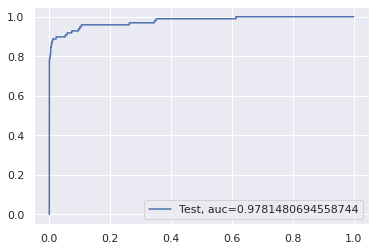

Time Taken by Model: --- 55.17087483406067 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


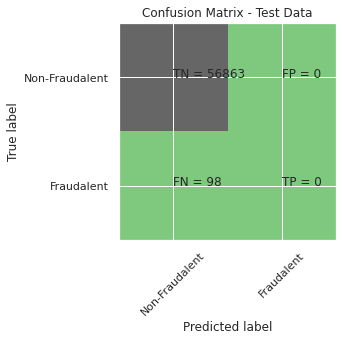

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.002763474152495921
ROC for the test dataset 40.2%


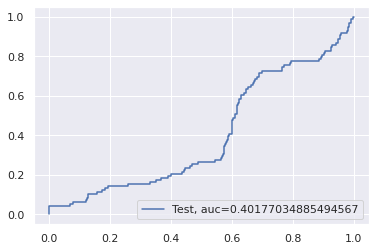

Time Taken by Model: --- 255.85869550704956 seconds ---


In [64]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [65]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                  Power Transformer  ...  0.001289
1                  Power Transformer  ...  0.002676
2                  Power Transformer  ...  0.200000
3                  Power Transformer  ...  1.000000
4                  Power Transformer  ...  1.000000
5                  Power Transformer  ...  0.010000
6                  Power Transformer  ...  0.000756
7                  Power Transformer  ...  0.001412
8     RepeatedKFold Cross Validation  ...  0.002034
9     RepeatedKFold Cross Validation  ...  0.021679
10    RepeatedKFold Cross Validation  ...  0.200000
11    RepeatedKFold Cross Validation  ...  1.000000
12    RepeatedKFold Cross Validation  ...  1.000000
13    RepeatedKFold Cross Validation  ...  0.020000
14    RepeatedKFold Cross Validation  ...  0.002283
15    RepeatedKFold Cross Validation  ...  0.002846
16  StratifiedKFold Cross Validation  ...  0.001572
17  StratifiedKFold Cross Validation  ...  0.004244
18  StratifiedKFold Cross Validation  ...  0.200000
19  StratifiedKFold Cross Validation  ...  1.000000
20  StratifiedKFold Cross Validation  ...  1.000000
21  StratifiedKFold Cross Validation  ...  0.010000
22  StratifiedKFold Cross Validation  ...  0.002443
23  StratifiedKFold Cross Validation  ...  0.002763

[24 rows x 5 columns]

In [66]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.9855717343054875
Parameters for l2 regularisations
[[ 2.06712916e-02  3.28634034e-02 -8.98459762e-02  2.36582134e-01
   8.30667544e-02 -4.91317286e-02 -3.31582046e-02 -1.07710538e-01
  -9.17080268e-02 -1.74822830e-01  1.35756556e-01 -2.08538642e-01
  -4.25650145e-02 -3.77090559e-01 -1.08797881e-02 -1.04711567e-01
  -1.14760241e-01 -8.69387659e-03  1.49383024e-02 -5.48477112e-03
   3.94343709e-02  2.42646603e-02  1.88197823e-03 -1.56837829e-02
  -7.94041410e-03  5.13236765e-03 -3.35630037e-03 -2.61800785e-04
   3.03370023e-04  4.81690313e-03]]
[-7.49773835]
{1: array([[0.58216478, 0.5843407 , 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.99602058, 0.99404369, 0.99428302, 0.99498879,
        0.99498879, 0.99267123, 0.99267123, 0.99267123, 0.99267123,
        0.99267123, 0.99267123, 0.99267123, 0.99267123, 0.99267123],
       [0.56179302, 0.56166503, 0.57969785, 0.7209069 , 0.88967647,
        0.94001686, 0.97078861, 0.97488152, 0.97860728, 0.98064468,
  

In [67]:
searchCV_l2.coef_

array([[ 2.06712916e-02,  3.28634034e-02, -8.98459762e-02,
         2.36582134e-01,  8.30667544e-02, -4.91317286e-02,
        -3.31582046e-02, -1.07710538e-01, -9.17080268e-02,
        -1.74822830e-01,  1.35756556e-01, -2.08538642e-01,
        -4.25650145e-02, -3.77090559e-01, -1.08797881e-02,
        -1.04711567e-01, -1.14760241e-01, -8.69387659e-03,
         1.49383024e-02, -5.48477112e-03,  3.94343709e-02,
         2.42646603e-02,  1.88197823e-03, -1.56837829e-02,
        -7.94041410e-03,  5.13236765e-03, -3.35630037e-03,
        -2.61800785e-04,  3.03370023e-04,  4.81690313e-03]])

In [68]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [69]:
coefficients

Feature  Importance Coefficient
0          V1                0.020671
1          V2                0.032863
2          V3               -0.089846
3          V4                0.236582
4          V5                0.083067
5          V6               -0.049132
6          V7               -0.033158
7          V8               -0.107711
8          V9               -0.091708
9         V10               -0.174823
10        V11                0.135757
11        V12               -0.208539
12        V13               -0.042565
13        V14               -0.377091
14        V15               -0.010880
15        V16               -0.104712
16        V17               -0.114760
17        V18               -0.008694
18        V19                0.014938
19        V20               -0.005485
20        V21                0.039434
21        V22                0.024265
22        V23                0.001882
23        V24               -0.015684
24        V25               -0.007940
25        V26                0.005132
26        V27               -0.003356
27        V28               -0.000262
28     Amount                0.000303
29  Time_Hour                0.004817

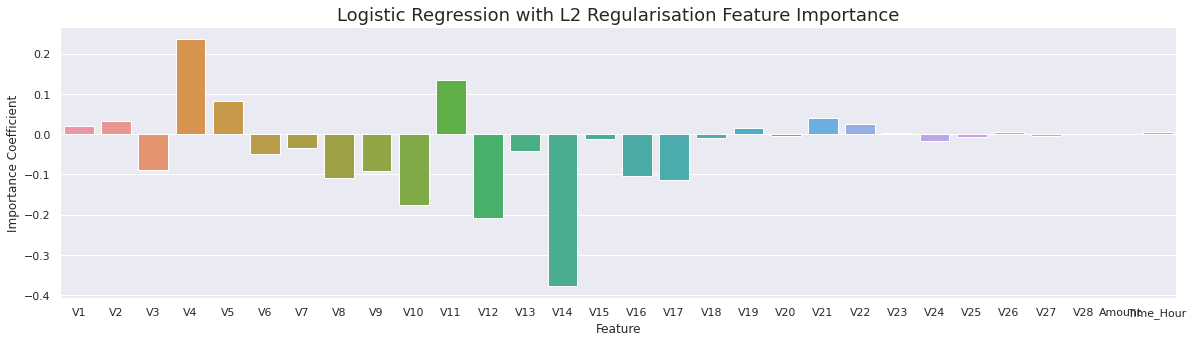

In [70]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



In [71]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.98005746605813
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.02673428  0.05276209 -0.11091947  0.14652293  0.00594076 -0.03522247
  -0.04566461 -0.01791069 -0.04111713 -0.09512199  0.08031485 -0.1214931
  -0.02172421 -0.19789315 -0.00695686 -0.04993674 -0.05327568 -0.00430874
   0.0017991  -0.00922506  0.01348625  0.00277854 -0.00807695 -0.00725053
   0.00097262 -0.00252083  0.00683     0.00196747  0.00036949 -0.01225724]]
[-2.03218023]
{1: array([[0.61217949, 0.61410256, 0.63397436, 0.74775641, 0.91185897,
        0.95      , 0.96987179, 0.98557692, 0.98525641, 0.98525641,
        0.98397436, 0.98397436, 0.98397436, 0.98397436, 0.98397436,
        0.98397436, 0.98397436, 0.98397436, 0.98397436, 0.98397436],
       [0.55815465, 0.56042885, 0.58024691, 0.69623132, 0.85282651,
        0.90903184, 0.93729695, 0.96068876, 0.95906433, 0.96068876,
        0.96068876, 0.96068876, 0.96068876, 0.96068876, 0

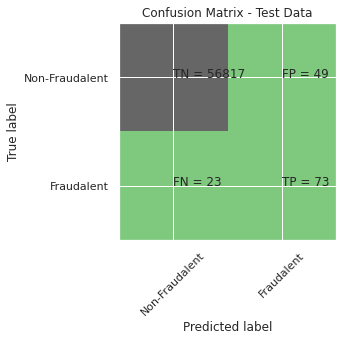

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.60      0.76      0.67        96

    accuracy                           1.00     56962
   macro avg       0.80      0.88      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


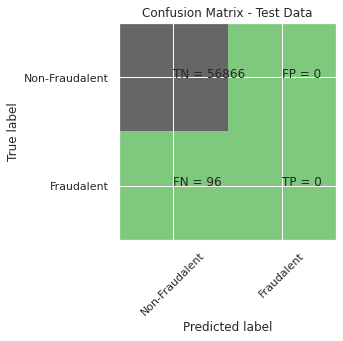

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9689533288784159
l2 threshold: 0.15553755060644023
ROC for the test dataset 96.9%


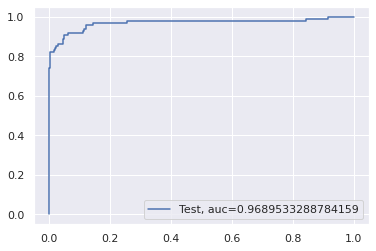

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


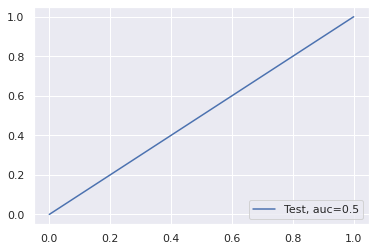

Time Taken by Model: --- 2.8324403762817383 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9717179874302166
Confusion Matrix


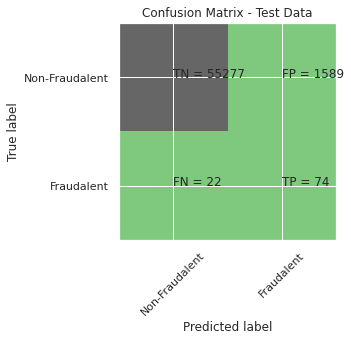

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.04      0.77      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.87      0.53     56962
weighted avg       1.00      0.97      0.98     56962

KNN roc_value: 0.9415139135570171
KNN threshold: 0.4
ROC for the test dataset 94.2%


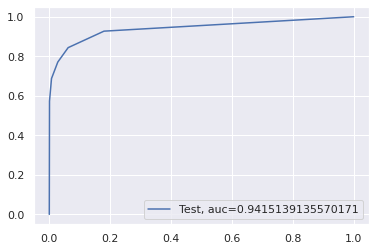

Time Taken by Model: --- 7.116795778274536 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9424704188757417
Confusion Matrix


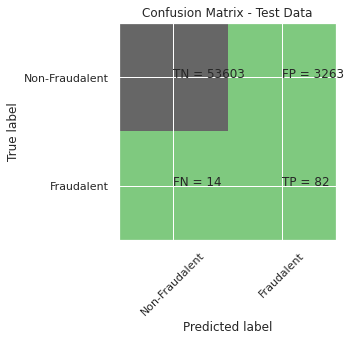

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.85      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.8983930790513369
Tree threshold: 1.0
ROC for the test dataset 89.8%


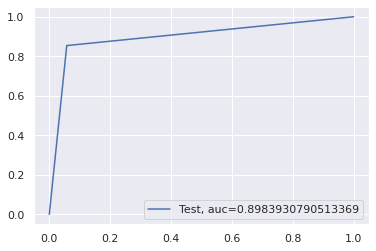

entropy score: 0.945788420350409
Confusion Matrix


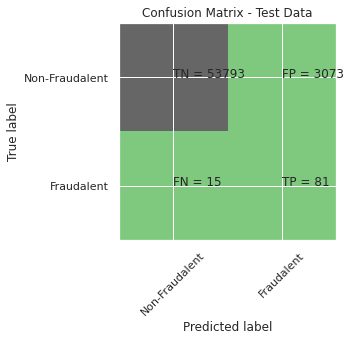

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.95      0.97     56962

entropy tree_roc_value: 0.8948553397460697
Tree threshold: 1.0
ROC for the test dataset 89.5%


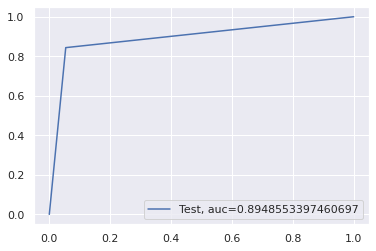

Time Taken by Model: --- 1.4073731899261475 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9920999964888874
Confusion Matrix


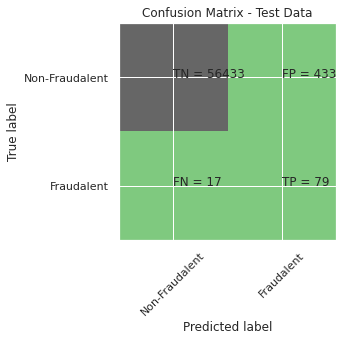

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.82      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9740226292219135
Random Forest threshold: 0.23
ROC for the test dataset 97.4%


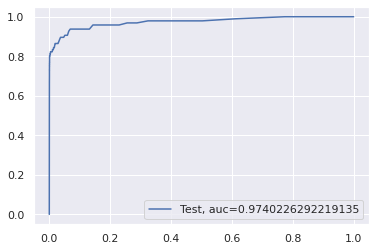

Time Taken by Model: --- 3.191619396209717 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9852006600891823
Confusion Matrix


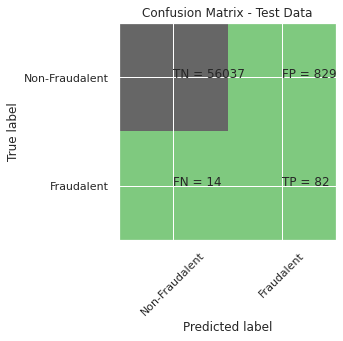

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.85      0.16        96

    accuracy                           0.99     56962
   macro avg       0.54      0.92      0.58     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9784647240882074
XGBoost threshold: 0.13791325688362122
ROC for the test dataset 97.8%


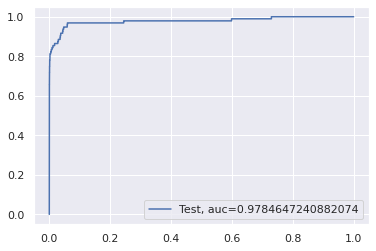

Time Taken by Model: --- 1.4514336585998535 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.7933007970225765
Confusion Matrix


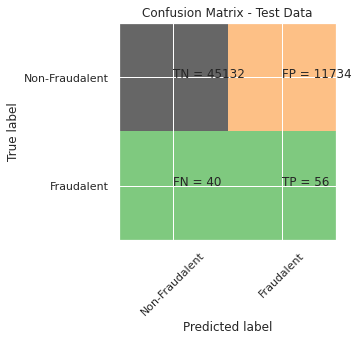

classification Report
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     56866
           1       0.00      0.58      0.01        96

    accuracy                           0.79     56962
   macro avg       0.50      0.69      0.45     56962
weighted avg       1.00      0.79      0.88     56962

SVM roc_value: 0.69501547497626
SVM threshold: 0.34404657626273183
ROC for the test dataset 69.5%


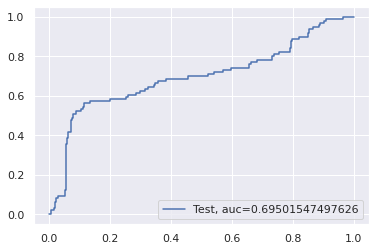

Time Taken by Model: --- 4.7789671421051025 seconds ---


In [72]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [73]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                  Power Transformer  ...  0.001289
1                  Power Transformer  ...  0.002676
2                  Power Transformer  ...  0.200000
3                  Power Transformer  ...  1.000000
4                  Power Transformer  ...  1.000000
5                  Power Transformer  ...  0.010000
6                  Power Transformer  ...  0.000756
7                  Power Transformer  ...  0.001412
8     RepeatedKFold Cross Validation  ...  0.002034
9     RepeatedKFold Cross Validation  ...  0.021679
10    RepeatedKFold Cross Validation  ...  0.200000
11    RepeatedKFold Cross Validation  ...  1.000000
12    RepeatedKFold Cross Validation  ...  1.000000
13    RepeatedKFold Cross Validation  ...  0.020000
14    RepeatedKFold Cross Validation  ...  0.002283
15    RepeatedKFold Cross Validation  ...  0.002846
16  StratifiedKFold Cross Validation  ...  0.001572
17  StratifiedKFold Cross Validation  ...  0.004244
18  StratifiedKFold Cross Validation  ...  0.200000
19  StratifiedKFold Cross Validation  ...  1.000000
20  StratifiedKFold Cross Validation  ...  1.000000
21  StratifiedKFold Cross Validation  ...  0.010000
22  StratifiedKFold Cross Validation  ...  0.002443
23  StratifiedKFold Cross Validation  ...  0.002763
24              Random Undersampling  ...  0.155538
25              Random Undersampling  ...  1.500000
26              Random Undersampling  ...  0.400000
27              Random Undersampling  ...  1.000000
28              Random Undersampling  ...  1.000000
29              Random Undersampling  ...  0.230000
30              Random Undersampling  ...  0.137913
31              Random Undersampling  ...  0.344047

[32 rows x 5 columns]

In [74]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9866395664675889
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.38294926  0.3948949   0.28387428  0.83727517  0.36225184 -0.47918897
  -0.3660851  -0.32801427 -0.24260081 -0.67489647  0.29776737 -0.91698032
  -0.31054373 -0.90591777  0.00605608 -0.52371547 -0.3005442  -0.13598353
   0.12505518 -0.72693447  0.07038042  0.52165549  0.14224386 -0.43287374
   0.2184471  -0.12065354 -0.36164535  0.16900336  0.00563795  0.03965801]]
[-5.14430873]
{1: array([[0.63607823, 0.7629573 , 0.9062758 , 0.95434527, 0.97529463,
        0.98327983, 0.98473646, 0.98520678, 0.98549788, 0.98561361,
        0.98563312, 0.98563312, 0.98563312, 0.98563312, 0.98563312,
        0.98563312, 0.98563312, 0.98563312, 0.98563312, 0.98563312],
       [0.62969544, 0.7565944 , 0.90443548, 0.9562773 , 0.97690503,
        0.98413295, 0.98567472, 0.98620359, 0.98650963, 0.98661233,
        0.9866314 , 0.9866314 , 0.9866314 , 0.9866314 

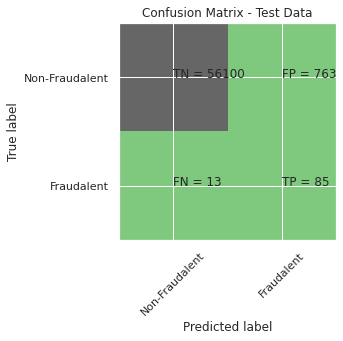

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


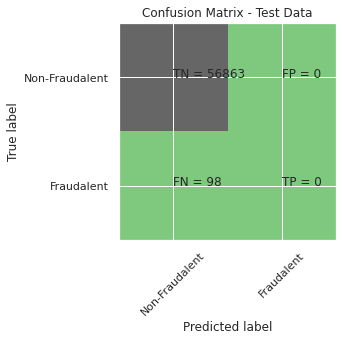

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9808033056178347
l2 threshold: 0.41875625813653433
ROC for the test dataset 98.1%


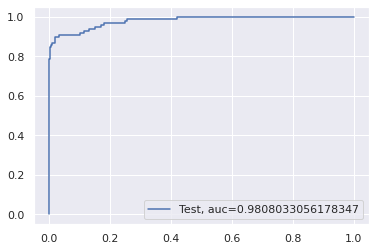

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


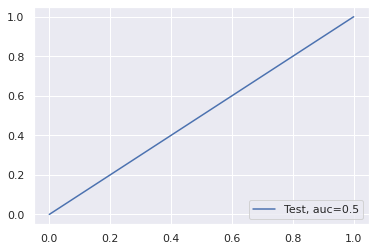

Time Taken by Model: --- 493.6009097099304 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


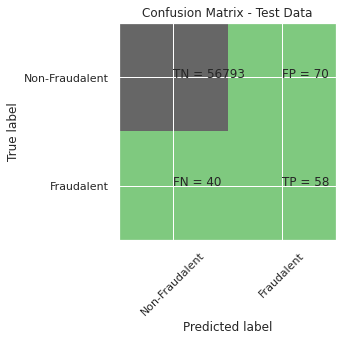

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


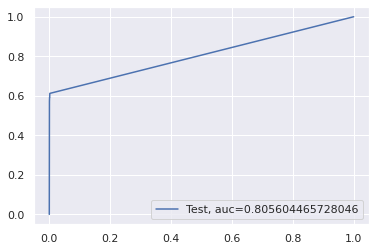

Time Taken by Model: --- 159.37358713150024 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991046505503766
Confusion Matrix


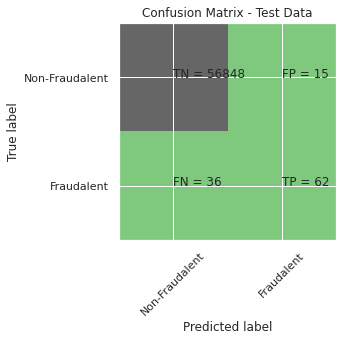

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.63      0.71        98

    accuracy                           1.00     56961
   macro avg       0.90      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8161946346517785
Tree threshold: 1.0
ROC for the test dataset 81.6%


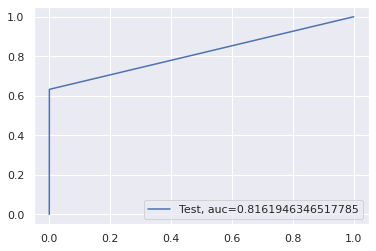

entropy score: 0.9991924299081828
Confusion Matrix


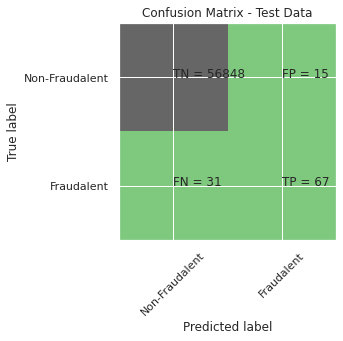

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.68      0.74        98

    accuracy                           1.00     56961
   macro avg       0.91      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8417048387334112
Tree threshold: 1.0
ROC for the test dataset 84.2%


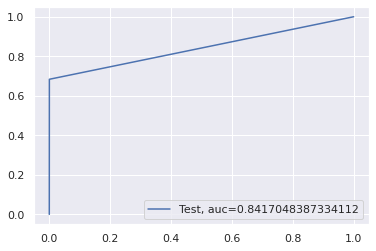

Time Taken by Model: --- 30.305703163146973 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


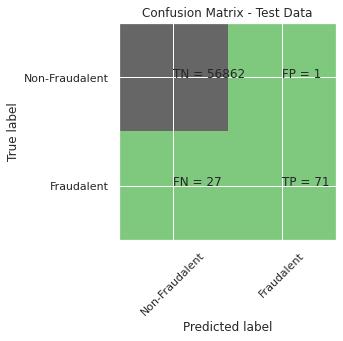

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9405200361628216
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


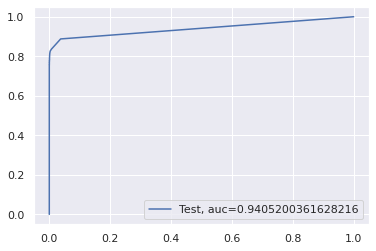

Time Taken by Model: --- 196.48889207839966 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9965766050455575
Confusion Matrix


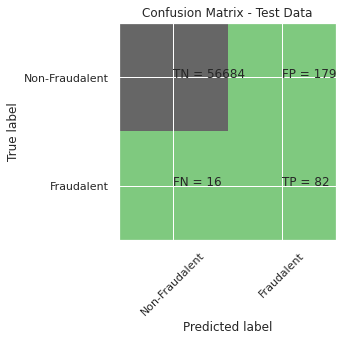

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.31      0.84      0.46        98

    accuracy                           1.00     56961
   macro avg       0.66      0.92      0.73     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9811971989963704
XGBoost threshold: 0.21846163272857666
ROC for the test dataset 98.1%


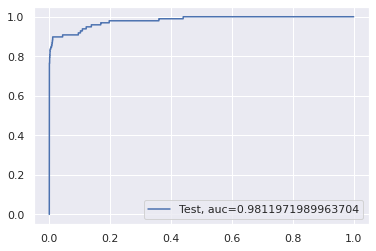

Time Taken by Model: --- 74.62964940071106 seconds ---
--------------------------------------------------------------------------------


In [75]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [76]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                              Power Transformer  ...  0.001289
1                              Power Transformer  ...  0.002676
2                              Power Transformer  ...  0.200000
3                              Power Transformer  ...  1.000000
4                              Power Transformer  ...  1.000000
5                              Power Transformer  ...  0.010000
6                              Power Transformer  ...  0.000756
7                              Power Transformer  ...  0.001412
8                 RepeatedKFold Cross Validation  ...  0.002034
9                 RepeatedKFold Cross Validation  ...  0.021679
10                RepeatedKFold Cross Validation  ...  0.200000
11                RepeatedKFold Cross Validation  ...  1.000000
12                RepeatedKFold Cross Validation  ...  1.000000
13                RepeatedKFold Cross Validation  ...  0.020000
14                RepeatedKFold Cross Validation  ...  0.002283
15                RepeatedKFold Cross Validation  ...  0.002846
16              StratifiedKFold Cross Validation  ...  0.001572
17              StratifiedKFold Cross Validation  ...  0.004244
18              StratifiedKFold Cross Validation  ...  0.200000
19              StratifiedKFold Cross Validation  ...  1.000000
20              StratifiedKFold Cross Validation  ...  1.000000
21              StratifiedKFold Cross Validation  ...  0.010000
22              StratifiedKFold Cross Validation  ...  0.002443
23              StratifiedKFold Cross Validation  ...  0.002763
24                          Random Undersampling  ...  0.155538
25                          Random Undersampling  ...  1.500000
26                          Random Undersampling  ...  0.400000
27                          Random Undersampling  ...  1.000000
28                          Random Undersampling  ...  1.000000
29                          Random Undersampling  ...  0.230000
30                          Random Undersampling  ...  0.137913
31                          Random Undersampling  ...  0.344047
32  Random Oversampling with StratifiedKFold CV   ...  0.418756
33  Random Oversampling with StratifiedKFold CV   ...  1.500000
34  Random Oversampling with StratifiedKFold CV   ...  0.200000
35  Random Oversampling with StratifiedKFold CV   ...  1.000000
36  Random Oversampling with StratifiedKFold CV   ...  1.000000
37  Random Oversampling with StratifiedKFold CV   ...  0.010000
38  Random Oversampling with StratifiedKFold CV   ...  0.218462

[39 rows x 5 columns]

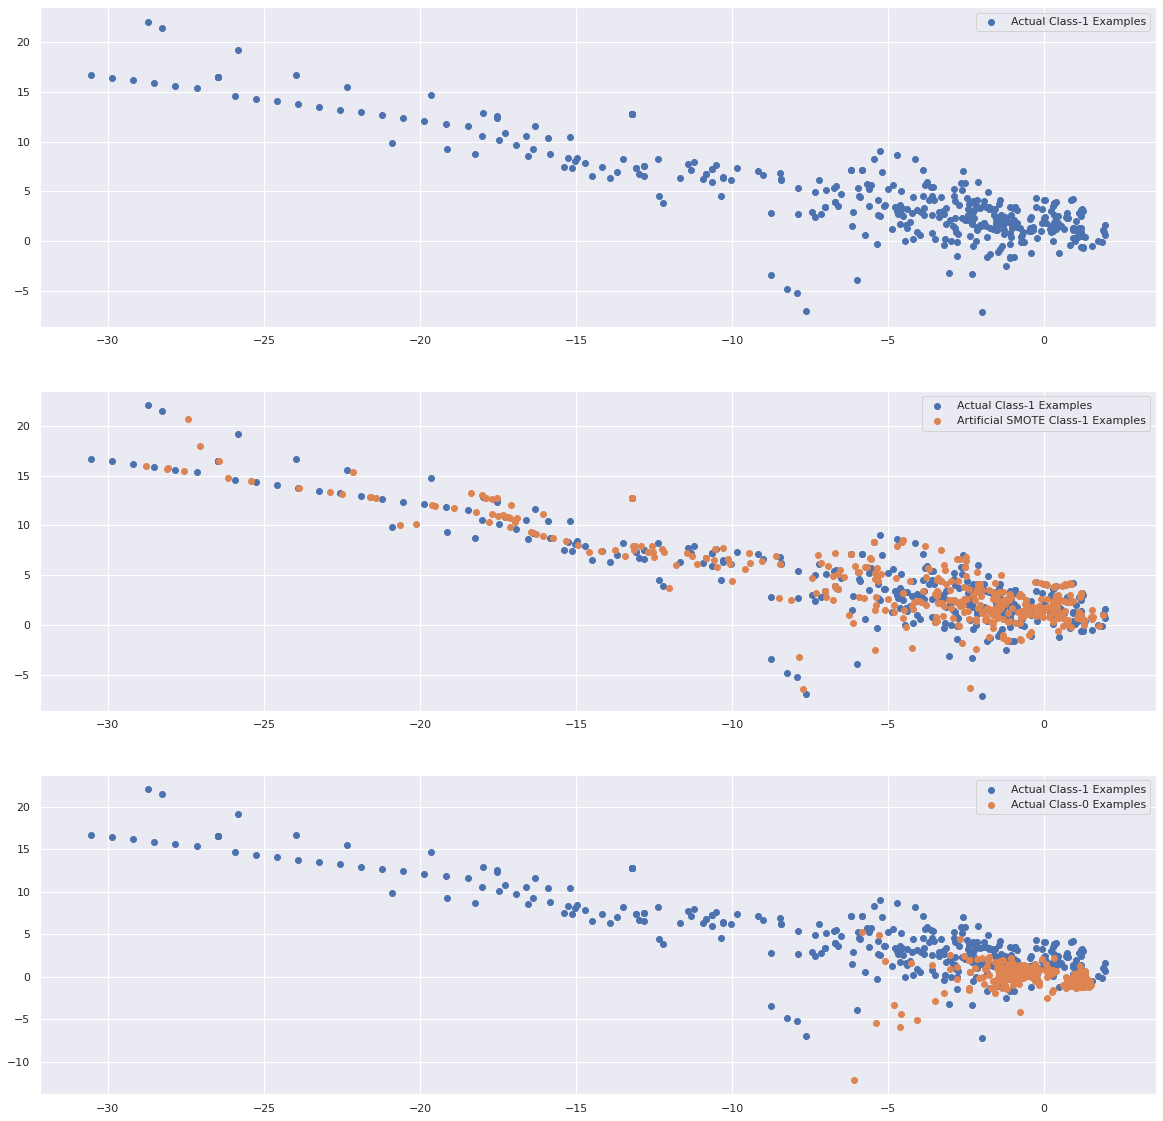

In [77]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [78]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9931097972884139
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.77323449  0.71944485  0.67439637  0.9382902   0.52153048 -0.92451538
  -0.6974139  -0.50067329 -0.3961952  -0.91340073  0.62480609 -1.29290648
  -0.215431   -1.51430077  0.10879197 -0.7795586  -0.83922358 -0.42656896
   0.22291104 -1.08034836 -0.01501472  0.57408626  0.41562851 -0.89811868
   0.50045992  0.03826695 -0.19036781  0.84617478  0.00910059  0.03331128]]
[-5.58923526]
{1: array([[0.64885856, 0.7848513 , 0.91728951, 0.96622837, 0.98569768,
        0.98987476, 0.99085675, 0.99170593, 0.9920452 , 0.99214287,
        0.99215313, 0.99215313, 0.99215215, 0.99215215, 0.99215215,
        0.99215215, 0.99215215, 0.99215215, 0.99215215, 0.99215215],
       [0.64564205, 0.78391169, 0.91896288, 0.96868708, 0.98727478,
        0.99110178, 0.99198605, 0.99283415, 0.9931984 , 0.9932958 ,
        0.99331081, 0.99331081, 0.99331081, 0.99331081

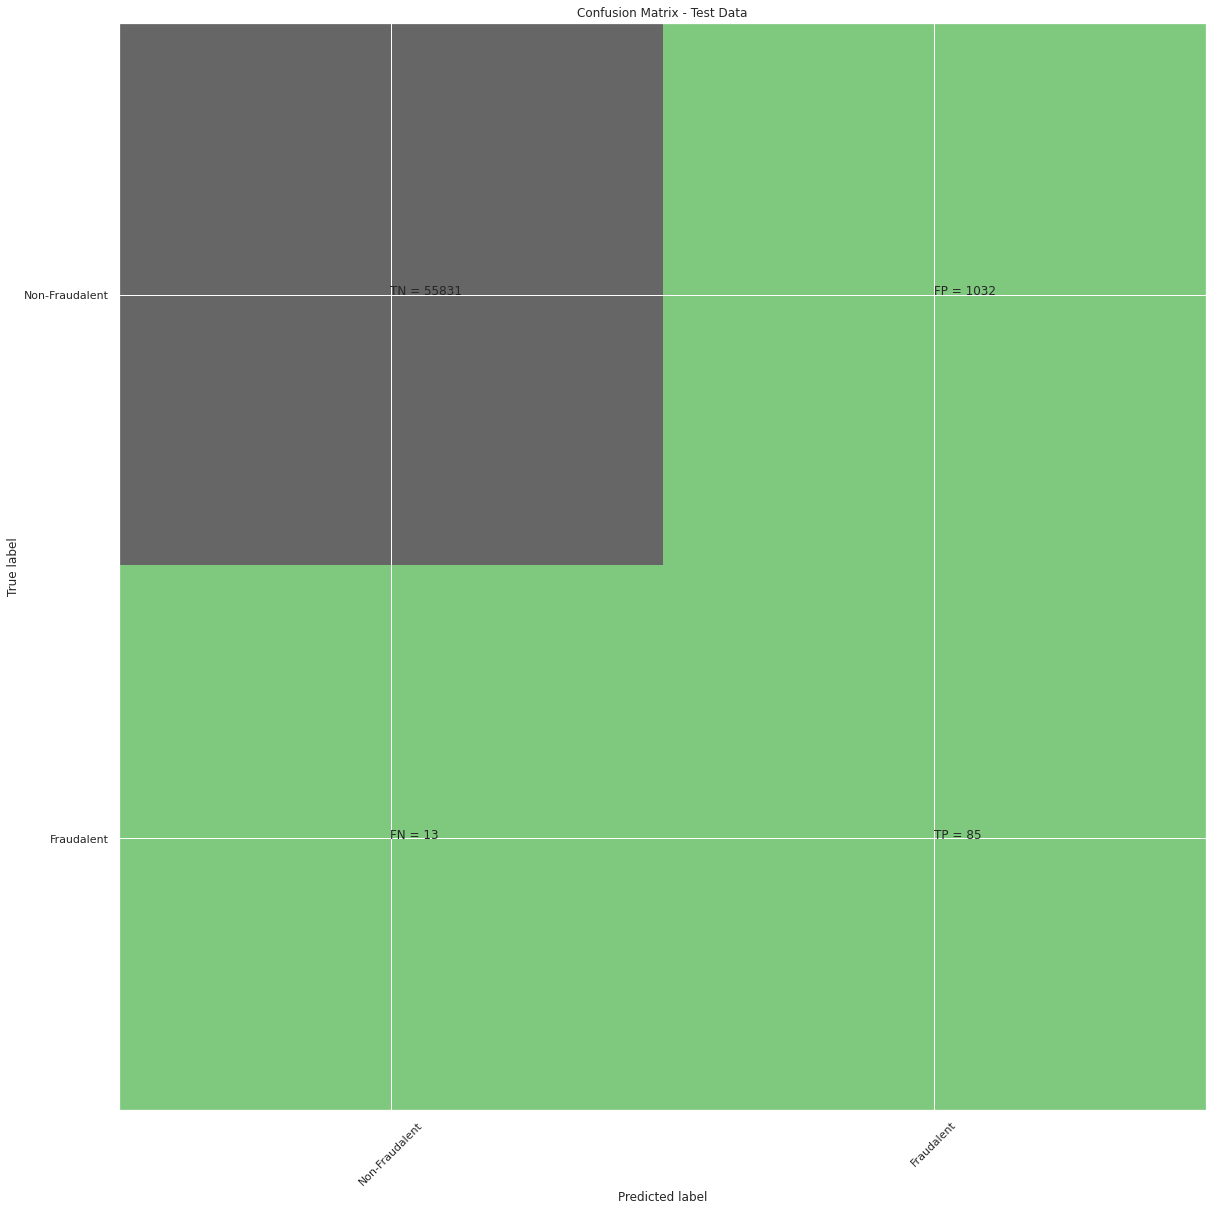

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.14        98

    accuracy                           0.98     56961
   macro avg       0.54      0.92      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


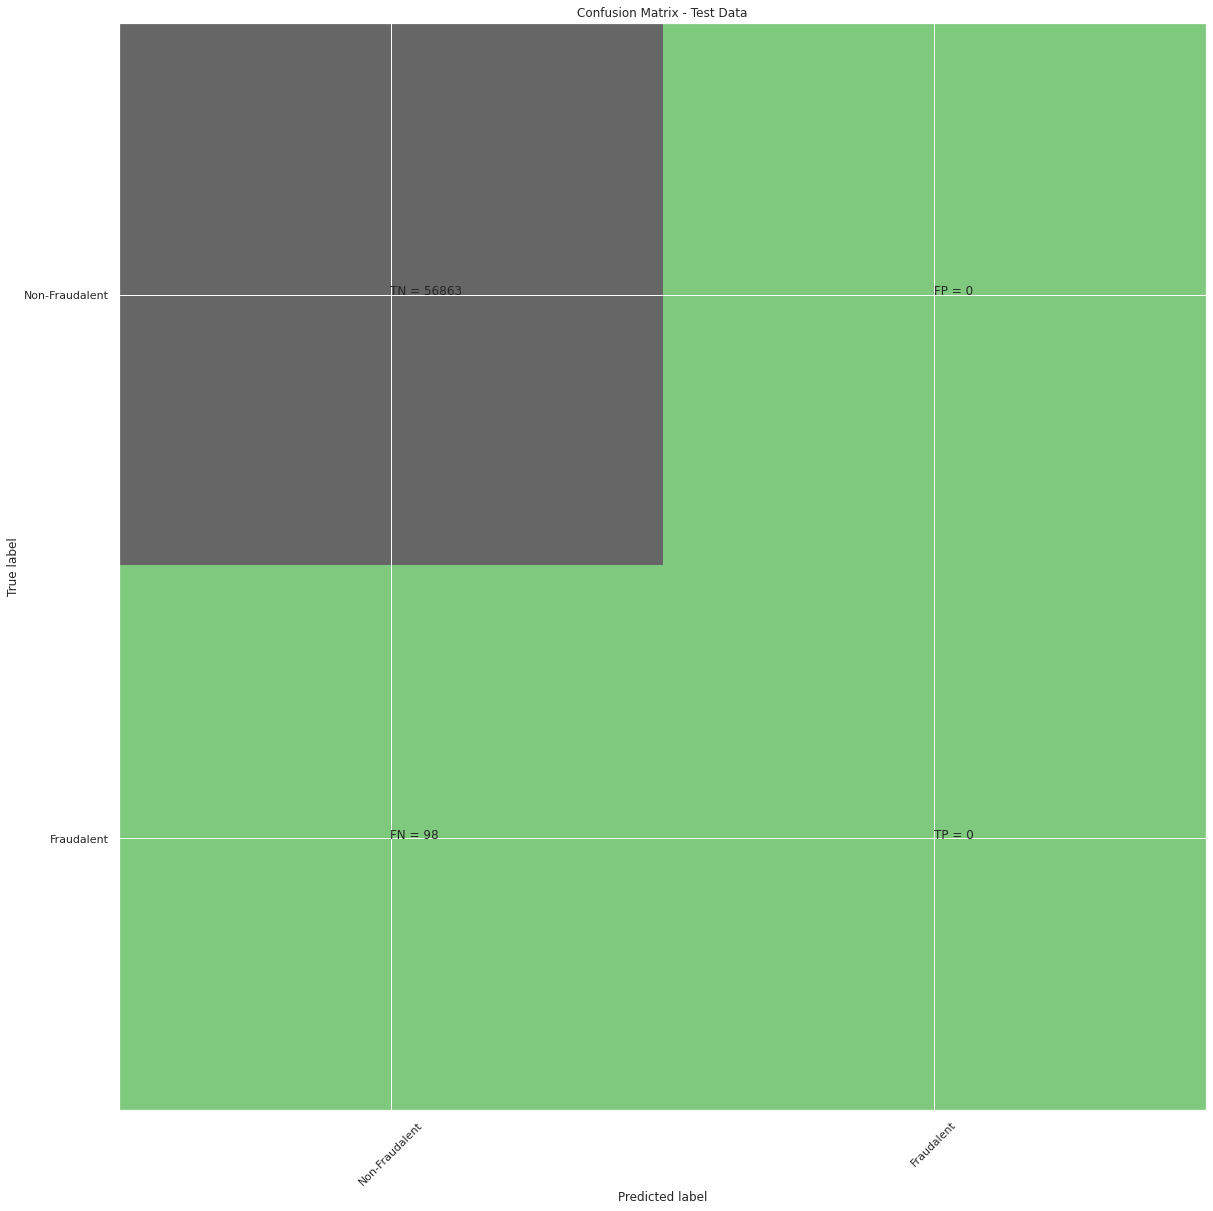

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9747257730449161
l2 threshold: 0.44651266531686923
ROC for the test dataset 97.5%


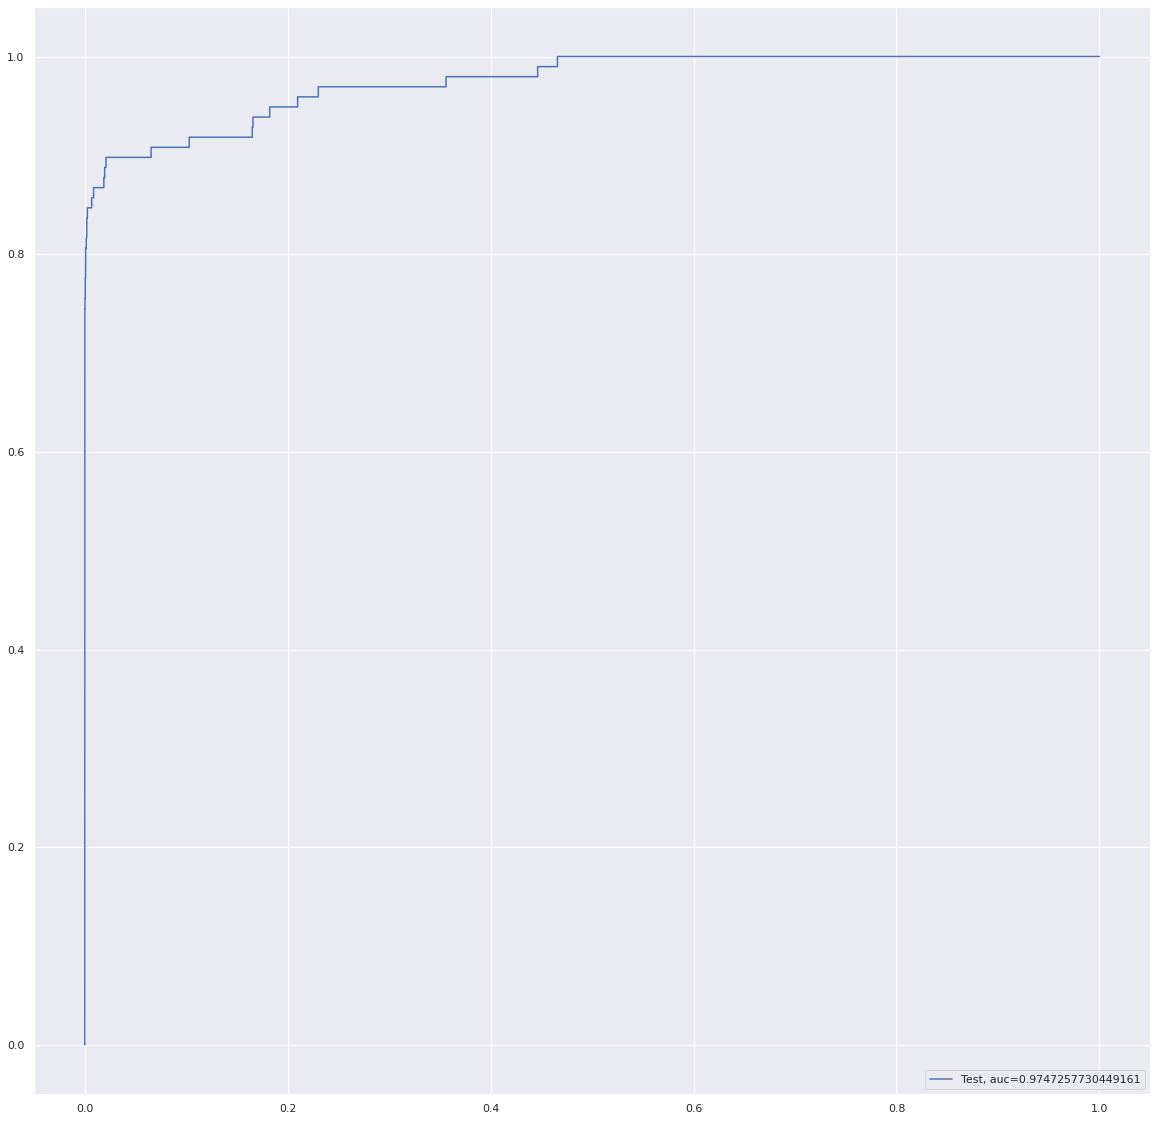

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


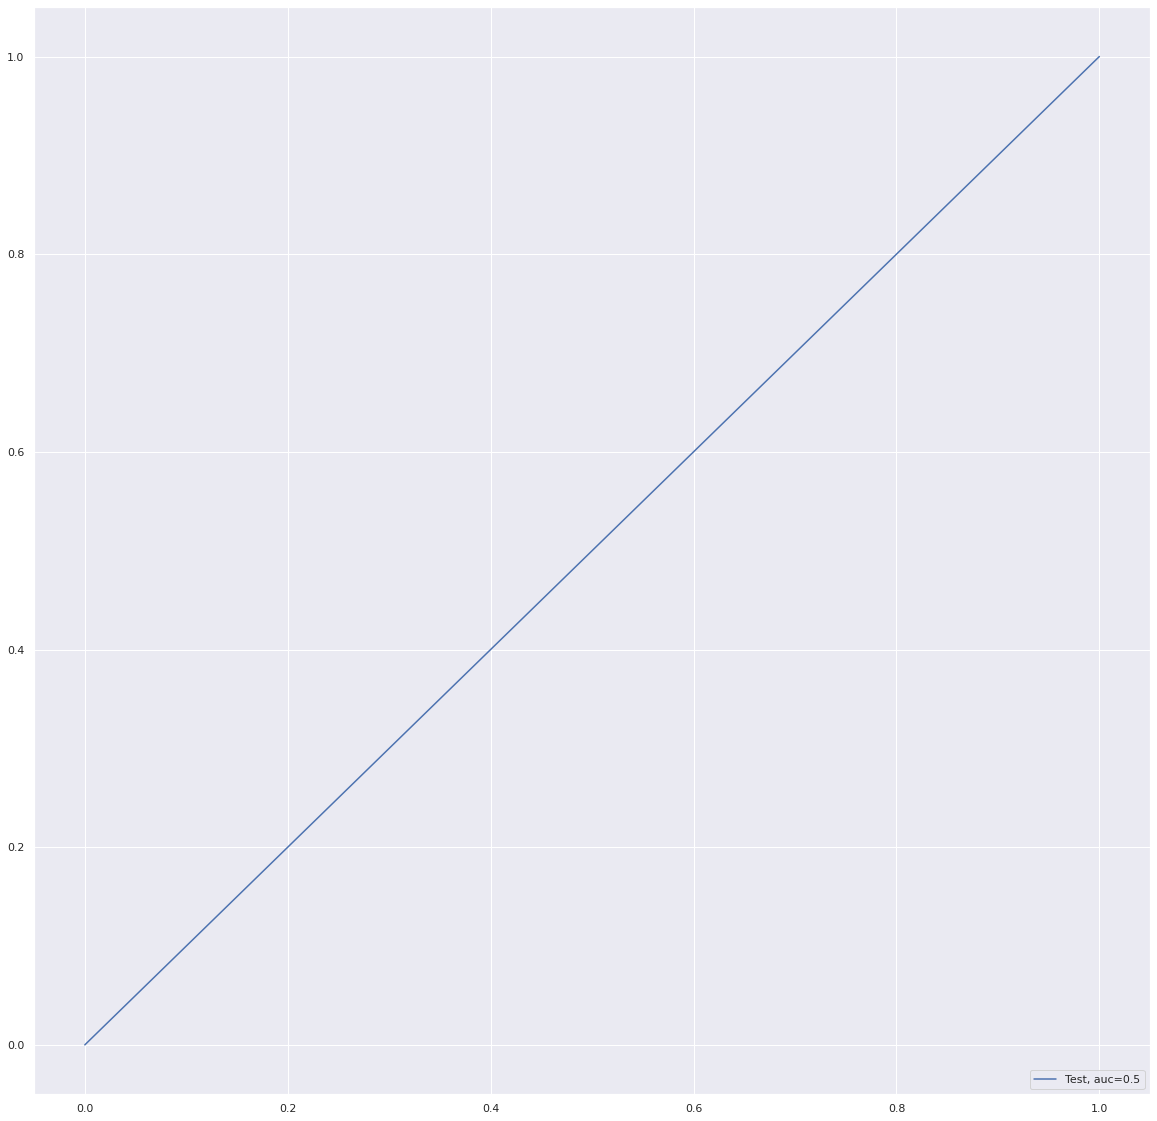

Time Taken by Model: --- 635.3507487773895 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9944699004582083
Confusion Matrix


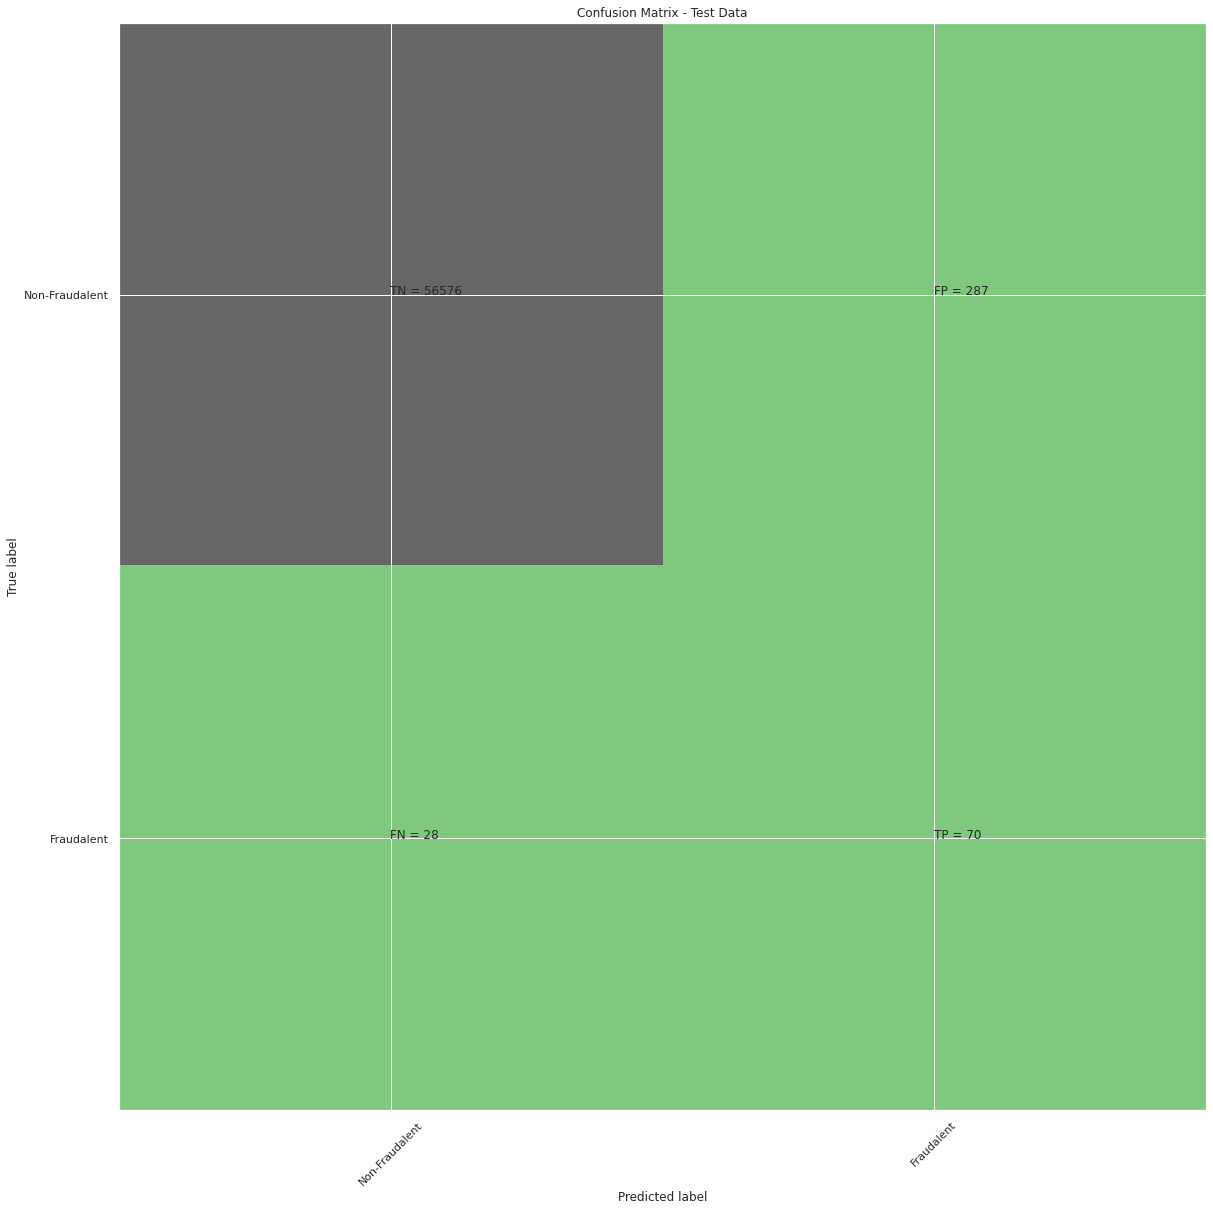

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.71      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602128926417127
KNN threshold: 0.4
ROC for the test dataset 86.0%


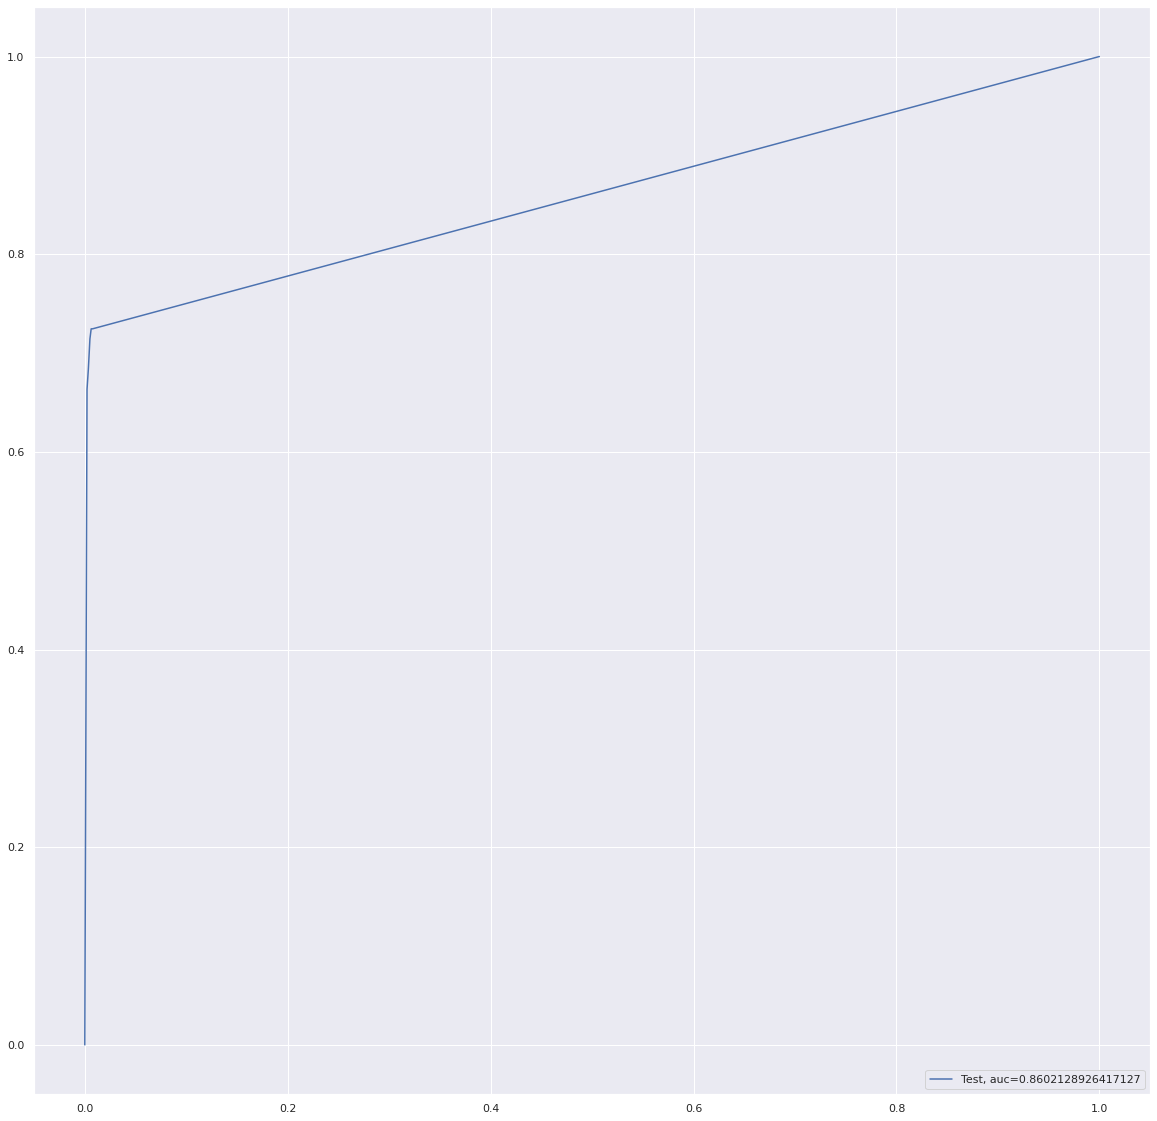

Time Taken by Model: --- 179.21037673950195 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9974719544951809
Confusion Matrix


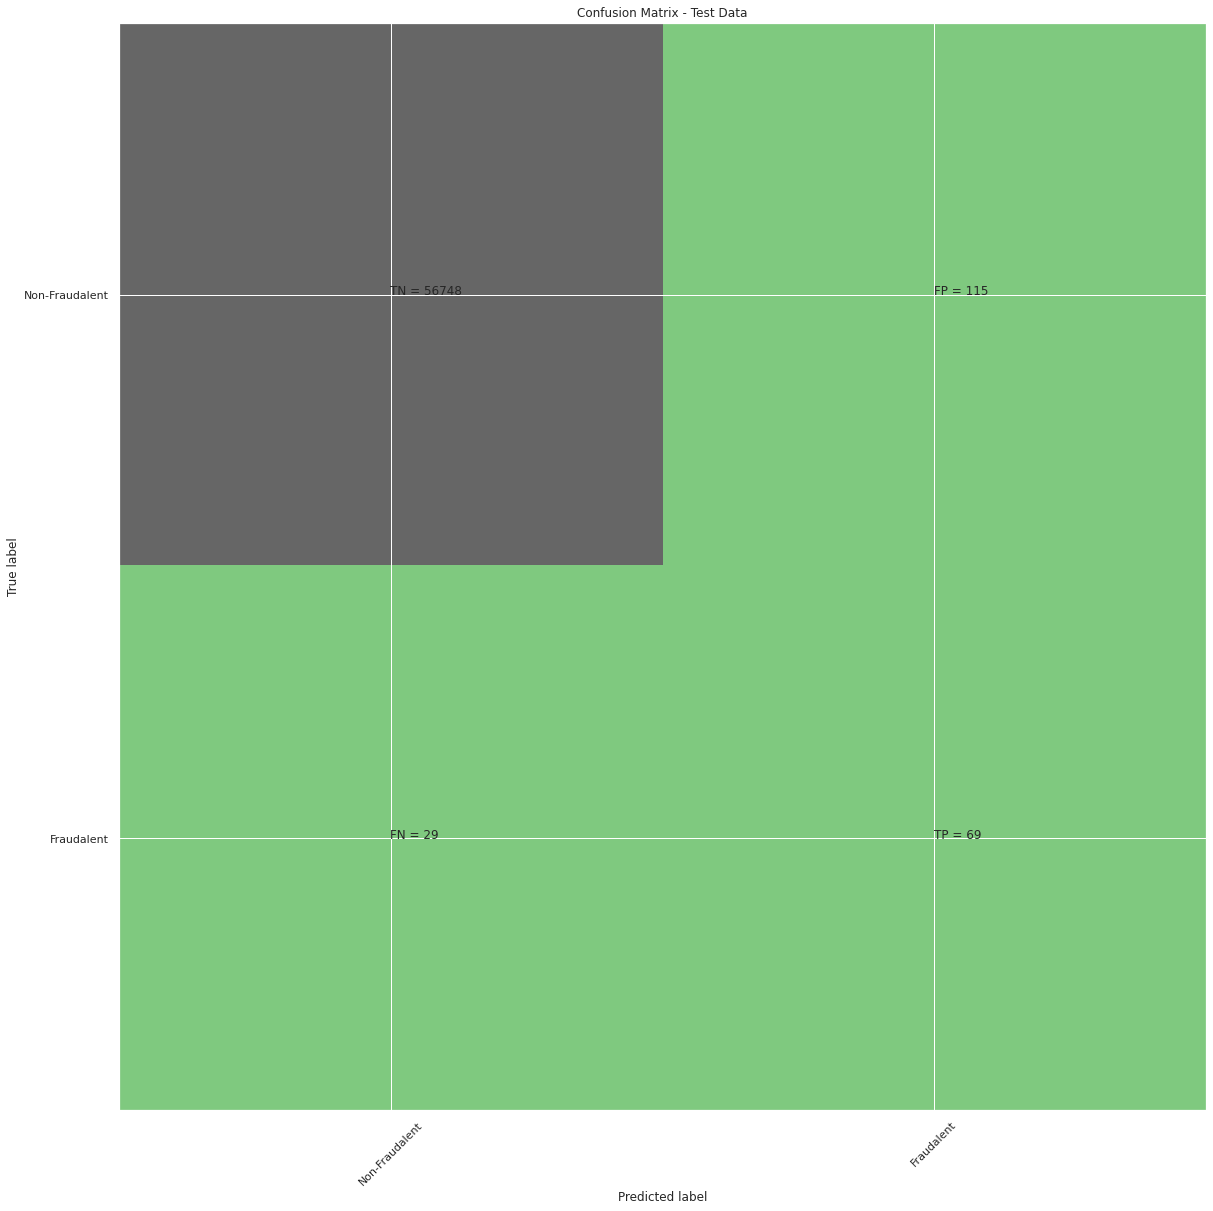

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.70      0.49        98

    accuracy                           1.00     56961
   macro avg       0.69      0.85      0.74     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.851029613962955
Tree threshold: 1.0
ROC for the test dataset 85.1%


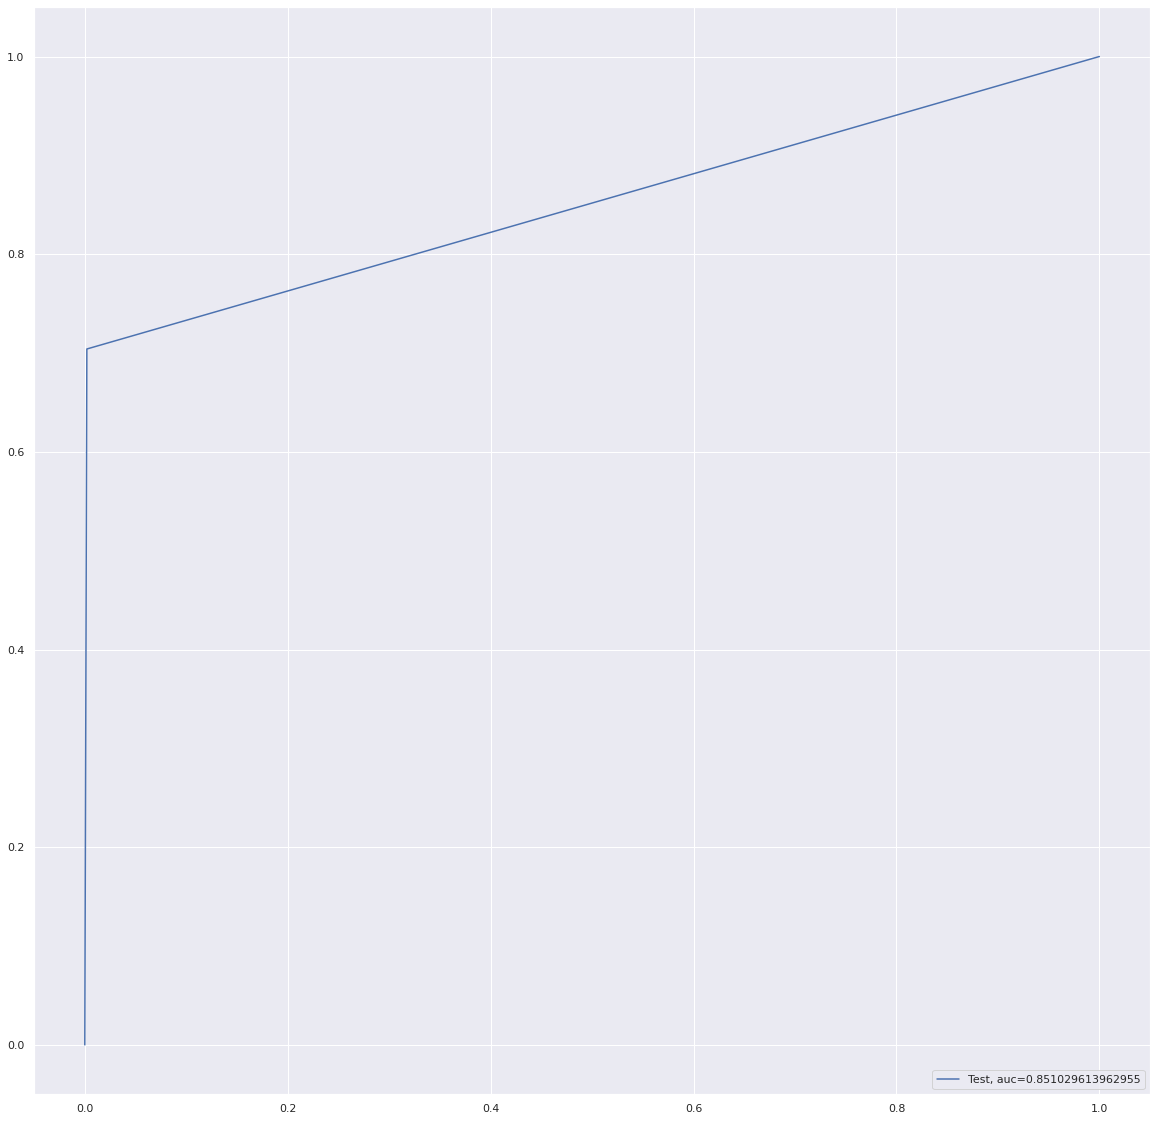

entropy score: 0.9929074278892576
Confusion Matrix


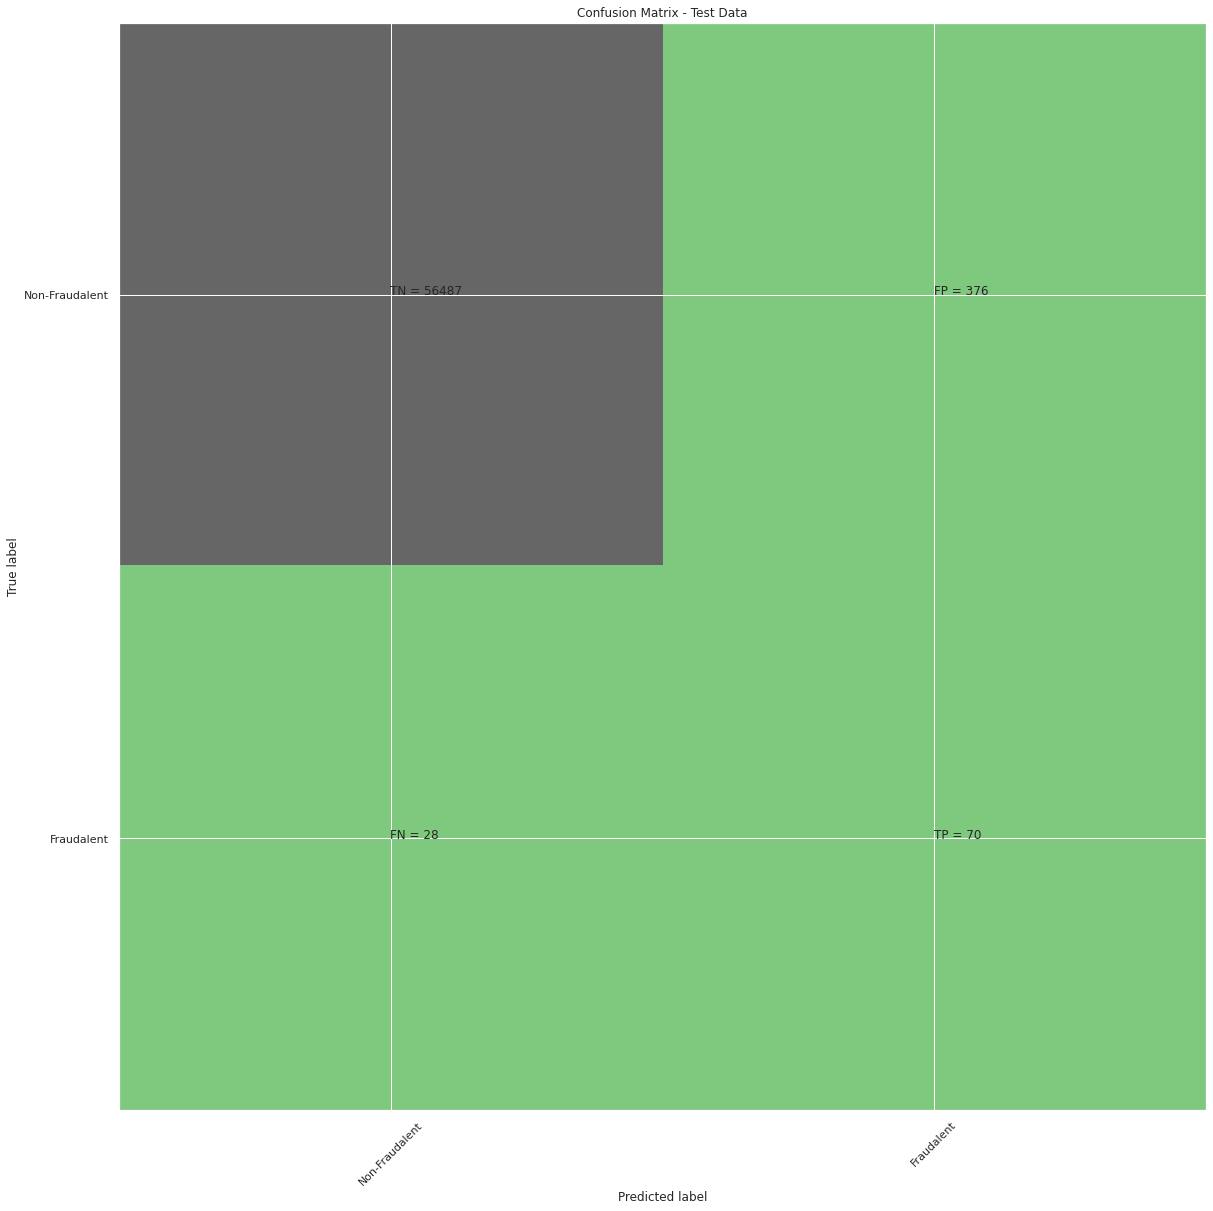

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.16      0.71      0.26        98

    accuracy                           0.99     56961
   macro avg       0.58      0.85      0.63     56961
weighted avg       1.00      0.99      1.00     56961

entropy tree_roc_value: 0.8538366650671664
Tree threshold: 1.0
ROC for the test dataset 85.4%


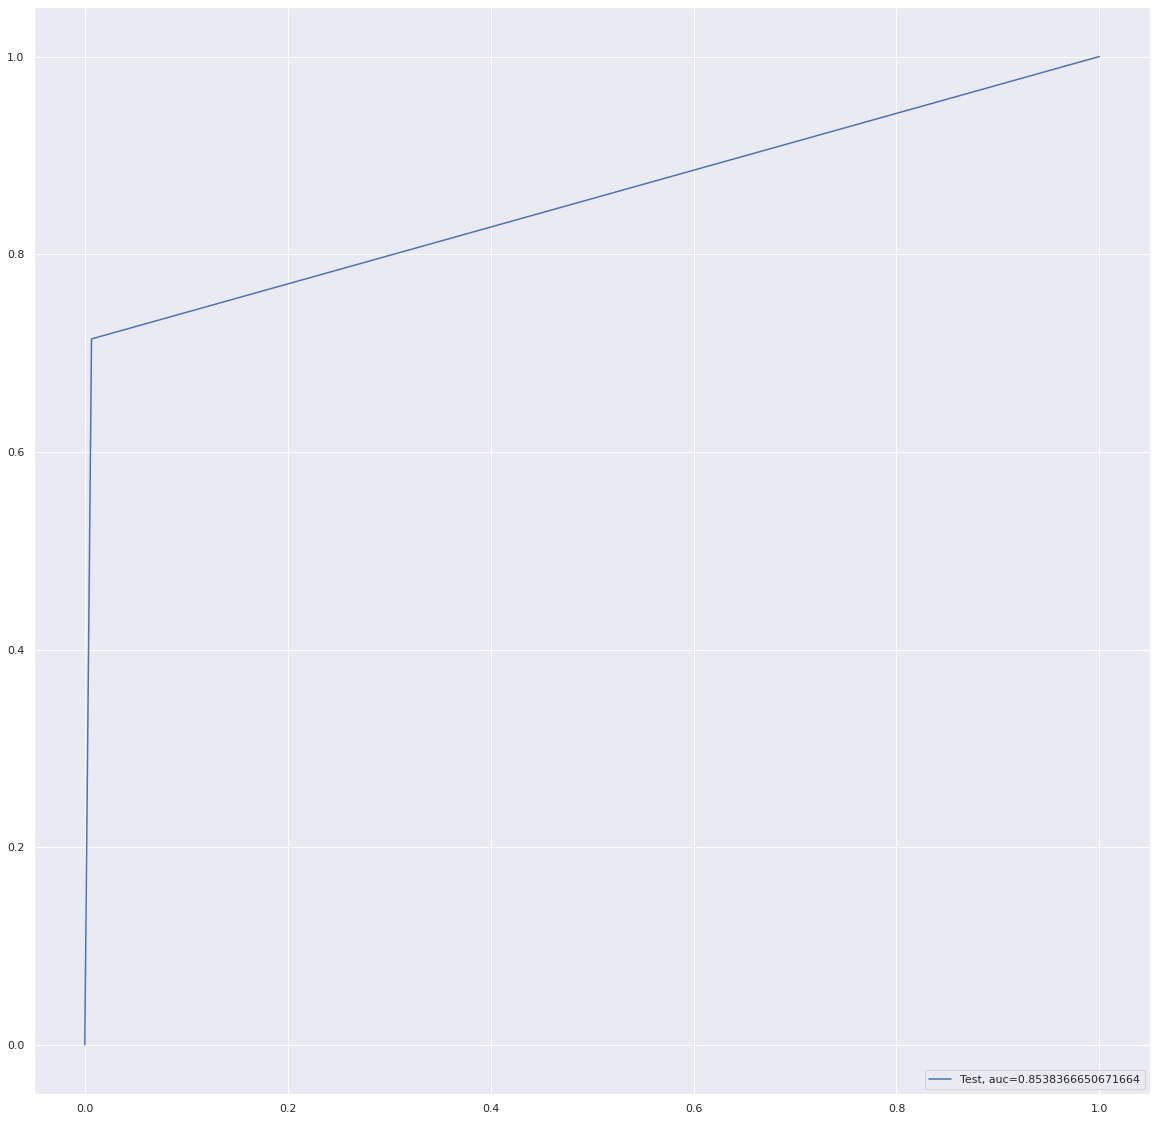

Time Taken by Model: --- 93.88786458969116 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


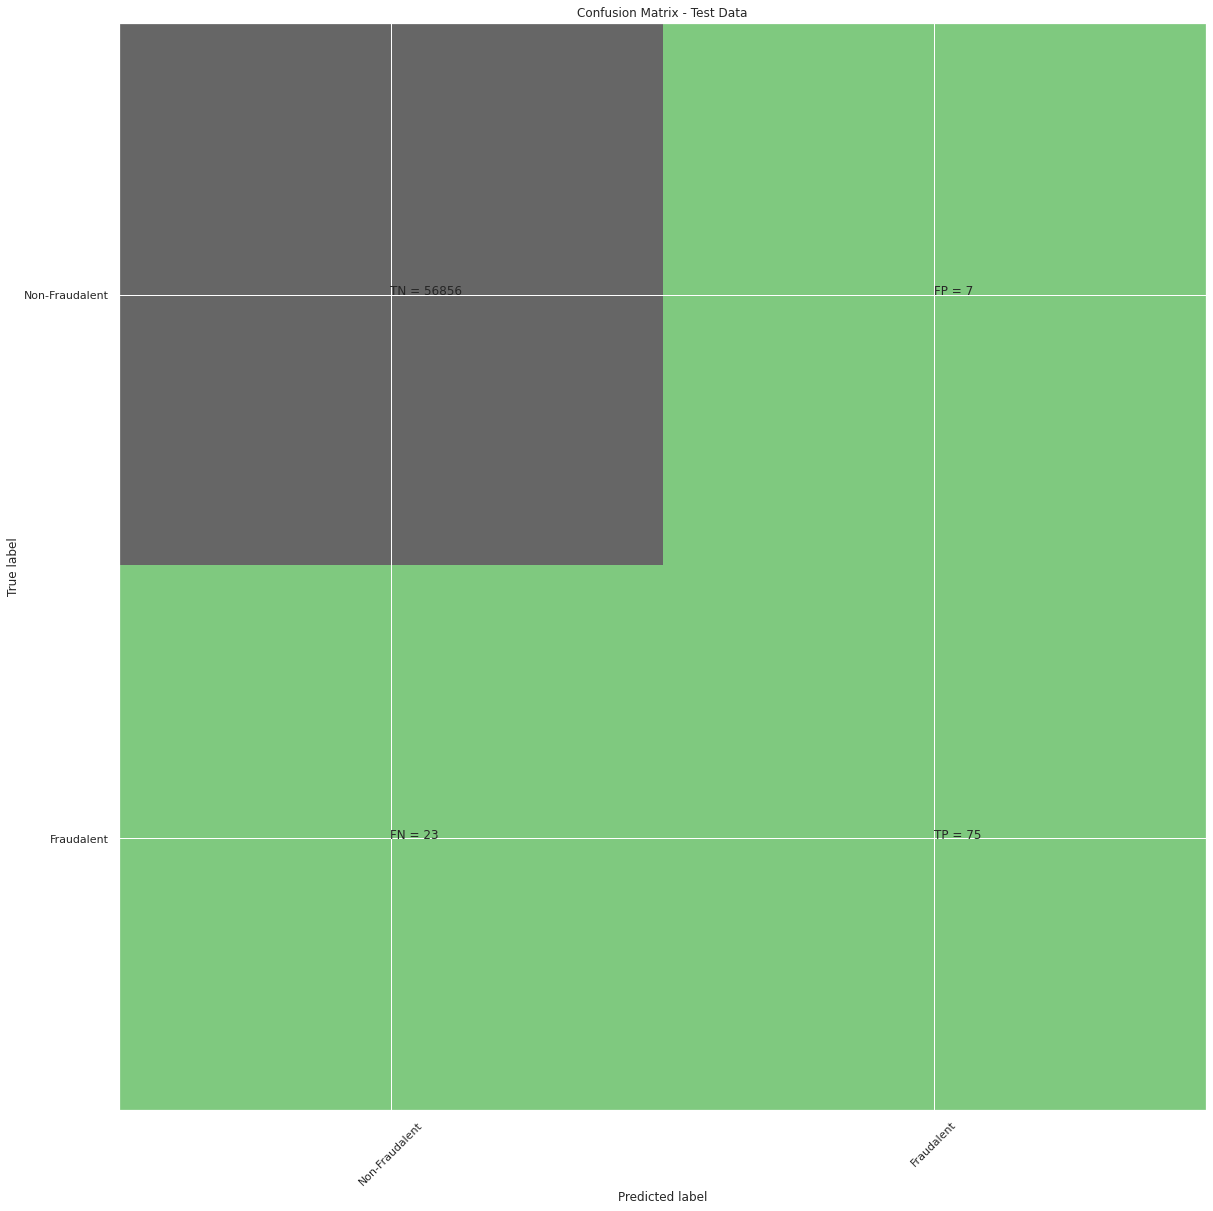

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9560013020912778
Random Forest threshold: 0.06
ROC for the test dataset 95.6%


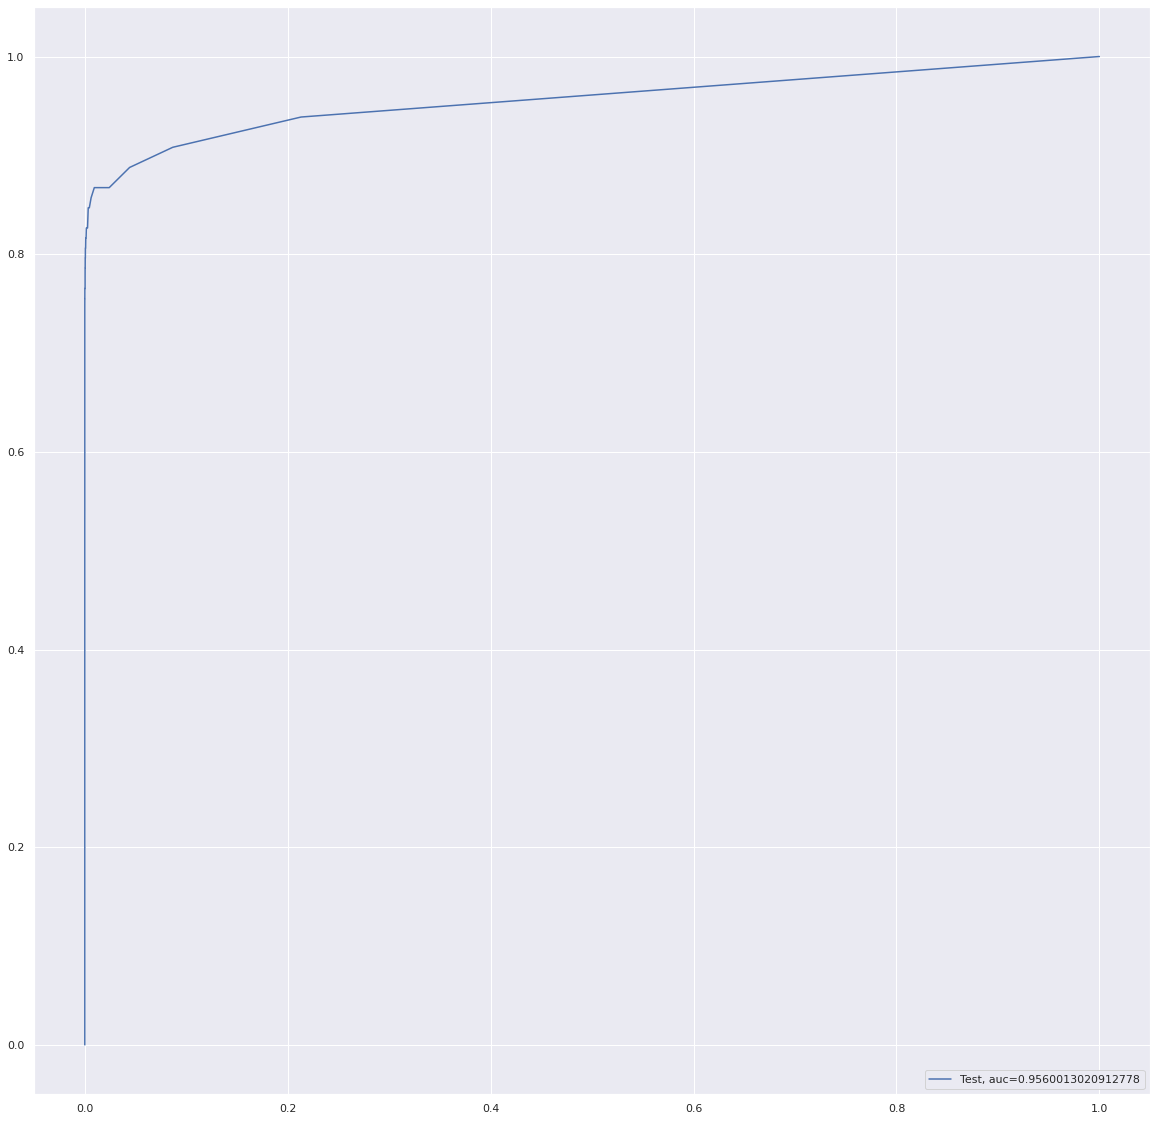

Time Taken by Model: --- 462.1285181045532 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9930303189901862
Confusion Matrix


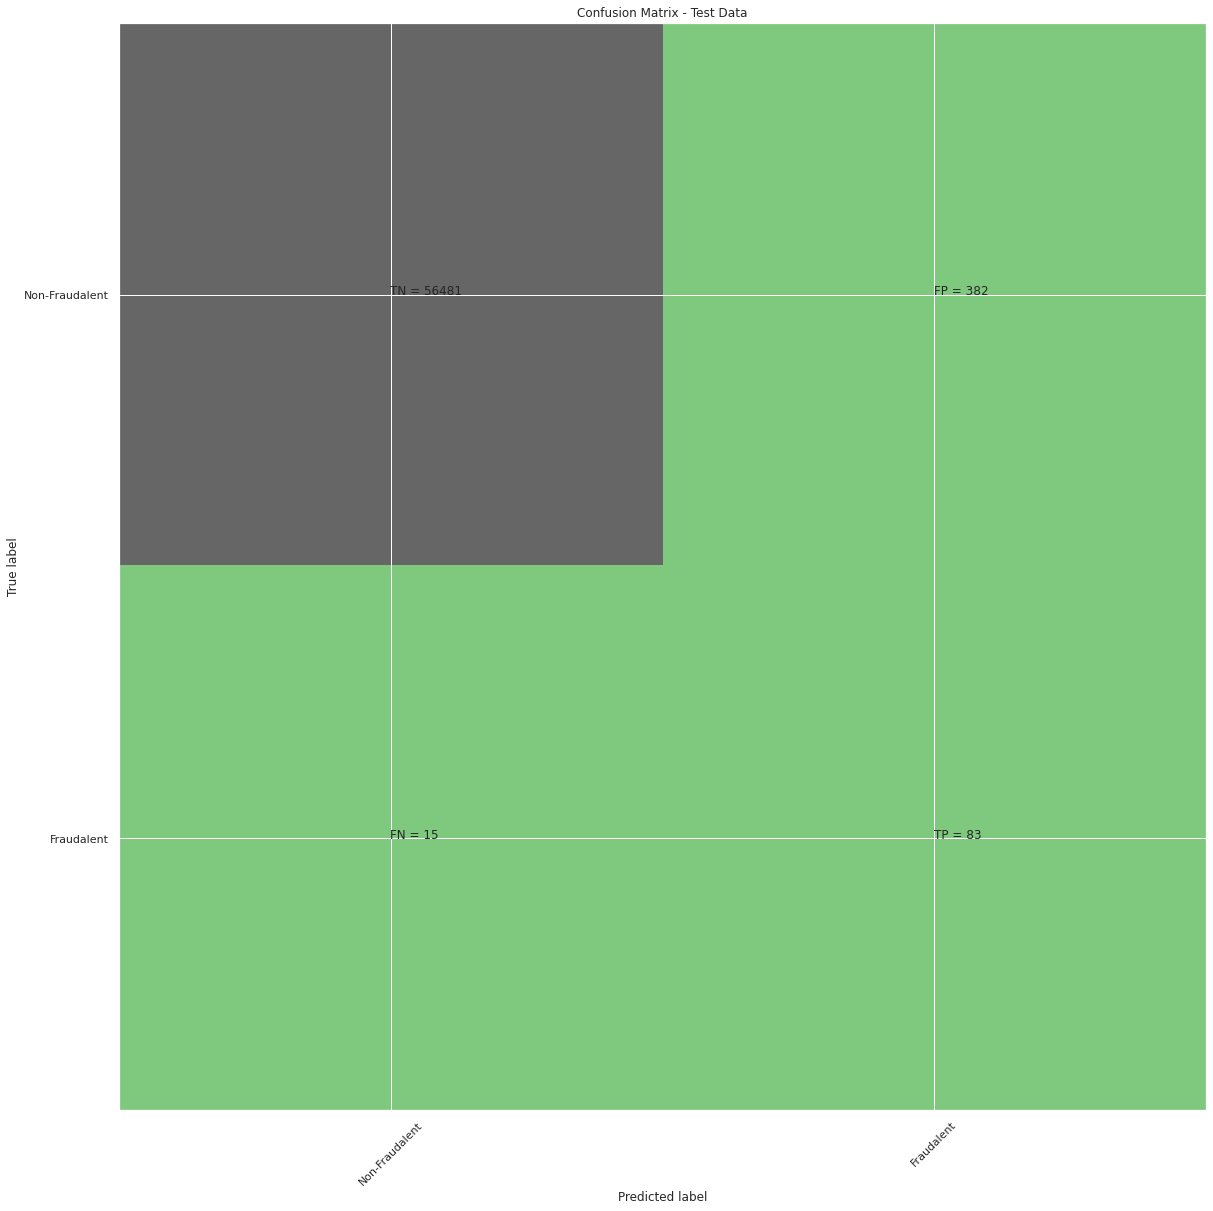

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.18      0.85      0.29        98

    accuracy                           0.99     56961
   macro avg       0.59      0.92      0.65     56961
weighted avg       1.00      0.99      1.00     56961

XGboost roc_value: 0.9781836903377147
XGBoost threshold: 0.2731809616088867
ROC for the test dataset 97.8%


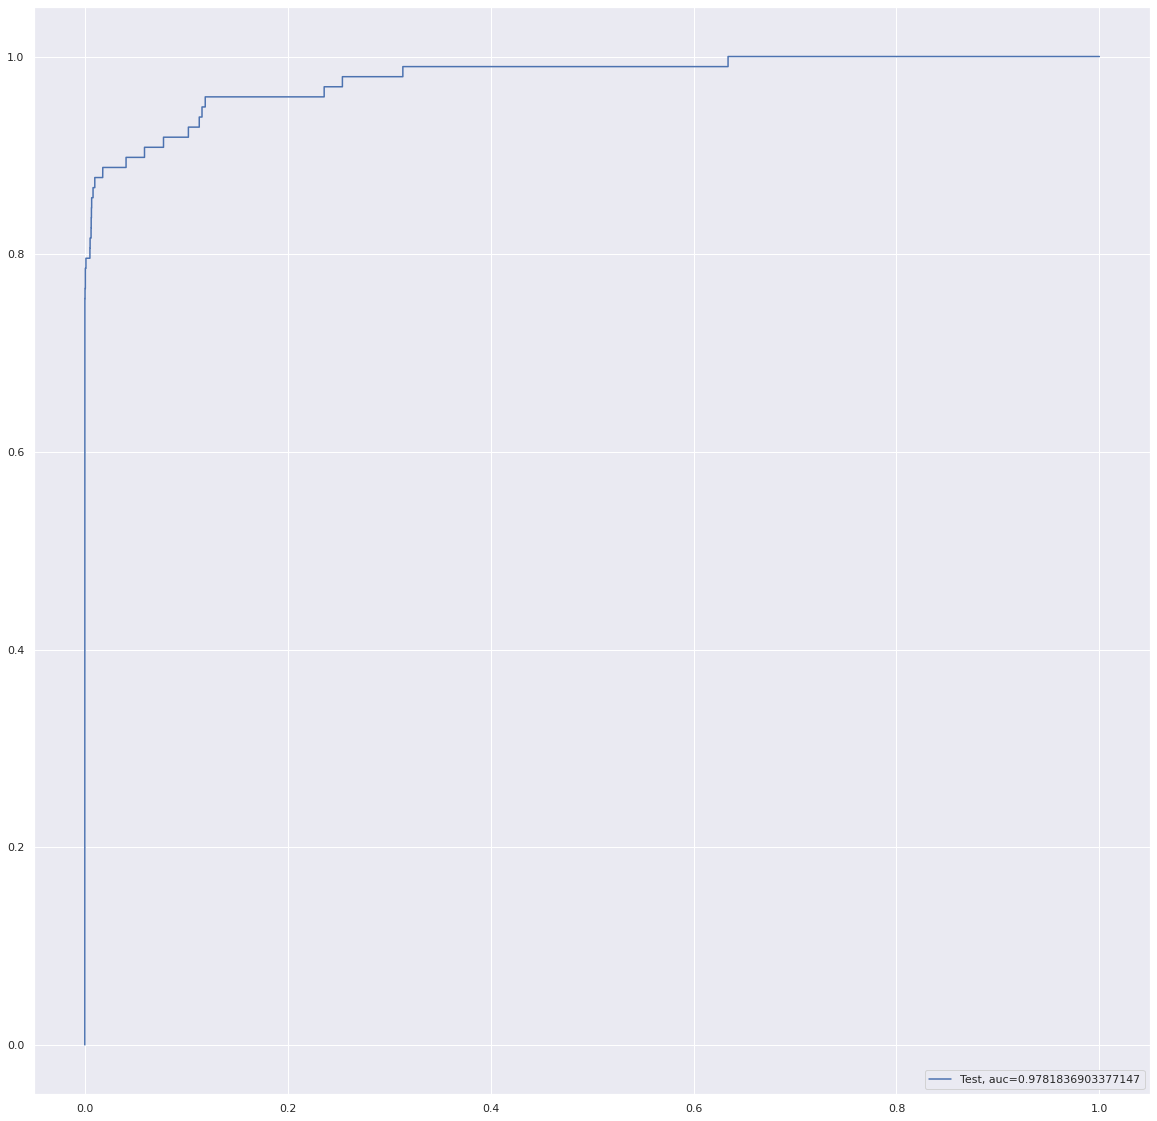

Time Taken by Model: --- 133.7407464981079 seconds ---
--------------------------------------------------------------------------------


In [79]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [80]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                              Power Transformer  ...  0.001289
1                              Power Transformer  ...  0.002676
2                              Power Transformer  ...  0.200000
3                              Power Transformer  ...  1.000000
4                              Power Transformer  ...  1.000000
5                              Power Transformer  ...  0.010000
6                              Power Transformer  ...  0.000756
7                              Power Transformer  ...  0.001412
8                 RepeatedKFold Cross Validation  ...  0.002034
9                 RepeatedKFold Cross Validation  ...  0.021679
10                RepeatedKFold Cross Validation  ...  0.200000
11                RepeatedKFold Cross Validation  ...  1.000000
12                RepeatedKFold Cross Validation  ...  1.000000
13                RepeatedKFold Cross Validation  ...  0.020000
14                RepeatedKFold Cross Validation  ...  0.002283
15                RepeatedKFold Cross Validation  ...  0.002846
16              StratifiedKFold Cross Validation  ...  0.001572
17              StratifiedKFold Cross Validation  ...  0.004244
18              StratifiedKFold Cross Validation  ...  0.200000
19              StratifiedKFold Cross Validation  ...  1.000000
20              StratifiedKFold Cross Validation  ...  1.000000
21              StratifiedKFold Cross Validation  ...  0.010000
22              StratifiedKFold Cross Validation  ...  0.002443
23              StratifiedKFold Cross Validation  ...  0.002763
24                          Random Undersampling  ...  0.155538
25                          Random Undersampling  ...  1.500000
26                          Random Undersampling  ...  0.400000
27                          Random Undersampling  ...  1.000000
28                          Random Undersampling  ...  1.000000
29                          Random Undersampling  ...  0.230000
30                          Random Undersampling  ...  0.137913
31                          Random Undersampling  ...  0.344047
32  Random Oversampling with StratifiedKFold CV   ...  0.418756
33  Random Oversampling with StratifiedKFold CV   ...  1.500000
34  Random Oversampling with StratifiedKFold CV   ...  0.200000
35  Random Oversampling with StratifiedKFold CV   ...  1.000000
36  Random Oversampling with StratifiedKFold CV   ...  1.000000
37  Random Oversampling with StratifiedKFold CV   ...  0.010000
38  Random Oversampling with StratifiedKFold CV   ...  0.218462
39   SMOTE Oversampling with StratifiedKFold CV   ...  0.446513
40   SMOTE Oversampling with StratifiedKFold CV   ...  1.500000
41   SMOTE Oversampling with StratifiedKFold CV   ...  0.400000
42   SMOTE Oversampling with StratifiedKFold CV   ...  1.000000
43   SMOTE Oversampling with StratifiedKFold CV   ...  1.000000
44   SMOTE Oversampling with StratifiedKFold CV   ...  0.060000
45   SMOTE Oversampling with StratifiedKFold CV   ...  0.273181

[46 rows x 5 columns]

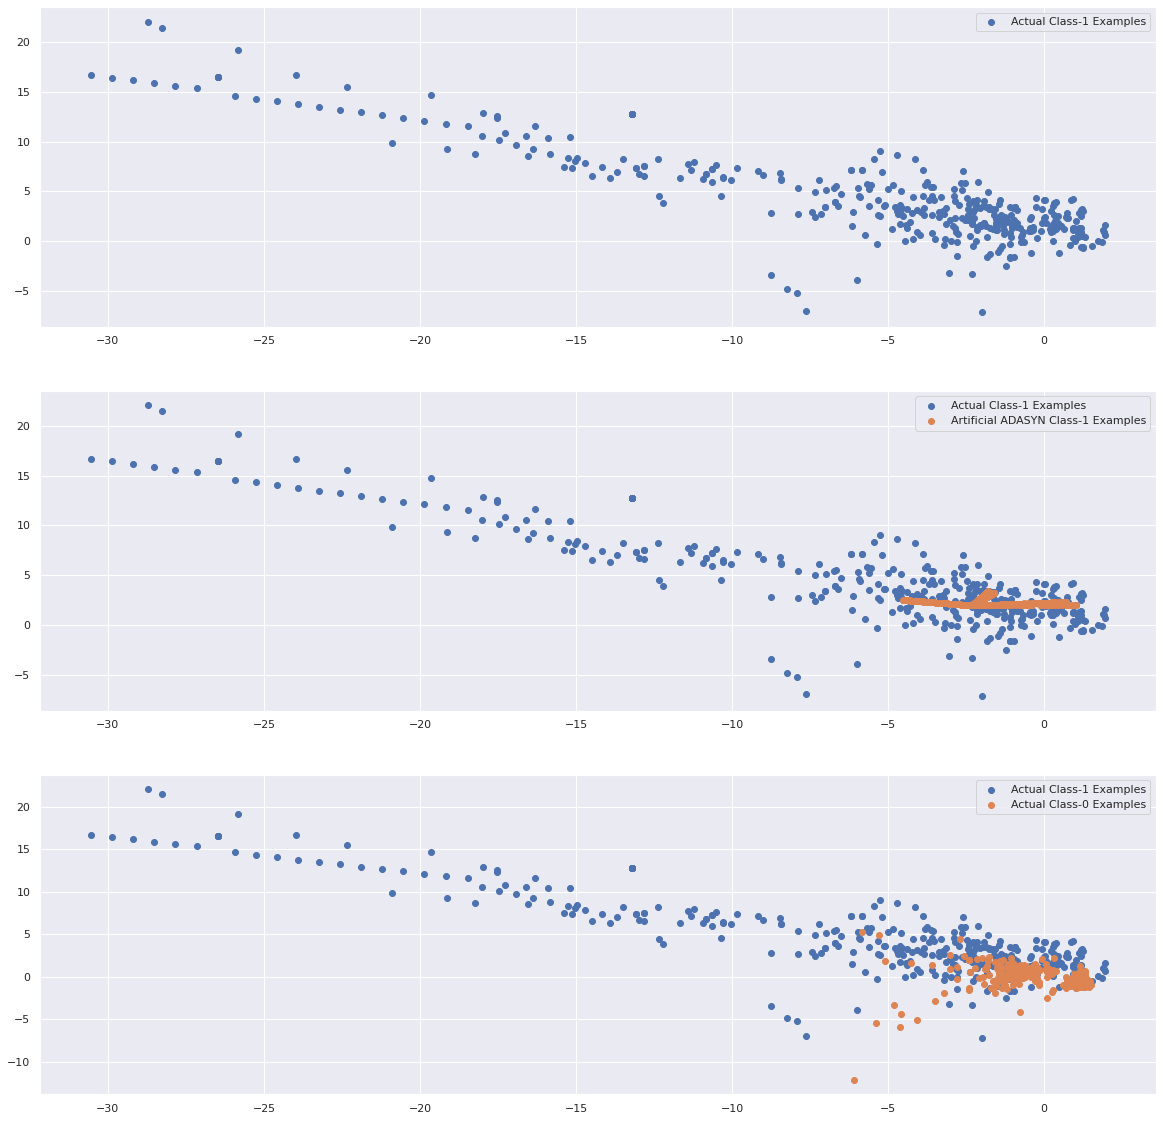

In [81]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()



In [82]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9837840660615444
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.99475694  1.03878254  0.86029065  0.95486014  0.78802596 -1.17967891
  -0.92028866 -0.58460255 -0.33913375 -0.90209249  0.80084456 -1.49791971
  -0.14143533 -1.97508885  0.13211643 -0.99838675 -1.12458423 -0.50063848
   0.37627617 -1.40540196 -0.18299976  0.72643804  0.65691607 -1.0810221
   0.69672709  0.19659139  0.13823625  1.28863051  0.01273517  0.04684478]]
[-5.43803168]
{1: array([[0.61021517, 0.63159046, 0.72080484, 0.87495728, 0.96155708,
        0.97622445, 0.97996651, 0.98264108, 0.98381172, 0.98416673,
        0.98422403, 0.98422403, 0.98422403, 0.98422403, 0.98422403,
        0.98422403, 0.98422403, 0.98422403, 0.98422403, 0.98422403],
       [0.61045493, 0.63159708, 0.71938814, 0.87086492, 0.9587103 ,
        0.97444715, 0.97873341, 0.98183995, 0.98311026, 0.98345997,
        0.9835193 , 0.9835193 , 0.9835193 , 0.9835193 ,

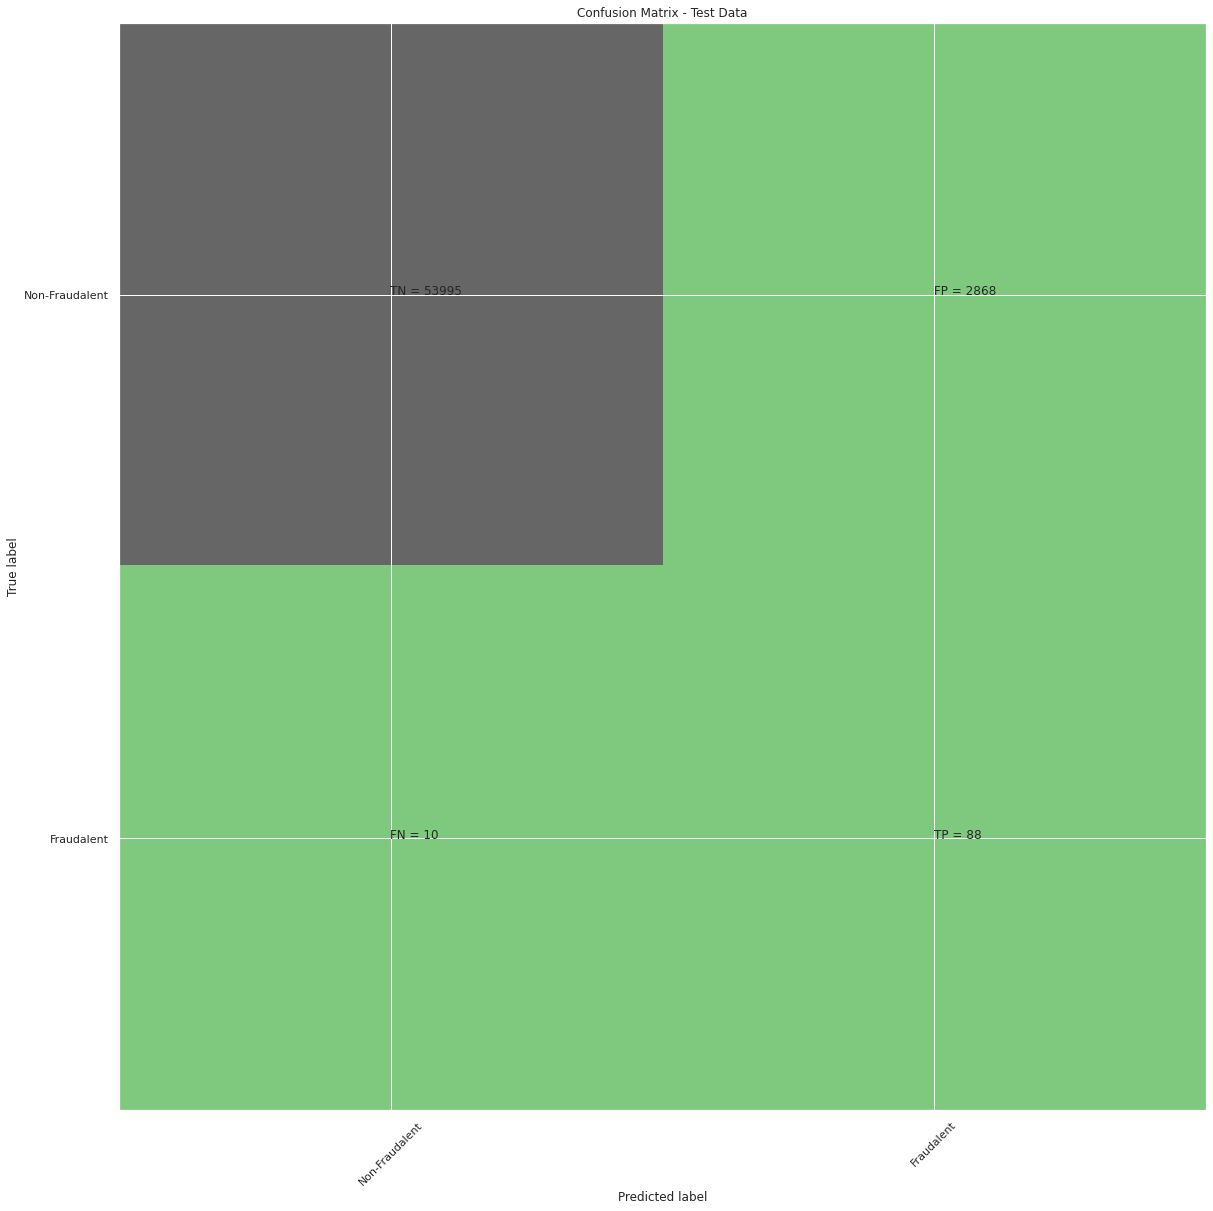

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56863
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56961
   macro avg       0.51      0.92      0.52     56961
weighted avg       1.00      0.95      0.97     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


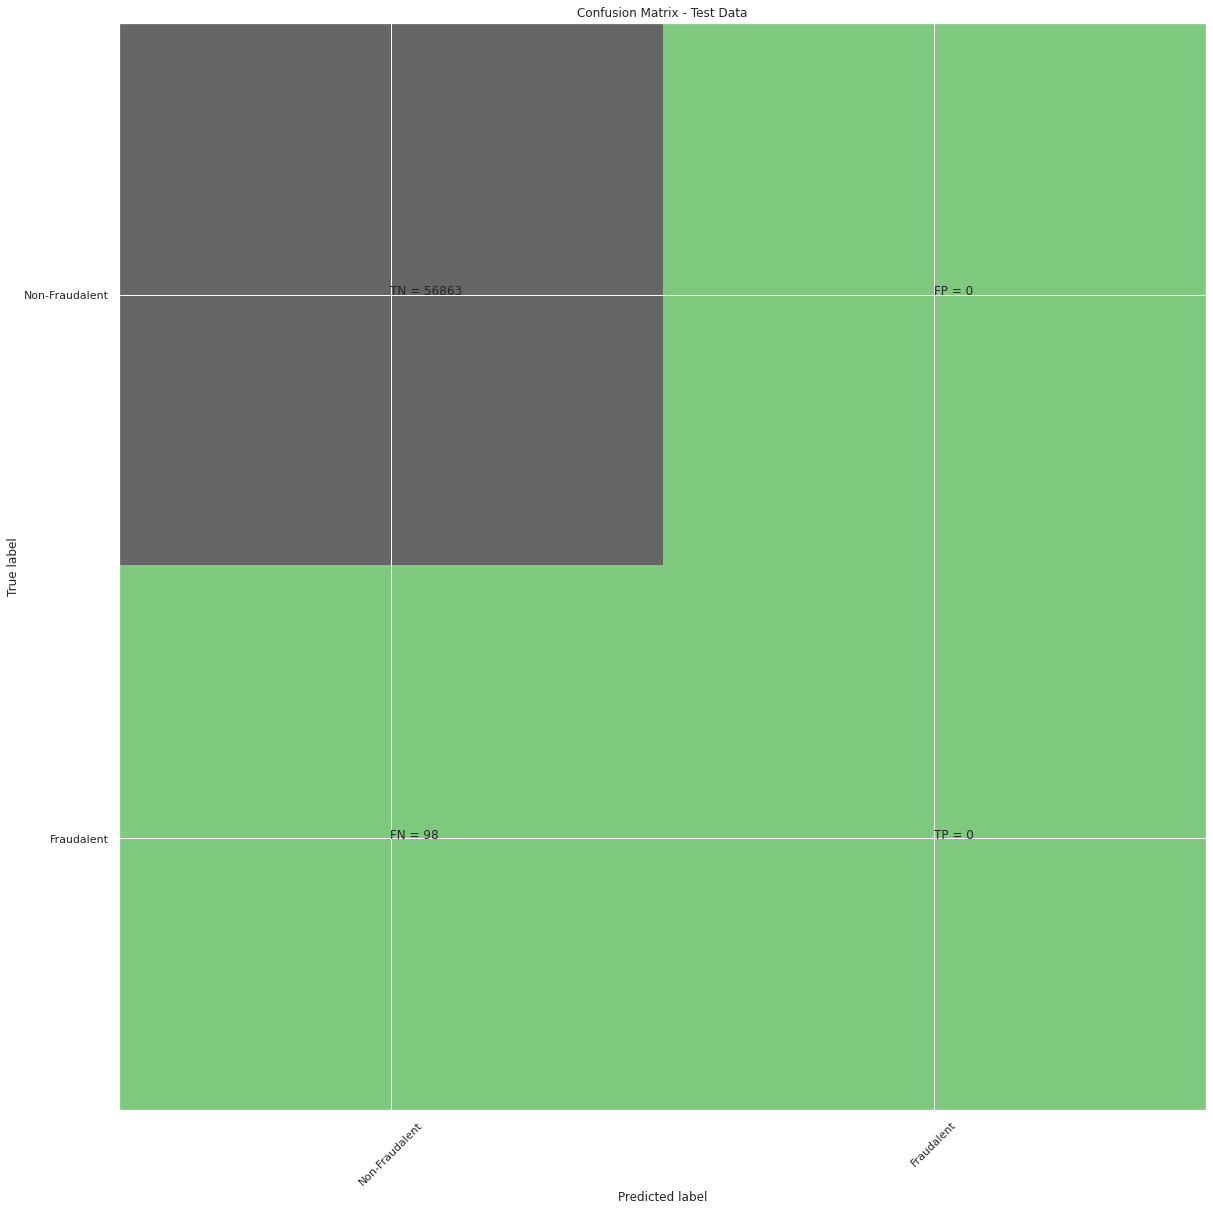

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.974377998389972
l2 threshold: 0.6510991200170017
ROC for the test dataset 97.4%


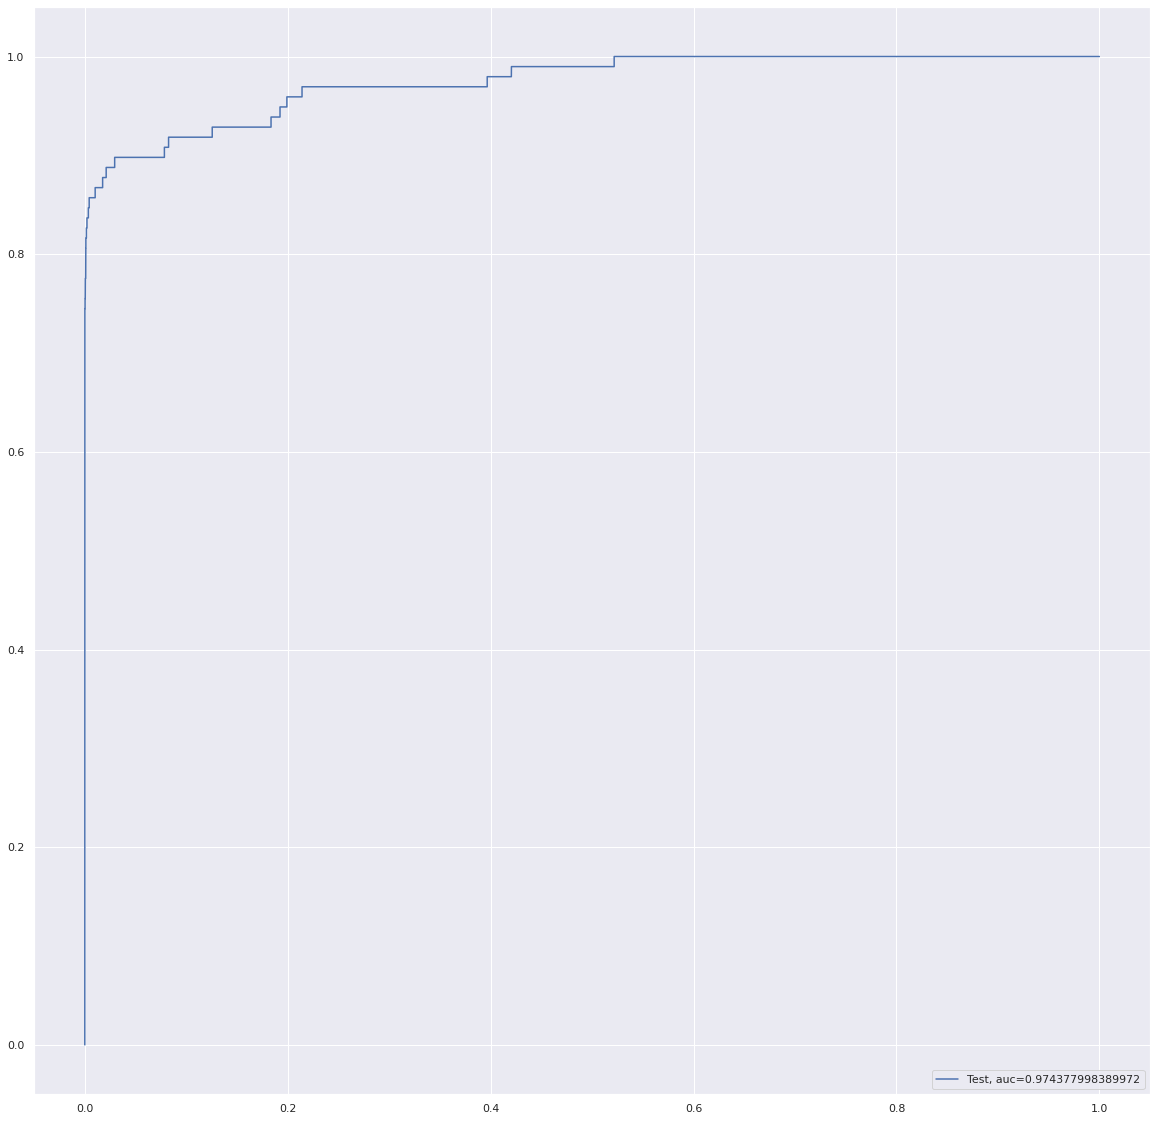

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


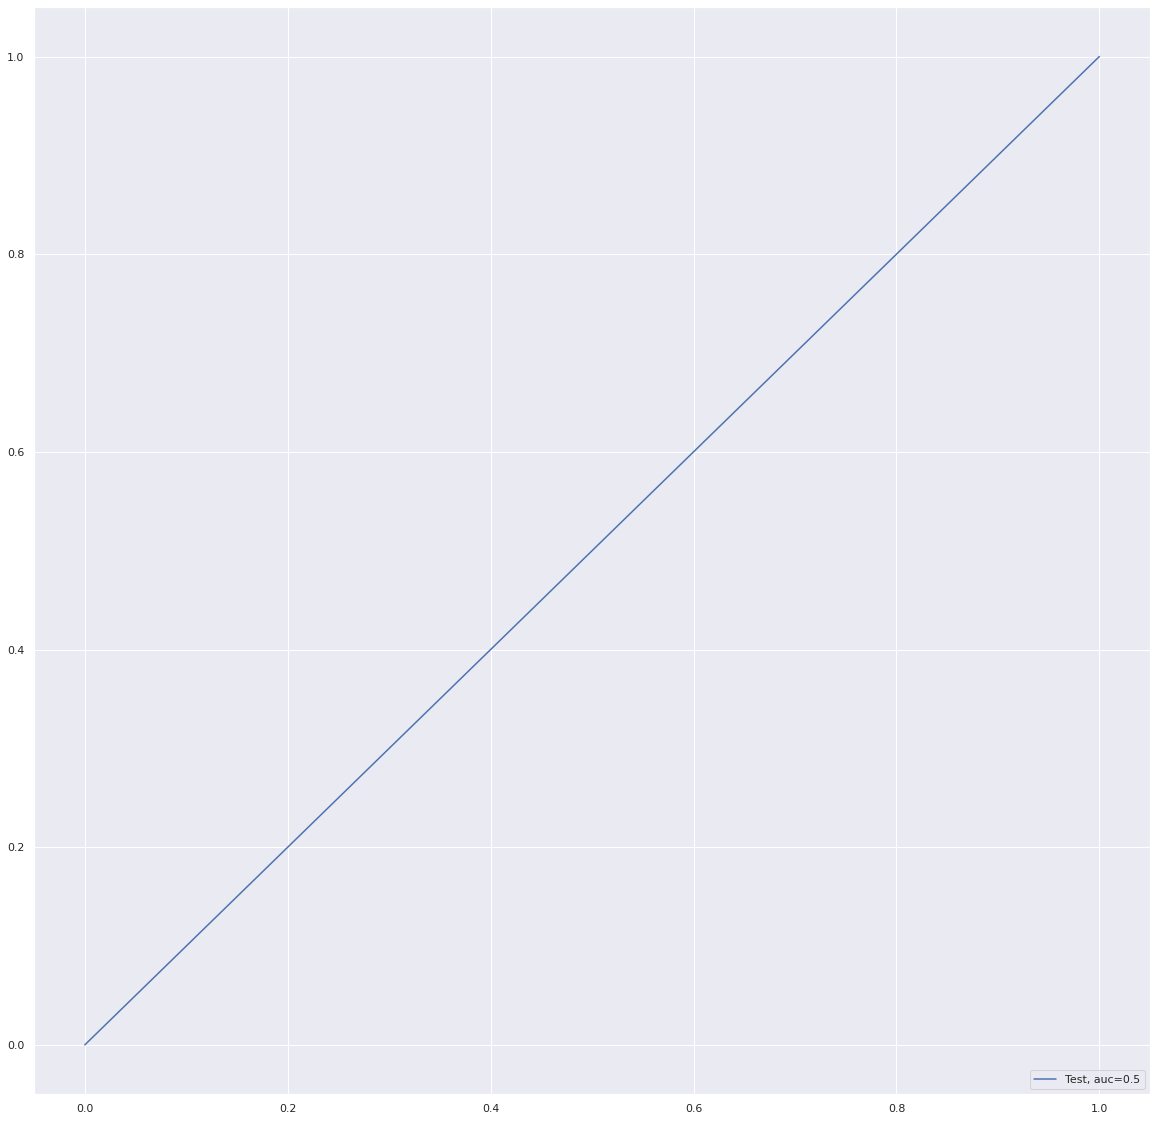

Time Taken by Model: --- 712.9453563690186 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9942943417425958
Confusion Matrix


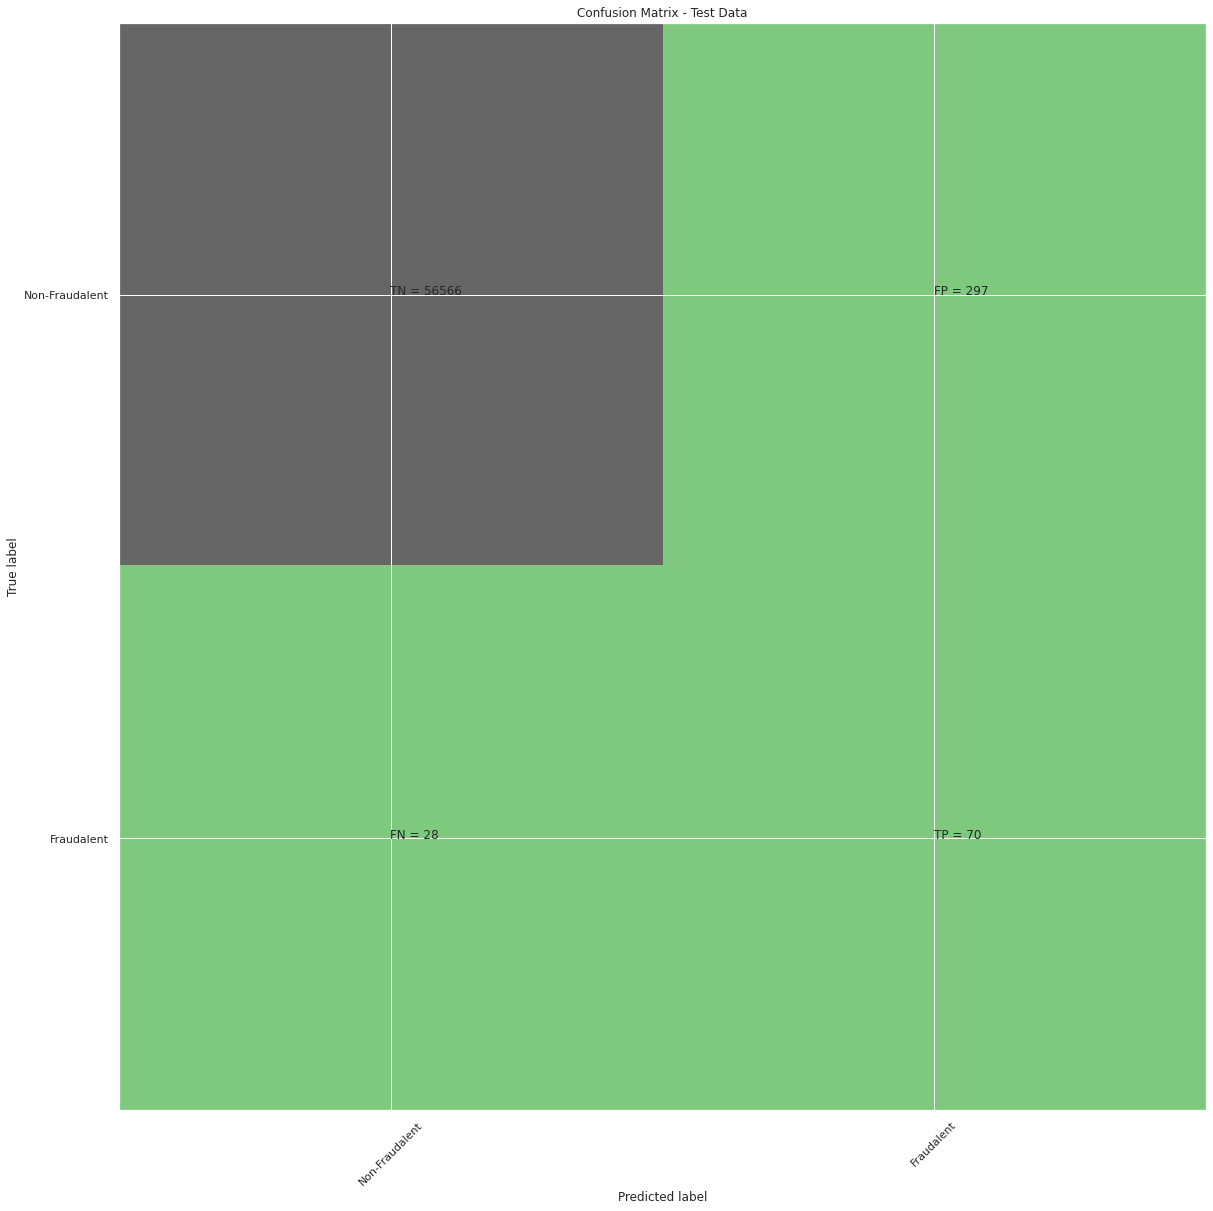

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.71      0.30        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601572630529446
KNN threshold: 0.4
ROC for the test dataset 86.0%


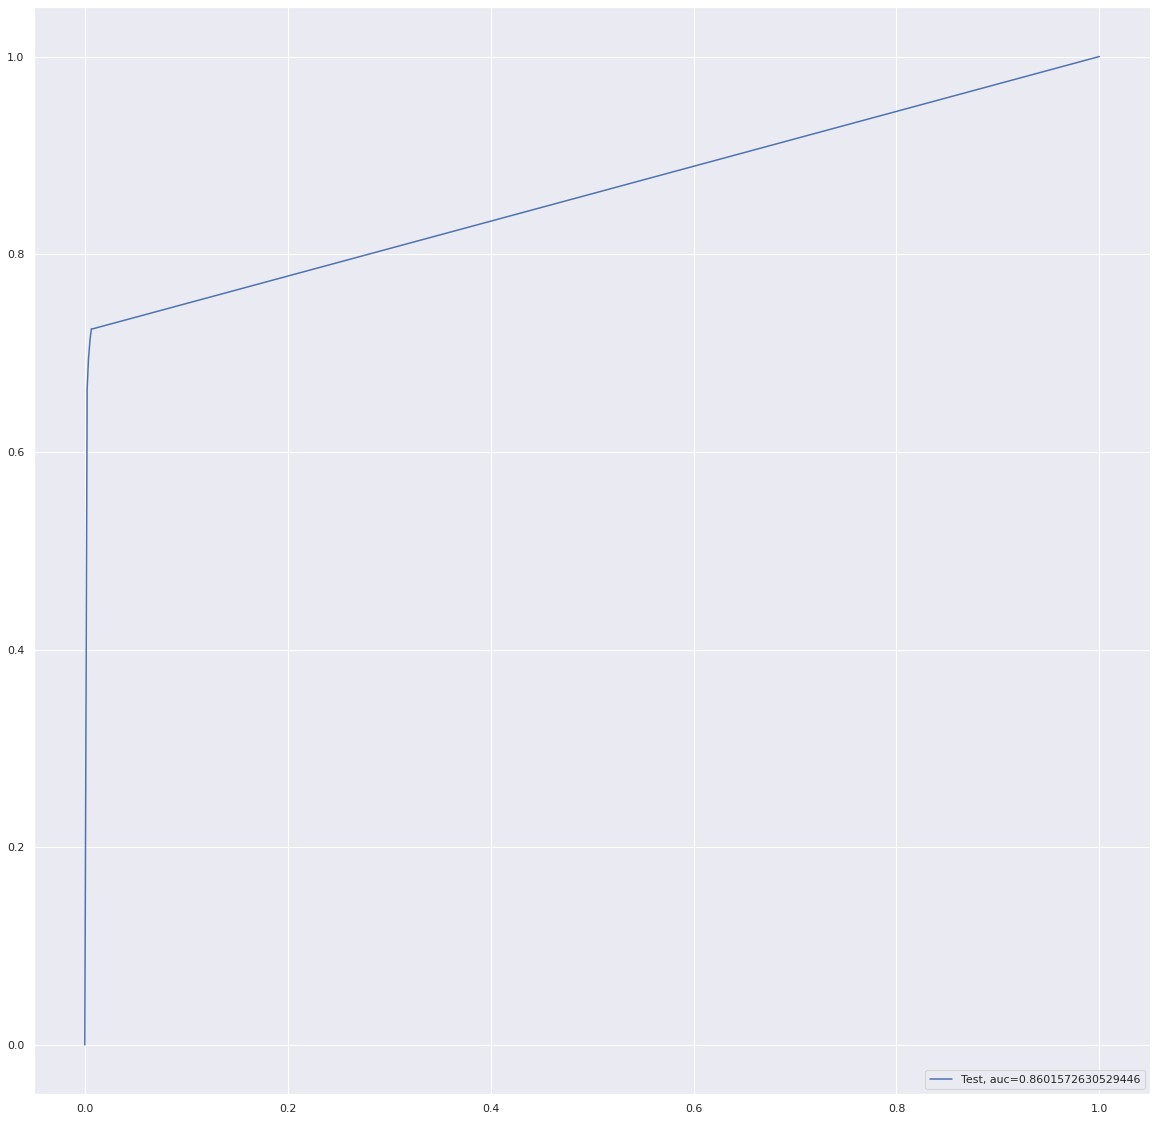

Time Taken by Model: --- 174.66948080062866 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9968750548620986
Confusion Matrix


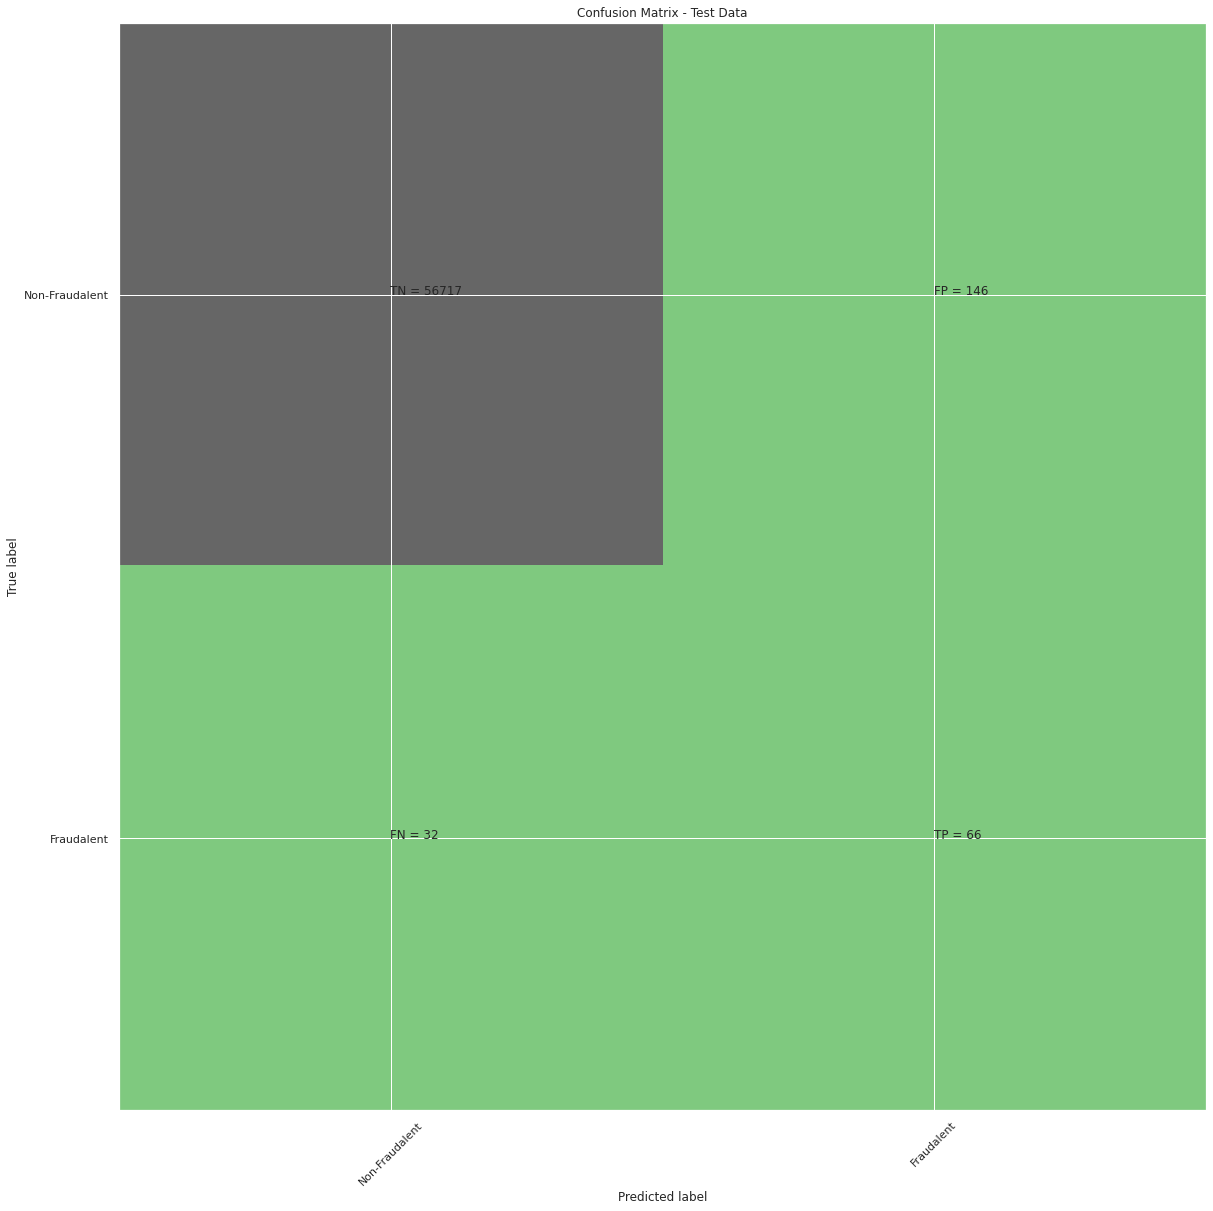

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.31      0.67      0.43        98

    accuracy                           1.00     56961
   macro avg       0.66      0.84      0.71     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8354509065290115
Tree threshold: 1.0
ROC for the test dataset 83.5%


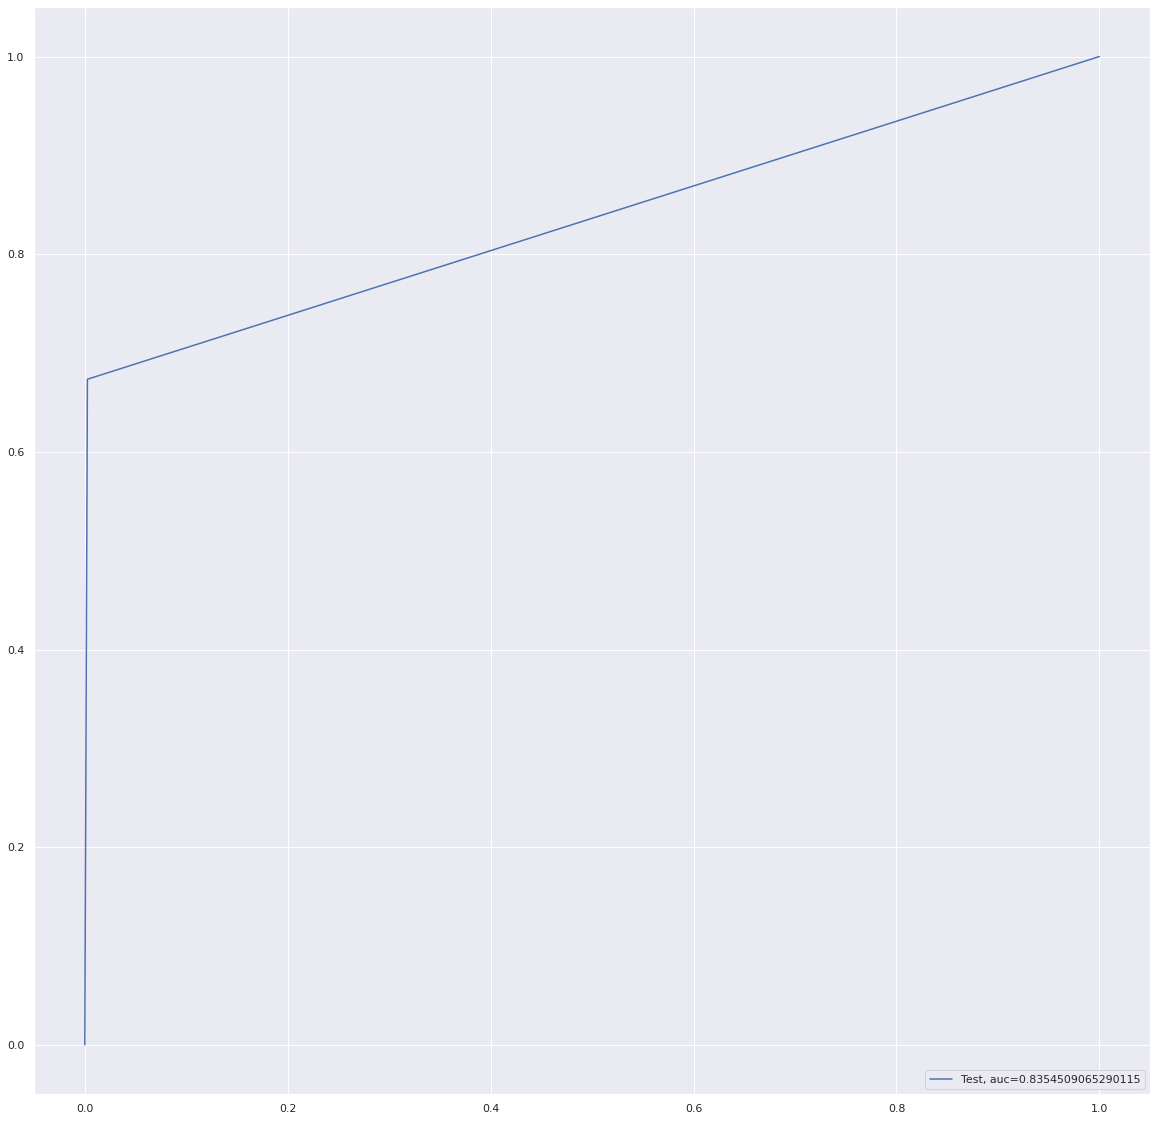

entropy score: 0.997910851284212
Confusion Matrix


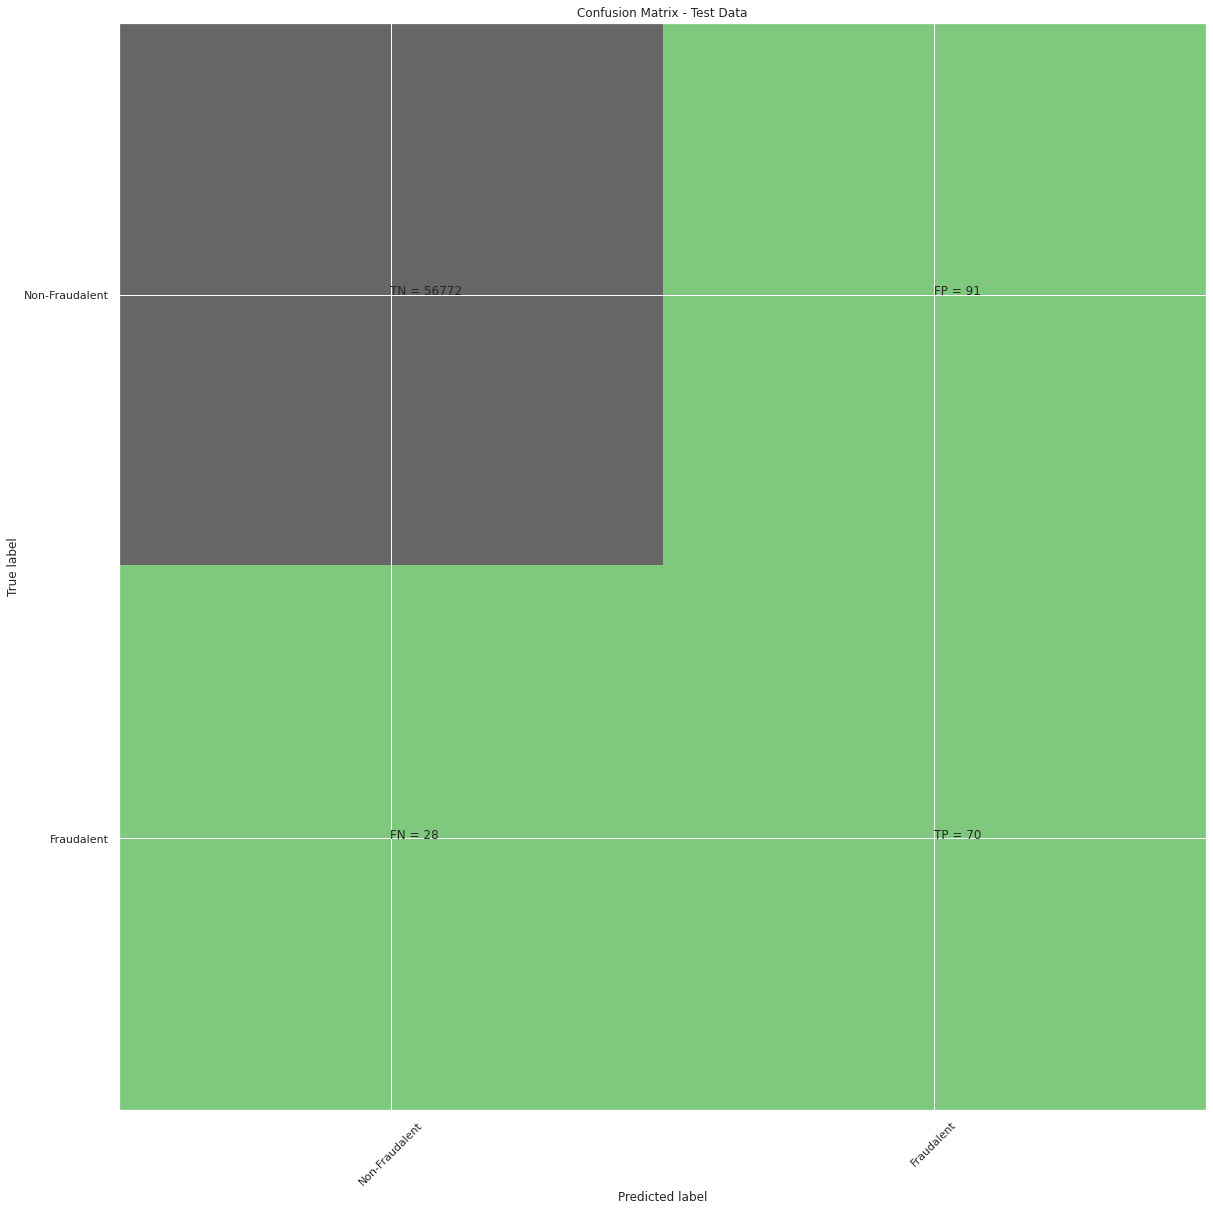

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.71      0.54        98

    accuracy                           1.00     56961
   macro avg       0.72      0.86      0.77     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8563426883160278
Tree threshold: 1.0
ROC for the test dataset 85.6%


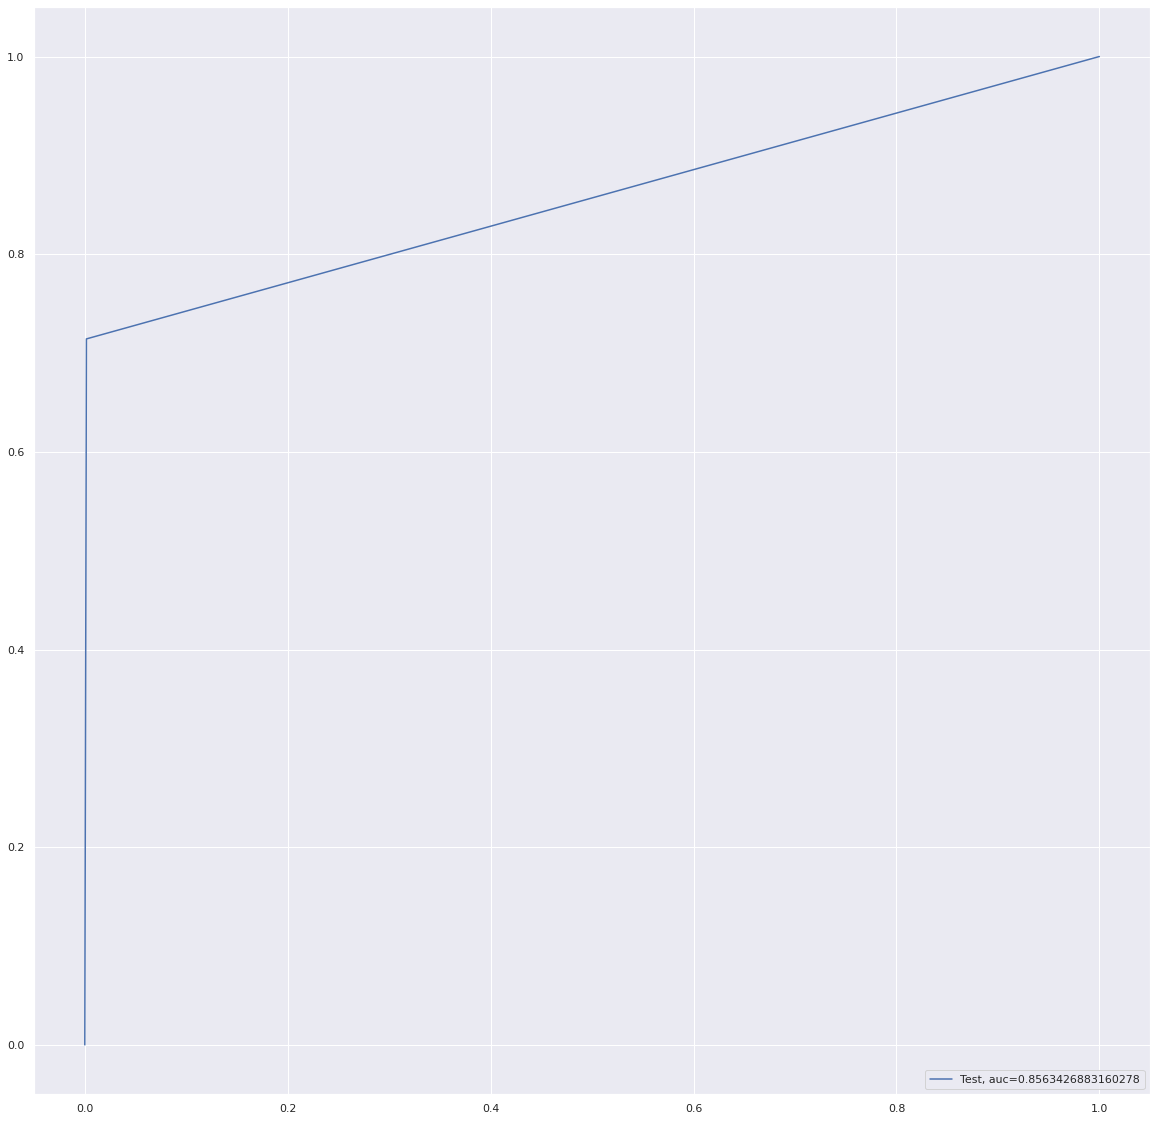

Time Taken by Model: --- 90.53513479232788 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


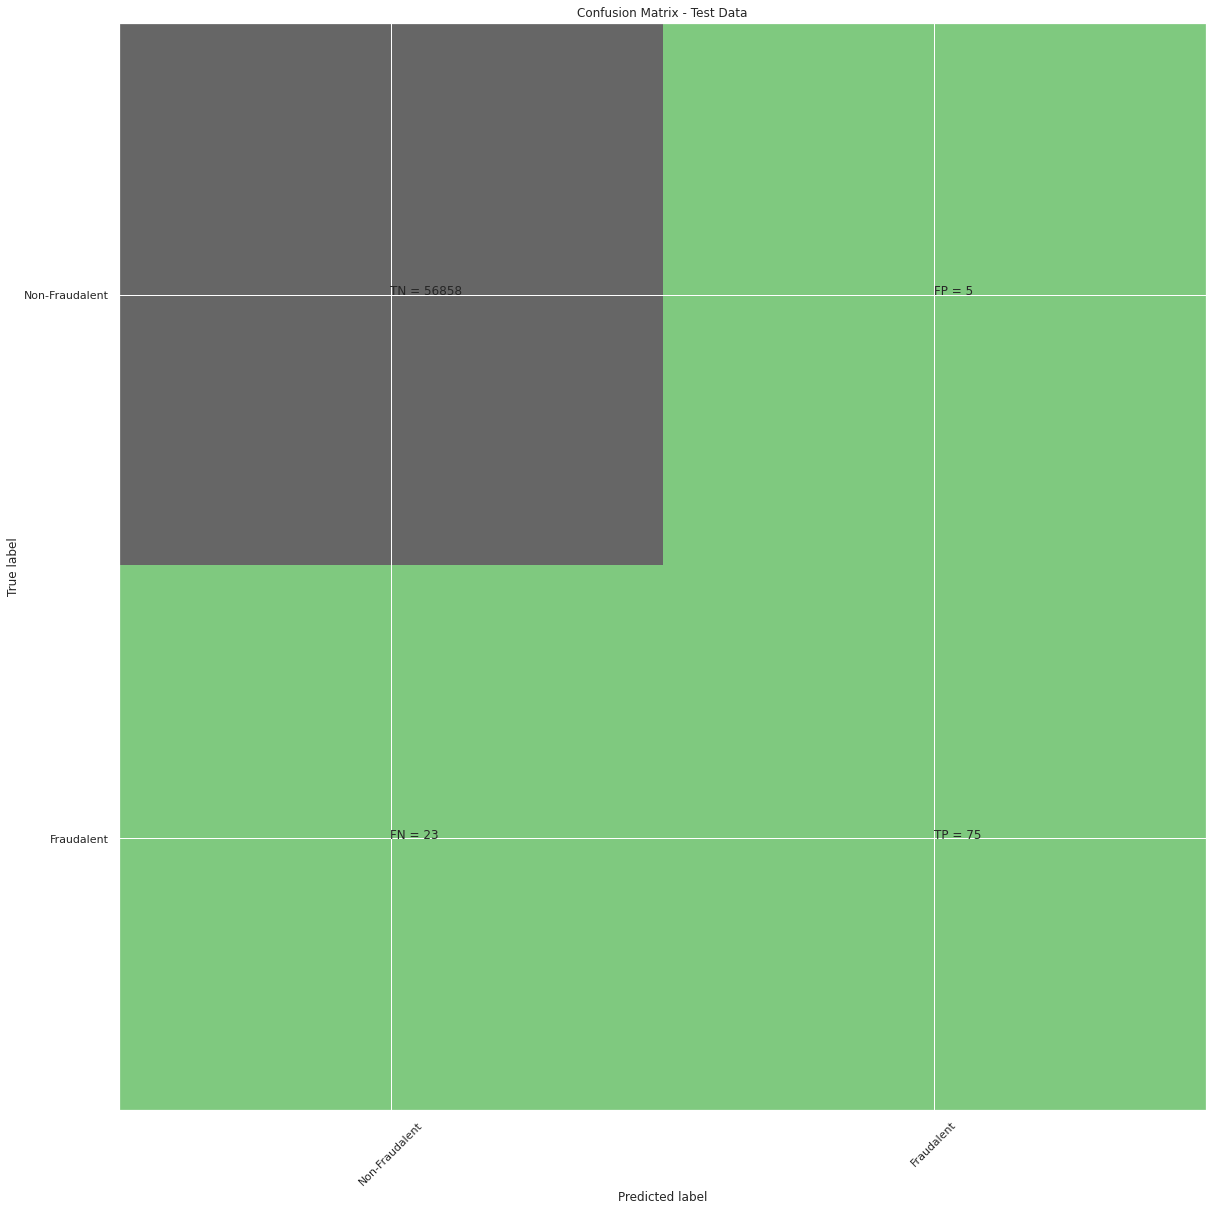

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9696085686793929
Random Forest threshold: 0.04
ROC for the test dataset 97.0%


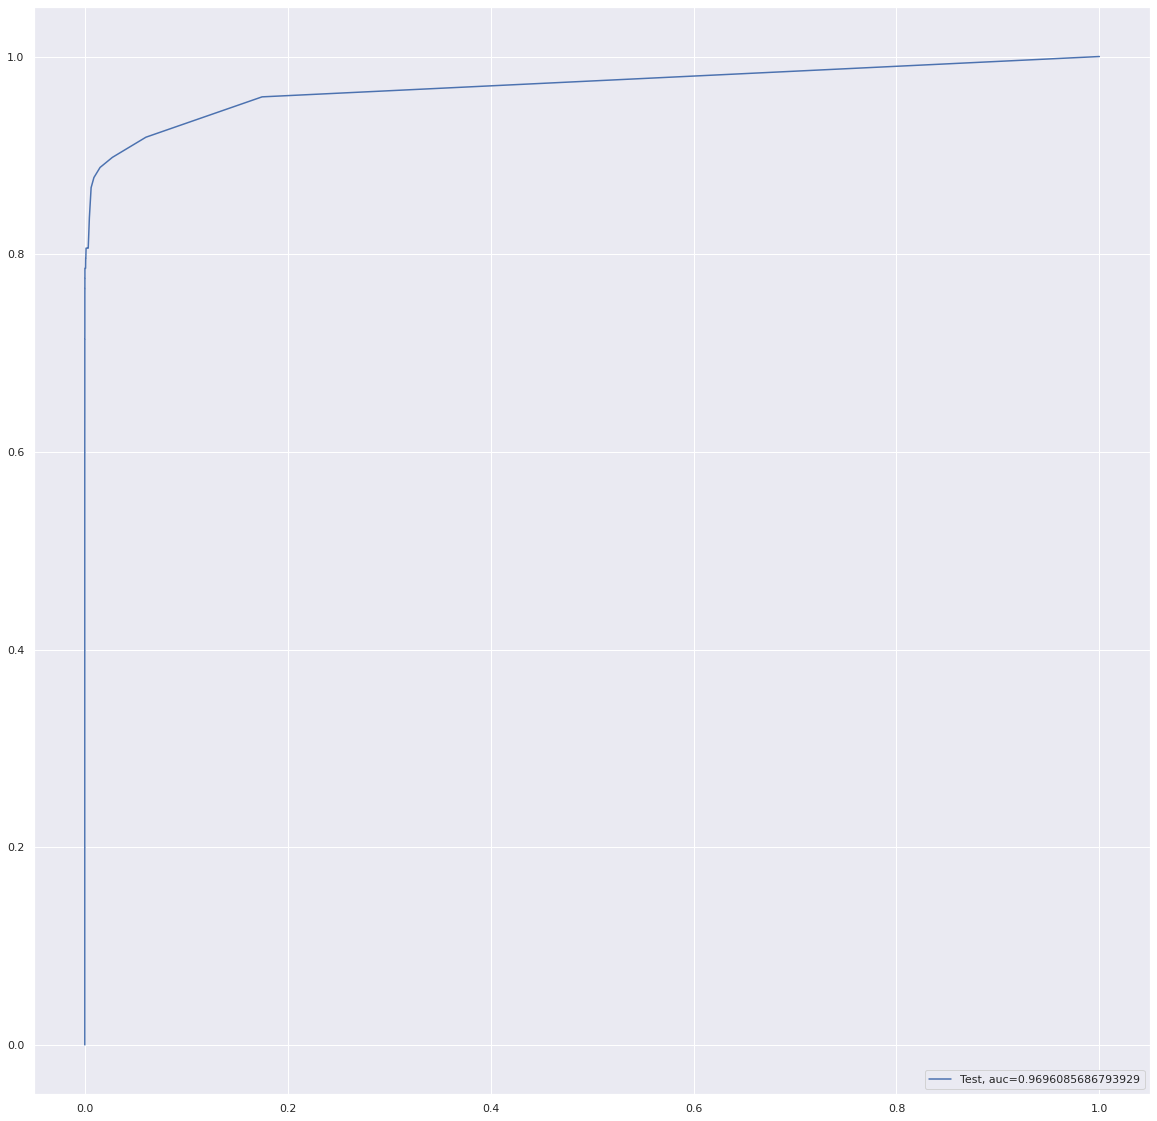

Time Taken by Model: --- 446.1886670589447 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9830410280718386
Confusion Matrix


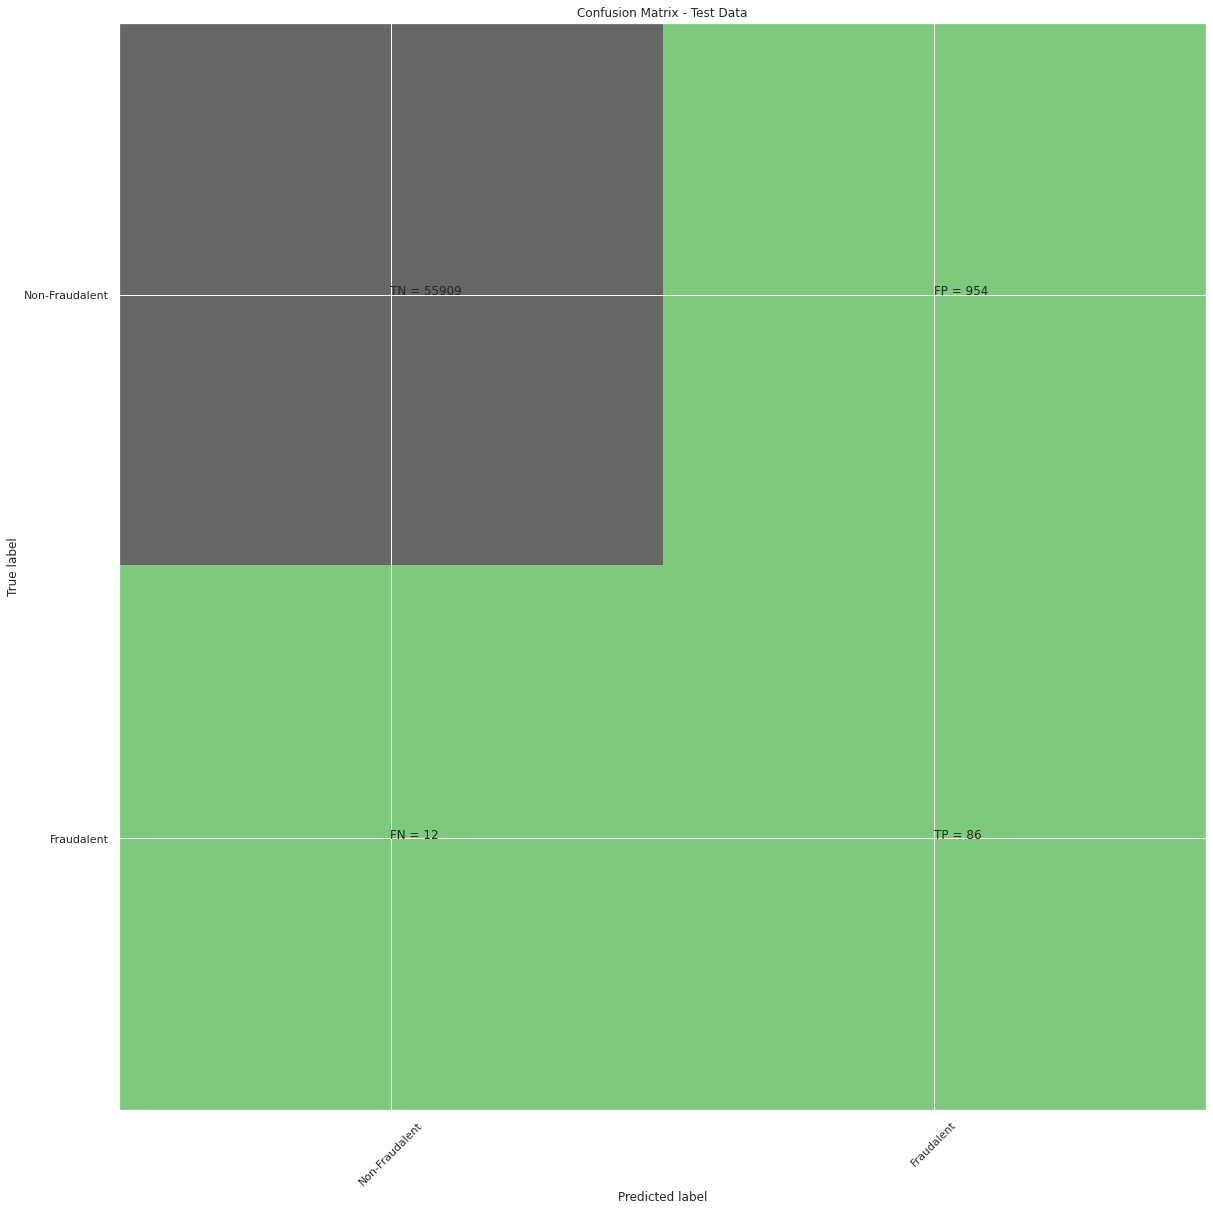

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.88      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

XGboost roc_value: 0.9786249585918464
XGBoost threshold: 0.32295677065849304
ROC for the test dataset 97.9%


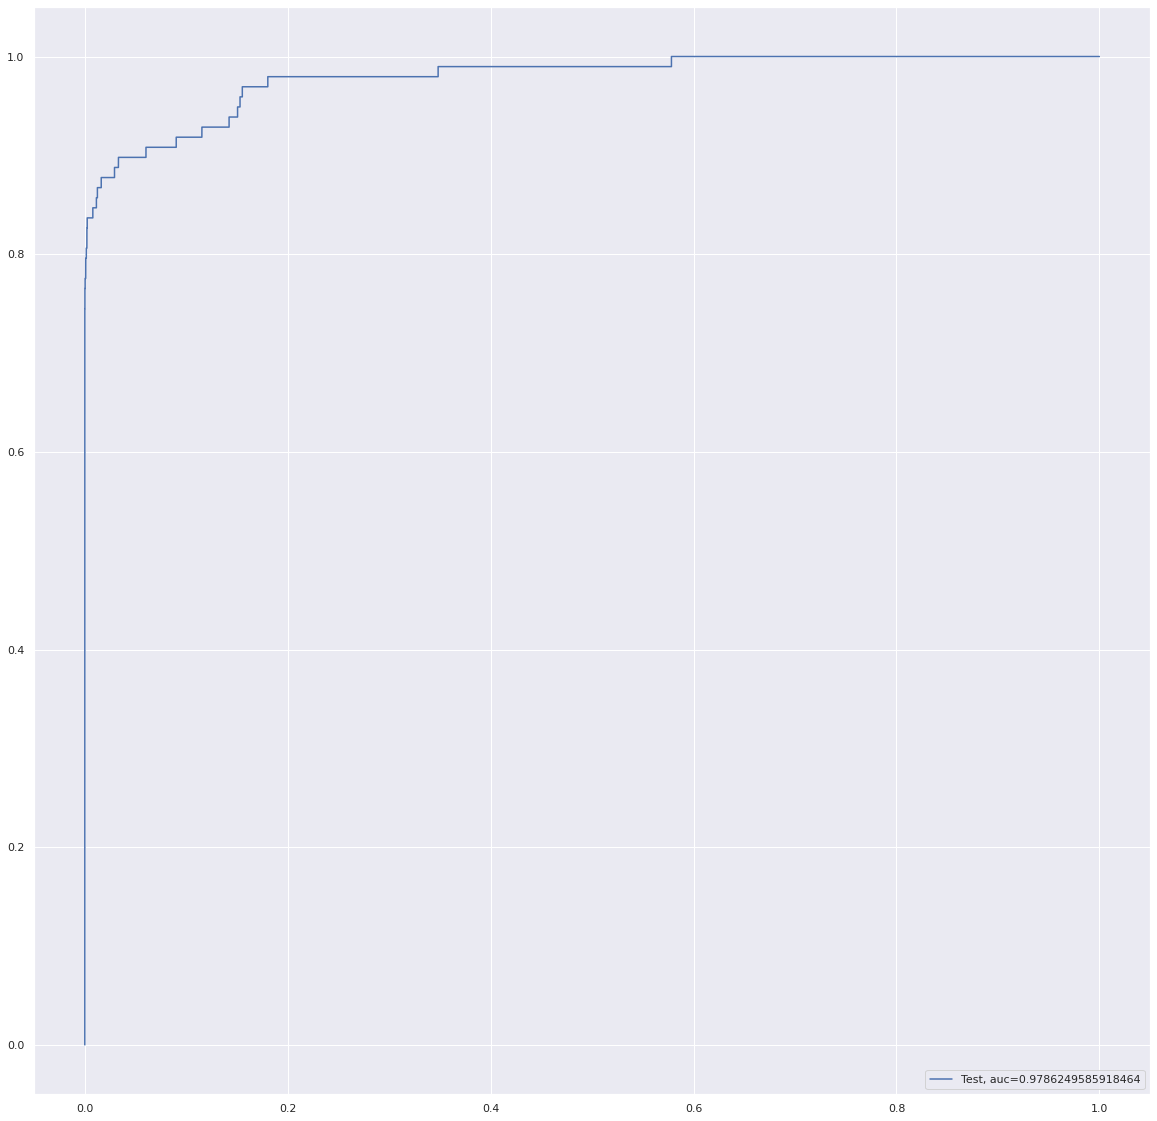

Time Taken by Model: --- 127.95941996574402 seconds ---
--------------------------------------------------------------------------------


In [83]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [84]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                              Power Transformer  ...  0.001289
1                              Power Transformer  ...  0.002676
2                              Power Transformer  ...  0.200000
3                              Power Transformer  ...  1.000000
4                              Power Transformer  ...  1.000000
5                              Power Transformer  ...  0.010000
6                              Power Transformer  ...  0.000756
7                              Power Transformer  ...  0.001412
8                 RepeatedKFold Cross Validation  ...  0.002034
9                 RepeatedKFold Cross Validation  ...  0.021679
10                RepeatedKFold Cross Validation  ...  0.200000
11                RepeatedKFold Cross Validation  ...  1.000000
12                RepeatedKFold Cross Validation  ...  1.000000
13                RepeatedKFold Cross Validation  ...  0.020000
14                RepeatedKFold Cross Validation  ...  0.002283
15                RepeatedKFold Cross Validation  ...  0.002846
16              StratifiedKFold Cross Validation  ...  0.001572
17              StratifiedKFold Cross Validation  ...  0.004244
18              StratifiedKFold Cross Validation  ...  0.200000
19              StratifiedKFold Cross Validation  ...  1.000000
20              StratifiedKFold Cross Validation  ...  1.000000
21              StratifiedKFold Cross Validation  ...  0.010000
22              StratifiedKFold Cross Validation  ...  0.002443
23              StratifiedKFold Cross Validation  ...  0.002763
24                          Random Undersampling  ...  0.155538
25                          Random Undersampling  ...  1.500000
26                          Random Undersampling  ...  0.400000
27                          Random Undersampling  ...  1.000000
28                          Random Undersampling  ...  1.000000
29                          Random Undersampling  ...  0.230000
30                          Random Undersampling  ...  0.137913
31                          Random Undersampling  ...  0.344047
32  Random Oversampling with StratifiedKFold CV   ...  0.418756
33  Random Oversampling with StratifiedKFold CV   ...  1.500000
34  Random Oversampling with StratifiedKFold CV   ...  0.200000
35  Random Oversampling with StratifiedKFold CV   ...  1.000000
36  Random Oversampling with StratifiedKFold CV   ...  1.000000
37  Random Oversampling with StratifiedKFold CV   ...  0.010000
38  Random Oversampling with StratifiedKFold CV   ...  0.218462
39   SMOTE Oversampling with StratifiedKFold CV   ...  0.446513
40   SMOTE Oversampling with StratifiedKFold CV   ...  1.500000
41   SMOTE Oversampling with StratifiedKFold CV   ...  0.400000
42   SMOTE Oversampling with StratifiedKFold CV   ...  1.000000
43   SMOTE Oversampling with StratifiedKFold CV   ...  1.000000
44   SMOTE Oversampling with StratifiedKFold CV   ...  0.060000
45   SMOTE Oversampling with StratifiedKFold CV   ...  0.273181
46  ADASYN Oversampling with StratifiedKFold CV   ...  0.651099
47  ADASYN Oversampling with StratifiedKFold CV   ...  1.500000
48  ADASYN Oversampling with StratifiedKFold CV   ...  0.400000
49  ADASYN Oversampling with StratifiedKFold CV   ...  1.000000
50  ADASYN Oversampling with StratifiedKFold CV   ...  1.000000
51  ADASYN Oversampling with StratifiedKFold CV   ...  0.040000
52  ADASYN Oversampling with StratifiedKFold CV   ...  0.322957

[53 rows x 5 columns]

In [85]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9965766050455575
XGboost roc_value: 0.9811971989963704
XGBoost threshold: 0.21846163272857666


In [86]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [ ]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
#inference from all the above models.

#1.Comparing the overall performances of all models

#Xgboost model with stratified Sampling provides best result.